<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
house_hold_csv = "Family Income and Expenditure.csv"
# Read CSV
house_hold = pd.read_table('../../../DATA/Family_Income_and_Expenditure.csv', header = 0, sep =',')

In [18]:
# Head
house_hold.head(10)

Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   
5                  152883    CAR                   73326   
6                  198621    CAR                  104644   
7                  134961    CAR                   95644   
8                  171152    CAR                   67348   
9                  625753    CAR                  158721   

        Main Source of Income  Agricultural Household indicator  \
0               Wage/Salaries                                 0   
1               Wage/Salaries                                 0   
2               Wage/Salaries                                 1   
3               Wage/Salaries                                 0   
4               Wage/Salaries                                 0   
5               Wage/Salaries                                 0   
6               Wage/Salaries                                 0   
7     Other sources of Income                                 1   
8     Other sources of Income                                 0   
9  Enterpreneurial Activities                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182                   32001              7783   
3                          34030                   28659             10914   
4                          34820                   30167             18391   
5                          29065                   25190             15336   
6                          40992                   36312             12968   
7                          37168                   28156             14640   
8                          23117                   15845             11464   
9                          56003                   43239             26488   

   Total Fish and  marine products Expenditure  Fruit Expenditure  ...  \
0                                        16806               3325  ...   
1                                        11073               2035  ...   
2                                         2590               1730  ...   
3                                        10812                690  ...   
4                                        11309               1395  ...   
5                                         8572               2614  ...   
6                                        12310               2565  ...   
7                                        15896               3365  ...   
8                                         6685               1370  ...   
9                                        25678               3880  ...   

   Number of Refrigerator/Freezer  Number of Washing Machine  \
0                               1                          1   
1                               0                          1   
2                               0                          0   
3                               0                          0   
4                               1                          0   
5                               0                          1   
6                               0                          0   
7                               0                          1   
8                               0                          0   
9                               1                          0   

   Number of Airconditioner  Number of Car, Jeep, Van  \
0                         0                         0   
1                         0                         0   
2                         0                         0 

In [19]:
# Tail
house_hold.tail(10)

Total Household Income              Region  Total Food Expenditure  \
41534                  130950  XII - SOCCSKSARGEN                   76933   
41535                  166600  XII - SOCCSKSARGEN                   90786   
41536                  185100  XII - SOCCSKSARGEN                   87008   
41537                   72000  XII - SOCCSKSARGEN                   56760   
41538                  130636  XII - SOCCSKSARGEN                   81469   
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
41534               Wage/Salaries                                 2   
41535     Other sources of Income                                 2   
41536     Other sources of Income                                 2   
41537               Wage/Salaries                                 2   
41538               Wage/Salaries                                 2   
41539  Enterpreneurial Activities                                 1   
41540  Enterpreneurial Activities                                 1   
41541  Enterpreneurial Activities                                 2   
41542  Enterpreneurial Activities                                 1   
41543  Enterpreneurial Activities                                 1   

       Bread and Cereals Expenditure  Total Rice Expenditure  \
41534                          24304                   18160   
41535                          23658                   20118   
41536                          19693                   15918   
41537                          18441                   15424   
41538                          28563                   23457   
41539                          23675                   21542   
41540                           2691                    1273   
41541                          28646                   27339   
41542                          29996                   26655   
41543                          43485                   41205   

       Meat Expenditure  Total Fish and  marine products Expenditure  \
41534              2248                                        17306   
41535              4406                                        23539   
41536              9145                                        20584   
41537              2017                                        10623   
41538              4728                                        12496   
41539              1476                                         6120   
41540              1886                                         4386   
41541               480                                         4796   
41542              2359                                        17730   
41543              1985                                         7735   

       Fruit Expenditure  ...  Number of Refrigerator/Freezer  \
41534               3255  ...                               0   
41535               3899  ...                               0   
41536               3068  ...                               0   
41537               1683  ...                               0   
41538               3508  ...                               0   
41539               1632  ...                               0   
41540               1840  ...                               0   
41541               1232  ...                               0   
41542               2923  ...                               0   
41543               2062  ...                               0   

       Number of Washing Machine  Number of Airconditioner  \
41534                          0                         0   
41535                          0       

In [5]:
# Shape
house_hold.shape

(41544, 60)

In [6]:
# Data Types
house_hold.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

Text(0.5, 1.0, 'Total Household Income Histogram')

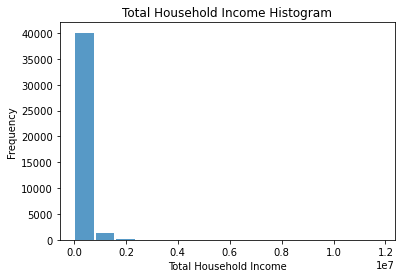

In [7]:
# ANSWER
plt.hist(house_hold['Total Household Income'], bins=15, alpha=0.75, rwidth=0.9)
plt.xlabel('Total Household Income')
plt.ylabel('Frequency')
plt.title('Total Household Income Histogram')

##### 2. How would you describe the shape of this population?

**ANSWER:**

In [20]:
#right (positive) skewed, based on the significant tail to the right of the majority of the values.


##### 2. What is the mean income of this population?

In [22]:
# ANSWER
mean_income = np.mean(house_hold['Total Household Income'])
print(mean_income)

247555.58480165608


##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**

In [39]:
# unsure of the question asked?

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [29]:
# ANSWER
income_sample_mean = []

In [30]:
for i in range(10):
    income_sample = house_hold.sample(5)
    income_sample_mean = np.mean(income_sample)
    print(income_sample_mean)

Total Household Income                           137569.8
Total Food Expenditure                            60499.6
Agricultural Household indicator                      0.4
Bread and Cereals Expenditure                     25179.6
Total Rice Expenditure                            21358.4
Meat Expenditure                                   6163.6
Total Fish and  marine products Expenditure        6451.2
Fruit Expenditure                                   997.4
Vegetables Expenditure                             4858.6
Restaurant and hotels Expenditure                  6560.4
Alcoholic Beverages Expenditure                     334.4
Tobacco Expenditure                                1190.0
Clothing, Footwear and Other Wear Expenditure      3955.8
Housing and water Expenditure                     18966.0
Imputed House Rental Value                        10680.0
Medical Care Expenditure                           4775.4
Transportation Expenditure                         6277.2
Communication 

Total Household Income                           167595.0
Total Food Expenditure                            72396.0
Agricultural Household indicator                      0.4
Bread and Cereals Expenditure                     19618.6
Total Rice Expenditure                            13642.2
Meat Expenditure                                  11735.2
Total Fish and  marine products Expenditure        9333.2
Fruit Expenditure                                  1612.0
Vegetables Expenditure                             4437.0
Restaurant and hotels Expenditure                  9189.4
Alcoholic Beverages Expenditure                     364.0
Tobacco Expenditure                                1747.2
Clothing, Footwear and Other Wear Expenditure      1512.4
Housing and water Expenditure                     37234.8
Imputed House Rental Value                        16200.0
Medical Care Expenditure                           5007.0
Transportation Expenditure                         9872.4
Communication 

In [ ]:
# Brain fried. This is not what I'm trying to get!

###### 4.A Make a histogram of all the sample means

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

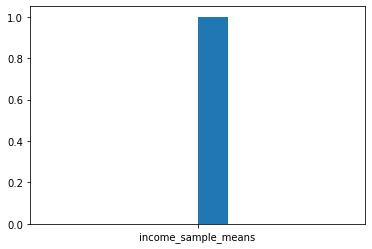

In [32]:
# ANSWER
plt.hist('income_sample_means')

###### 4.B Describe the shape of the histogram.

In [40]:
#FFFFF!

**ANSWER:**

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

In [36]:
# ANSWER
for i in range(1000):
    income_sample = house_hold.sample(15)
    income_sample_mean = np.mean(income_sample)
    print(income_sample_mean)

Total Household Income                           281429.800000
Total Food Expenditure                            91973.400000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     27532.600000
Total Rice Expenditure                            22551.866667
Meat Expenditure                                   9775.466667
Total Fish and  marine products Expenditure       10331.533333
Fruit Expenditure                                  2495.266667
Vegetables Expenditure                             4196.466667
Restaurant and hotels Expenditure                 22628.733333
Alcoholic Beverages Expenditure                     755.933333
Tobacco Expenditure                                2705.666667
Clothing, Footwear and Other Wear Expenditure      6278.666667
Housing and water Expenditure                     41963.200000
Imputed House Rental Value                        21800.000000
Medical Care Expenditure                           6416

Total Household Income                           358009.200000
Total Food Expenditure                           107931.266667
Agricultural Household indicator                      0.800000
Bread and Cereals Expenditure                     29308.933333
Total Rice Expenditure                            21533.533333
Meat Expenditure                                  12594.466667
Total Fish and  marine products Expenditure       13279.866667
Fruit Expenditure                                  3313.666667
Vegetables Expenditure                             5624.600000
Restaurant and hotels Expenditure                 23908.800000
Alcoholic Beverages Expenditure                    1631.866667
Tobacco Expenditure                                3070.866667
Clothing, Footwear and Other Wear Expenditure      5795.866667
Housing and water Expenditure                     59340.400000
Imputed House Rental Value                        12480.000000
Medical Care Expenditure                           3928

Total Household Income                           199145.200000
Total Food Expenditure                            86114.800000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     22286.466667
Total Rice Expenditure                            14117.800000
Meat Expenditure                                   9698.866667
Total Fish and  marine products Expenditure        9358.533333
Fruit Expenditure                                  3449.266667
Vegetables Expenditure                             4305.800000
Restaurant and hotels Expenditure                 18141.600000
Alcoholic Beverages Expenditure                    1068.000000
Tobacco Expenditure                                2654.600000
Clothing, Footwear and Other Wear Expenditure      4221.466667
Housing and water Expenditure                     38263.200000
Imputed House Rental Value                        22380.000000
Medical Care Expenditure                          32896

Total Household Income                           157351.733333
Total Food Expenditure                            68826.066667
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     22890.666667
Total Rice Expenditure                            15836.200000
Meat Expenditure                                   6773.266667
Total Fish and  marine products Expenditure        8248.866667
Fruit Expenditure                                  1750.466667
Vegetables Expenditure                             3806.000000
Restaurant and hotels Expenditure                 10503.133333
Alcoholic Beverages Expenditure                     784.066667
Tobacco Expenditure                                 536.533333
Clothing, Footwear and Other Wear Expenditure      2556.866667
Housing and water Expenditure                     25879.200000
Imputed House Rental Value                        14440.000000
Medical Care Expenditure                           1962

Total Household Income                           273448.000000
Total Food Expenditure                            88579.466667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     23505.600000
Total Rice Expenditure                            17456.733333
Meat Expenditure                                  13527.866667
Total Fish and  marine products Expenditure       10408.533333
Fruit Expenditure                                  2138.066667
Vegetables Expenditure                             3824.333333
Restaurant and hotels Expenditure                 17995.333333
Alcoholic Beverages Expenditure                    2265.866667
Tobacco Expenditure                                4142.000000
Clothing, Footwear and Other Wear Expenditure      6230.666667
Housing and water Expenditure                     45699.200000
Imputed House Rental Value                        18160.000000
Medical Care Expenditure                           3385

Total Household Income                           275168.733333
Total Food Expenditure                           122557.000000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     32482.266667
Total Rice Expenditure                            23034.666667
Meat Expenditure                                  19659.333333
Total Fish and  marine products Expenditure       13586.800000
Fruit Expenditure                                  3243.133333
Vegetables Expenditure                             6268.466667
Restaurant and hotels Expenditure                 19935.866667
Alcoholic Beverages Expenditure                    1174.400000
Tobacco Expenditure                                2801.666667
Clothing, Footwear and Other Wear Expenditure      4610.066667
Housing and water Expenditure                     48068.400000
Imputed House Rental Value                        29760.000000
Medical Care Expenditure                           6343

Total Household Income                           317985.733333
Total Food Expenditure                            80342.533333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     25295.066667
Total Rice Expenditure                            16313.466667
Meat Expenditure                                   9618.933333
Total Fish and  marine products Expenditure        8108.200000
Fruit Expenditure                                  1923.933333
Vegetables Expenditure                             5708.666667
Restaurant and hotels Expenditure                 15860.200000
Alcoholic Beverages Expenditure                     895.466667
Tobacco Expenditure                                1969.400000
Clothing, Footwear and Other Wear Expenditure      5595.600000
Housing and water Expenditure                     26300.800000
Imputed House Rental Value                        12100.000000
Medical Care Expenditure                           5710

Total Household Income                           239782.733333
Total Food Expenditure                            81308.666667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     25057.600000
Total Rice Expenditure                            18996.000000
Meat Expenditure                                  12699.200000
Total Fish and  marine products Expenditure        8306.066667
Fruit Expenditure                                  2421.133333
Vegetables Expenditure                             4859.066667
Restaurant and hotels Expenditure                 10974.533333
Alcoholic Beverages Expenditure                     988.333333
Tobacco Expenditure                                1727.133333
Clothing, Footwear and Other Wear Expenditure      4098.200000
Housing and water Expenditure                     53929.600000
Imputed House Rental Value                        22720.000000
Medical Care Expenditure                          23542

Total Household Income                           162104.733333
Total Food Expenditure                            69748.333333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     24087.200000
Total Rice Expenditure                            17891.533333
Meat Expenditure                                   8180.200000
Total Fish and  marine products Expenditure        9092.000000
Fruit Expenditure                                  1400.866667
Vegetables Expenditure                             2676.200000
Restaurant and hotels Expenditure                 12740.266667
Alcoholic Beverages Expenditure                    1005.200000
Tobacco Expenditure                                1179.866667
Clothing, Footwear and Other Wear Expenditure      4445.133333
Housing and water Expenditure                     26168.800000
Imputed House Rental Value                        11600.000000
Medical Care Expenditure                           3760

Total Household Income                           250861.333333
Total Food Expenditure                            75923.733333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     22640.133333
Total Rice Expenditure                            14381.200000
Meat Expenditure                                  11181.466667
Total Fish and  marine products Expenditure        9757.800000
Fruit Expenditure                                  1728.333333
Vegetables Expenditure                             3850.733333
Restaurant and hotels Expenditure                 14955.800000
Alcoholic Beverages Expenditure                     899.866667
Tobacco Expenditure                                2185.600000
Clothing, Footwear and Other Wear Expenditure      4413.266667
Housing and water Expenditure                     31039.200000
Imputed House Rental Value                        16360.000000
Medical Care Expenditure                           5629

Total Household Income                           153247.333333
Total Food Expenditure                            65990.000000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     21703.666667
Total Rice Expenditure                            15041.333333
Meat Expenditure                                   9208.533333
Total Fish and  marine products Expenditure        9056.200000
Fruit Expenditure                                  2075.000000
Vegetables Expenditure                             4269.800000
Restaurant and hotels Expenditure                  6773.400000
Alcoholic Beverages Expenditure                    1124.266667
Tobacco Expenditure                                3083.000000
Clothing, Footwear and Other Wear Expenditure      2618.333333
Housing and water Expenditure                     22550.400000
Imputed House Rental Value                        10320.000000
Medical Care Expenditure                          25411

Total Household Income                           267828.000000
Total Food Expenditure                            85444.733333
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     21717.600000
Total Rice Expenditure                            16904.400000
Meat Expenditure                                  11405.666667
Total Fish and  marine products Expenditure        8900.600000
Fruit Expenditure                                  2037.200000
Vegetables Expenditure                             4289.466667
Restaurant and hotels Expenditure                 20135.333333
Alcoholic Beverages Expenditure                    1008.333333
Tobacco Expenditure                                1817.200000
Clothing, Footwear and Other Wear Expenditure      7157.466667
Housing and water Expenditure                     42616.000000
Imputed House Rental Value                        21520.000000
Medical Care Expenditure                           5877

Total Household Income                           178027.933333
Total Food Expenditure                            69306.266667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     22883.600000
Total Rice Expenditure                            15084.066667
Meat Expenditure                                   8310.933333
Total Fish and  marine products Expenditure        9910.733333
Fruit Expenditure                                  2067.733333
Vegetables Expenditure                             3577.600000
Restaurant and hotels Expenditure                 10483.266667
Alcoholic Beverages Expenditure                    1848.866667
Tobacco Expenditure                                3420.133333
Clothing, Footwear and Other Wear Expenditure      2906.333333
Housing and water Expenditure                     23437.600000
Imputed House Rental Value                        11580.000000
Medical Care Expenditure                           3493

Total Household Income                           239160.733333
Total Food Expenditure                            91591.000000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     29025.800000
Total Rice Expenditure                            23503.200000
Meat Expenditure                                   8911.866667
Total Fish and  marine products Expenditure       10566.200000
Fruit Expenditure                                  2375.533333
Vegetables Expenditure                             5145.466667
Restaurant and hotels Expenditure                 18549.000000
Alcoholic Beverages Expenditure                    1217.200000
Tobacco Expenditure                                1026.866667
Clothing, Footwear and Other Wear Expenditure      7166.666667
Housing and water Expenditure                     43546.400000
Imputed House Rental Value                        29710.000000
Medical Care Expenditure                           9494

Total Household Income                           162726.066667
Total Food Expenditure                            66115.866667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     22098.266667
Total Rice Expenditure                            16624.066667
Meat Expenditure                                   7728.200000
Total Fish and  marine products Expenditure        7330.733333
Fruit Expenditure                                  1651.866667
Vegetables Expenditure                             3984.800000
Restaurant and hotels Expenditure                 10482.600000
Alcoholic Beverages Expenditure                    1356.000000
Tobacco Expenditure                                1370.800000
Clothing, Footwear and Other Wear Expenditure      3030.200000
Housing and water Expenditure                     25901.200000
Imputed House Rental Value                        13400.000000
Medical Care Expenditure                           3927

Total Household Income                           259530.133333
Total Food Expenditure                            74019.666667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     25280.133333
Total Rice Expenditure                            19547.533333
Meat Expenditure                                   8367.000000
Total Fish and  marine products Expenditure        9458.400000
Fruit Expenditure                                  2874.266667
Vegetables Expenditure                             5806.200000
Restaurant and hotels Expenditure                  9827.733333
Alcoholic Beverages Expenditure                     740.800000
Tobacco Expenditure                                1231.333333
Clothing, Footwear and Other Wear Expenditure      6047.733333
Housing and water Expenditure                     81137.200000
Imputed House Rental Value                        64120.000000
Medical Care Expenditure                           7336

Total Household Income                           247000.200000
Total Food Expenditure                            96316.266667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     27486.733333
Total Rice Expenditure                            16269.866667
Meat Expenditure                                  12250.200000
Total Fish and  marine products Expenditure       12140.400000
Fruit Expenditure                                  3374.000000
Vegetables Expenditure                             6411.466667
Restaurant and hotels Expenditure                 16059.000000
Alcoholic Beverages Expenditure                    1675.733333
Tobacco Expenditure                                2577.400000
Clothing, Footwear and Other Wear Expenditure      5295.800000
Housing and water Expenditure                     35179.600000
Imputed House Rental Value                        16500.000000
Medical Care Expenditure                           7433

Total Household Income                           142114.066667
Total Food Expenditure                            60748.333333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     18675.800000
Total Rice Expenditure                            13784.266667
Meat Expenditure                                   5558.733333
Total Fish and  marine products Expenditure        8764.933333
Fruit Expenditure                                  2437.000000
Vegetables Expenditure                             3983.733333
Restaurant and hotels Expenditure                  7893.066667
Alcoholic Beverages Expenditure                     961.800000
Tobacco Expenditure                                1856.466667
Clothing, Footwear and Other Wear Expenditure      1946.666667
Housing and water Expenditure                     23363.600000
Imputed House Rental Value                        15120.000000
Medical Care Expenditure                           2715

Total Household Income                           325109.066667
Total Food Expenditure                           102173.266667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     32755.933333
Total Rice Expenditure                            24483.000000
Meat Expenditure                                  10711.800000
Total Fish and  marine products Expenditure       11605.533333
Fruit Expenditure                                  2590.333333
Vegetables Expenditure                             5162.533333
Restaurant and hotels Expenditure                 15684.466667
Alcoholic Beverages Expenditure                    3246.400000
Tobacco Expenditure                                1903.533333
Clothing, Footwear and Other Wear Expenditure      8565.866667
Housing and water Expenditure                     46871.200000
Imputed House Rental Value                        27560.000000
Medical Care Expenditure                           7272

Total Household Income                           136285.266667
Total Food Expenditure                            74193.466667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     24385.733333
Total Rice Expenditure                            15722.733333
Meat Expenditure                                   6321.133333
Total Fish and  marine products Expenditure        9551.866667
Fruit Expenditure                                  2402.600000
Vegetables Expenditure                             5657.200000
Restaurant and hotels Expenditure                 14464.466667
Alcoholic Beverages Expenditure                     971.800000
Tobacco Expenditure                                3407.266667
Clothing, Footwear and Other Wear Expenditure      1998.066667
Housing and water Expenditure                     17097.200000
Imputed House Rental Value                         6780.000000
Medical Care Expenditure                           1811

Total Household Income                           271718.600000
Total Food Expenditure                            80373.400000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     21535.866667
Total Rice Expenditure                            15085.066667
Meat Expenditure                                  10191.333333
Total Fish and  marine products Expenditure       10727.200000
Fruit Expenditure                                  4007.133333
Vegetables Expenditure                             4789.400000
Restaurant and hotels Expenditure                 14590.866667
Alcoholic Beverages Expenditure                     916.133333
Tobacco Expenditure                                2004.933333
Clothing, Footwear and Other Wear Expenditure      5342.866667
Housing and water Expenditure                     34661.600000
Imputed House Rental Value                        18440.000000
Medical Care Expenditure                          16916

Total Household Income                           154869.800000
Total Food Expenditure                            61484.400000
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     23197.533333
Total Rice Expenditure                            18031.333333
Meat Expenditure                                   6065.133333
Total Fish and  marine products Expenditure        8452.733333
Fruit Expenditure                                  1653.666667
Vegetables Expenditure                             3631.266667
Restaurant and hotels Expenditure                  8116.400000
Alcoholic Beverages Expenditure                     646.600000
Tobacco Expenditure                                3634.200000
Clothing, Footwear and Other Wear Expenditure      2536.600000
Housing and water Expenditure                     20568.400000
Imputed House Rental Value                        11900.000000
Medical Care Expenditure                           5347

Total Household Income                           184053.000000
Total Food Expenditure                            81288.933333
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     26199.800000
Total Rice Expenditure                            18997.333333
Meat Expenditure                                   9192.466667
Total Fish and  marine products Expenditure        9514.800000
Fruit Expenditure                                  3473.133333
Vegetables Expenditure                             3784.400000
Restaurant and hotels Expenditure                 14605.866667
Alcoholic Beverages Expenditure                     635.866667
Tobacco Expenditure                                2785.666667
Clothing, Footwear and Other Wear Expenditure      3518.933333
Housing and water Expenditure                     32684.000000
Imputed House Rental Value                        17100.000000
Medical Care Expenditure                           2345

Total Household Income                           259428.400000
Total Food Expenditure                            78343.600000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     22763.800000
Total Rice Expenditure                            17387.800000
Meat Expenditure                                   8236.466667
Total Fish and  marine products Expenditure       10955.266667
Fruit Expenditure                                  2905.333333
Vegetables Expenditure                             6996.800000
Restaurant and hotels Expenditure                 12509.600000
Alcoholic Beverages Expenditure                    1826.733333
Tobacco Expenditure                                2926.466667
Clothing, Footwear and Other Wear Expenditure      3206.333333
Housing and water Expenditure                     35429.200000
Imputed House Rental Value                        20760.000000
Medical Care Expenditure                          12637

Total Household Income                           179667.466667
Total Food Expenditure                            81700.800000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     27004.133333
Total Rice Expenditure                            19831.733333
Meat Expenditure                                   9665.800000
Total Fish and  marine products Expenditure       11510.000000
Fruit Expenditure                                  2256.933333
Vegetables Expenditure                             5420.533333
Restaurant and hotels Expenditure                  6485.066667
Alcoholic Beverages Expenditure                     693.466667
Tobacco Expenditure                                1263.466667
Clothing, Footwear and Other Wear Expenditure      3706.933333
Housing and water Expenditure                     33854.400000
Imputed House Rental Value                        16280.000000
Medical Care Expenditure                           3826

Total Household Income                           297794.200000
Total Food Expenditure                           102875.666667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     28854.266667
Total Rice Expenditure                            19627.933333
Meat Expenditure                                  12709.133333
Total Fish and  marine products Expenditure       12217.866667
Fruit Expenditure                                  4631.600000
Vegetables Expenditure                             5841.333333
Restaurant and hotels Expenditure                 18640.866667
Alcoholic Beverages Expenditure                    1714.933333
Tobacco Expenditure                                2703.800000
Clothing, Footwear and Other Wear Expenditure      5989.800000
Housing and water Expenditure                     55806.800000
Imputed House Rental Value                        33200.000000
Medical Care Expenditure                          13934

Total Household Income                           374585.066667
Total Food Expenditure                           108351.400000
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     31797.666667
Total Rice Expenditure                            23025.333333
Meat Expenditure                                  13589.866667
Total Fish and  marine products Expenditure        8675.933333
Fruit Expenditure                                  3197.800000
Vegetables Expenditure                             5584.400000
Restaurant and hotels Expenditure                 22412.466667
Alcoholic Beverages Expenditure                    1104.400000
Tobacco Expenditure                                1962.866667
Clothing, Footwear and Other Wear Expenditure      7693.066667
Housing and water Expenditure                     45582.000000
Imputed House Rental Value                        27480.000000
Medical Care Expenditure                          34926

Total Household Income                           172796.000000
Total Food Expenditure                            79131.066667
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     27332.333333
Total Rice Expenditure                            20823.266667
Meat Expenditure                                   8289.800000
Total Fish and  marine products Expenditure        9156.933333
Fruit Expenditure                                  3462.333333
Vegetables Expenditure                             5436.800000
Restaurant and hotels Expenditure                 13481.266667
Alcoholic Beverages Expenditure                     553.000000
Tobacco Expenditure                                3727.866667
Clothing, Footwear and Other Wear Expenditure      2960.666667
Housing and water Expenditure                     20432.800000
Imputed House Rental Value                        11780.000000
Medical Care Expenditure                           4166

Total Household Income                           361621.533333
Total Food Expenditure                            93086.666667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     24286.000000
Total Rice Expenditure                            16491.533333
Meat Expenditure                                  12074.333333
Total Fish and  marine products Expenditure       10311.733333
Fruit Expenditure                                  2650.666667
Vegetables Expenditure                             5071.533333
Restaurant and hotels Expenditure                 21173.800000
Alcoholic Beverages Expenditure                    3515.200000
Tobacco Expenditure                                5059.466667
Clothing, Footwear and Other Wear Expenditure      5354.933333
Housing and water Expenditure                     49412.400000
Imputed House Rental Value                        31760.000000
Medical Care Expenditure                          17349

dtype: float64
Total Household Income                           160688.533333
Total Food Expenditure                            71267.933333
Agricultural Household indicator                      0.733333
Bread and Cereals Expenditure                     26331.800000
Total Rice Expenditure                            19690.466667
Meat Expenditure                                   7929.266667
Total Fish and  marine products Expenditure        9221.733333
Fruit Expenditure                                  1927.533333
Vegetables Expenditure                             5196.333333
Restaurant and hotels Expenditure                  5829.266667
Alcoholic Beverages Expenditure                    2378.866667
Tobacco Expenditure                                2275.533333
Clothing, Footwear and Other Wear Expenditure      2672.066667
Housing and water Expenditure                     29048.400000
Imputed House Rental Value                        14800.000000
Medical Care Expenditure                

Total Household Income                           287242.200000
Total Food Expenditure                            89599.000000
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     26697.800000
Total Rice Expenditure                            18895.866667
Meat Expenditure                                  12470.000000
Total Fish and  marine products Expenditure       10216.933333
Fruit Expenditure                                  2608.866667
Vegetables Expenditure                             6092.466667
Restaurant and hotels Expenditure                 14241.333333
Alcoholic Beverages Expenditure                    1334.200000
Tobacco Expenditure                                3914.400000
Clothing, Footwear and Other Wear Expenditure      5252.400000
Housing and water Expenditure                     39407.200000
Imputed House Rental Value                        24200.000000
Medical Care Expenditure                          16260

Total Household Income                           277532.333333
Total Food Expenditure                            89568.400000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     23527.466667
Total Rice Expenditure                            17729.066667
Meat Expenditure                                  11240.666667
Total Fish and  marine products Expenditure        8697.666667
Fruit Expenditure                                  2378.200000
Vegetables Expenditure                             4631.933333
Restaurant and hotels Expenditure                 15152.800000
Alcoholic Beverages Expenditure                     498.666667
Tobacco Expenditure                                1442.466667
Clothing, Footwear and Other Wear Expenditure      3868.266667
Housing and water Expenditure                     41703.600000
Imputed House Rental Value                        21820.000000
Medical Care Expenditure                           9446

Total Household Income                           203993.600000
Total Food Expenditure                            81917.666667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     25261.933333
Total Rice Expenditure                            17104.600000
Meat Expenditure                                  10005.600000
Total Fish and  marine products Expenditure       10322.600000
Fruit Expenditure                                  2129.866667
Vegetables Expenditure                             4892.400000
Restaurant and hotels Expenditure                 16806.866667
Alcoholic Beverages Expenditure                    2024.133333
Tobacco Expenditure                                2163.333333
Clothing, Footwear and Other Wear Expenditure      5768.666667
Housing and water Expenditure                     41976.000000
Imputed House Rental Value                        24400.000000
Medical Care Expenditure                           2812

Total Household Income                           262063.933333
Total Food Expenditure                            83187.800000
Agricultural Household indicator                      0.000000
Bread and Cereals Expenditure                     25754.333333
Total Rice Expenditure                            19064.333333
Meat Expenditure                                  12218.066667
Total Fish and  marine products Expenditure       11055.533333
Fruit Expenditure                                  3269.200000
Vegetables Expenditure                             4630.400000
Restaurant and hotels Expenditure                  9860.866667
Alcoholic Beverages Expenditure                    1406.000000
Tobacco Expenditure                                2247.400000
Clothing, Footwear and Other Wear Expenditure      6074.866667
Housing and water Expenditure                     39723.200000
Imputed House Rental Value                        19520.000000
Medical Care Expenditure                           4375

Total Household Income                           284579.733333
Total Food Expenditure                           101996.933333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     30575.666667
Total Rice Expenditure                            22669.066667
Meat Expenditure                                  10482.466667
Total Fish and  marine products Expenditure       14070.266667
Fruit Expenditure                                  3075.266667
Vegetables Expenditure                             6000.533333
Restaurant and hotels Expenditure                 19928.400000
Alcoholic Beverages Expenditure                    2548.400000
Tobacco Expenditure                                4391.400000
Clothing, Footwear and Other Wear Expenditure      3307.800000
Housing and water Expenditure                     38818.000000
Imputed House Rental Value                        21760.000000
Medical Care Expenditure                           2589

Total Household Income                           228419.133333
Total Food Expenditure                            68004.200000
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     20014.933333
Total Rice Expenditure                            12548.733333
Meat Expenditure                                   7619.666667
Total Fish and  marine products Expenditure       12249.266667
Fruit Expenditure                                  1679.800000
Vegetables Expenditure                             4136.533333
Restaurant and hotels Expenditure                  9232.333333
Alcoholic Beverages Expenditure                    1391.333333
Tobacco Expenditure                                2153.666667
Clothing, Footwear and Other Wear Expenditure      5931.200000
Housing and water Expenditure                     25858.800000
Imputed House Rental Value                        13360.000000
Medical Care Expenditure                           5139

dtype: float64
Total Household Income                           300607.533333
Total Food Expenditure                            97986.333333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     27991.200000
Total Rice Expenditure                            19898.800000
Meat Expenditure                                  14723.133333
Total Fish and  marine products Expenditure        9255.466667
Fruit Expenditure                                  3422.333333
Vegetables Expenditure                             6705.133333
Restaurant and hotels Expenditure                 20582.533333
Alcoholic Beverages Expenditure                    1536.000000
Tobacco Expenditure                                1221.400000
Clothing, Footwear and Other Wear Expenditure      8323.600000
Housing and water Expenditure                     49572.000000
Imputed House Rental Value                        23520.000000
Medical Care Expenditure                

Total Household Income                           261786.333333
Total Food Expenditure                            81595.533333
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     26100.800000
Total Rice Expenditure                            16240.533333
Meat Expenditure                                   8823.866667
Total Fish and  marine products Expenditure        6446.066667
Fruit Expenditure                                  2174.466667
Vegetables Expenditure                             3857.466667
Restaurant and hotels Expenditure                 19065.400000
Alcoholic Beverages Expenditure                     636.933333
Tobacco Expenditure                                1984.666667
Clothing, Footwear and Other Wear Expenditure      5944.733333
Housing and water Expenditure                     35982.000000
Imputed House Rental Value                        20360.000000
Medical Care Expenditure                           3512

Total Household Income                           175190.333333
Total Food Expenditure                            87093.066667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     25866.466667
Total Rice Expenditure                            19757.666667
Meat Expenditure                                  13420.733333
Total Fish and  marine products Expenditure       11929.933333
Fruit Expenditure                                  2628.333333
Vegetables Expenditure                             5112.066667
Restaurant and hotels Expenditure                  9391.533333
Alcoholic Beverages Expenditure                    1303.466667
Tobacco Expenditure                                2106.933333
Clothing, Footwear and Other Wear Expenditure      3441.533333
Housing and water Expenditure                     27530.000000
Imputed House Rental Value                        13880.000000
Medical Care Expenditure                           2950

Total Household Income                           208226.933333
Total Food Expenditure                            81333.533333
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     26352.000000
Total Rice Expenditure                            19003.000000
Meat Expenditure                                  10452.666667
Total Fish and  marine products Expenditure        8811.000000
Fruit Expenditure                                  3274.600000
Vegetables Expenditure                             4948.133333
Restaurant and hotels Expenditure                 15056.866667
Alcoholic Beverages Expenditure                     724.600000
Tobacco Expenditure                                1169.866667
Clothing, Footwear and Other Wear Expenditure      5552.600000
Housing and water Expenditure                     34556.400000
Imputed House Rental Value                        20132.000000
Medical Care Expenditure                           3342

Total Household Income                           384030.333333
Total Food Expenditure                           108400.800000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     25295.266667
Total Rice Expenditure                            18762.466667
Meat Expenditure                                  12297.266667
Total Fish and  marine products Expenditure       12973.866667
Fruit Expenditure                                  3482.066667
Vegetables Expenditure                             5849.666667
Restaurant and hotels Expenditure                 30327.733333
Alcoholic Beverages Expenditure                    1202.000000
Tobacco Expenditure                                1870.333333
Clothing, Footwear and Other Wear Expenditure      6054.933333
Housing and water Expenditure                     48459.600000
Imputed House Rental Value                        25960.000000
Medical Care Expenditure                           2952

Total Household Income                           143355.066667
Total Food Expenditure                            57832.400000
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     24391.733333
Total Rice Expenditure                            19426.666667
Meat Expenditure                                   4584.533333
Total Fish and  marine products Expenditure        7259.400000
Fruit Expenditure                                  2203.866667
Vegetables Expenditure                             3676.533333
Restaurant and hotels Expenditure                  7172.000000
Alcoholic Beverages Expenditure                    1239.400000
Tobacco Expenditure                                1723.333333
Clothing, Footwear and Other Wear Expenditure      2580.133333
Housing and water Expenditure                     16906.000000
Imputed House Rental Value                         9420.000000
Medical Care Expenditure                           2961

Total Household Income                           217474.733333
Total Food Expenditure                            74122.733333
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     26813.000000
Total Rice Expenditure                            21031.866667
Meat Expenditure                                   6892.400000
Total Fish and  marine products Expenditure        9620.133333
Fruit Expenditure                                  1604.533333
Vegetables Expenditure                             4517.666667
Restaurant and hotels Expenditure                 11097.333333
Alcoholic Beverages Expenditure                     798.466667
Tobacco Expenditure                                4268.000000
Clothing, Footwear and Other Wear Expenditure      3698.933333
Housing and water Expenditure                     21088.400000
Imputed House Rental Value                        10920.000000
Medical Care Expenditure                           2667

Total Household Income                           276095.066667
Total Food Expenditure                            85730.066667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     23503.333333
Total Rice Expenditure                            14355.066667
Meat Expenditure                                  10134.200000
Total Fish and  marine products Expenditure       10338.933333
Fruit Expenditure                                  2976.933333
Vegetables Expenditure                             5193.266667
Restaurant and hotels Expenditure                 16991.600000
Alcoholic Beverages Expenditure                     913.866667
Tobacco Expenditure                                1321.733333
Clothing, Footwear and Other Wear Expenditure      7109.066667
Housing and water Expenditure                     44656.000000
Imputed House Rental Value                        22620.000000
Medical Care Expenditure                          16126

Total Household Income                           351914.400000
Total Food Expenditure                            94872.333333
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     23226.333333
Total Rice Expenditure                            17335.600000
Meat Expenditure                                  11986.133333
Total Fish and  marine products Expenditure        9865.466667
Fruit Expenditure                                  1571.266667
Vegetables Expenditure                             4834.800000
Restaurant and hotels Expenditure                 25493.266667
Alcoholic Beverages Expenditure                    1493.800000
Tobacco Expenditure                                3914.066667
Clothing, Footwear and Other Wear Expenditure      4349.000000
Housing and water Expenditure                     35948.000000
Imputed House Rental Value                        16960.000000
Medical Care Expenditure                           6554

Total Household Income                           211876.266667
Total Food Expenditure                            89116.600000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     19200.000000
Total Rice Expenditure                            14081.066667
Meat Expenditure                                  10739.266667
Total Fish and  marine products Expenditure        8614.200000
Fruit Expenditure                                  2436.866667
Vegetables Expenditure                             4354.400000
Restaurant and hotels Expenditure                 31067.266667
Alcoholic Beverages Expenditure                     254.666667
Tobacco Expenditure                                 752.333333
Clothing, Footwear and Other Wear Expenditure      6866.000000
Housing and water Expenditure                     26883.600000
Imputed House Rental Value                        16400.000000
Medical Care Expenditure                           5052

Total Household Income                           302744.400000
Total Food Expenditure                           107824.866667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     27405.533333
Total Rice Expenditure                            19077.600000
Meat Expenditure                                  16706.333333
Total Fish and  marine products Expenditure       14250.133333
Fruit Expenditure                                  3823.466667
Vegetables Expenditure                             7108.600000
Restaurant and hotels Expenditure                 15554.333333
Alcoholic Beverages Expenditure                    1363.933333
Tobacco Expenditure                                1581.933333
Clothing, Footwear and Other Wear Expenditure      5148.733333
Housing and water Expenditure                     36507.200000
Imputed House Rental Value                        18800.000000
Medical Care Expenditure                          10196

Total Household Income                           218613.866667
Total Food Expenditure                            87151.133333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     20065.600000
Total Rice Expenditure                            13898.466667
Meat Expenditure                                   8652.266667
Total Fish and  marine products Expenditure       15157.800000
Fruit Expenditure                                  2594.933333
Vegetables Expenditure                             4774.466667
Restaurant and hotels Expenditure                 15401.066667
Alcoholic Beverages Expenditure                     858.666667
Tobacco Expenditure                                2030.866667
Clothing, Footwear and Other Wear Expenditure      5971.400000
Housing and water Expenditure                     35624.000000
Imputed House Rental Value                        20912.000000
Medical Care Expenditure                           4656

Total Household Income                           227435.666667
Total Food Expenditure                            74322.200000
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     23202.800000
Total Rice Expenditure                            14902.466667
Meat Expenditure                                  10390.200000
Total Fish and  marine products Expenditure        7980.666667
Fruit Expenditure                                  1913.933333
Vegetables Expenditure                             3983.333333
Restaurant and hotels Expenditure                 12563.333333
Alcoholic Beverages Expenditure                     437.866667
Tobacco Expenditure                                3520.466667
Clothing, Footwear and Other Wear Expenditure      4049.800000
Housing and water Expenditure                     39897.200000
Imputed House Rental Value                        18460.000000
Medical Care Expenditure                           3187

Total Household Income                           273952.000000
Total Food Expenditure                           106663.066667
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     28771.466667
Total Rice Expenditure                            19437.733333
Meat Expenditure                                  16887.666667
Total Fish and  marine products Expenditure       12787.066667
Fruit Expenditure                                  2543.066667
Vegetables Expenditure                             6829.600000
Restaurant and hotels Expenditure                 18790.533333
Alcoholic Beverages Expenditure                    1442.800000
Tobacco Expenditure                                3692.133333
Clothing, Footwear and Other Wear Expenditure      7004.666667
Housing and water Expenditure                     42384.000000
Imputed House Rental Value                        24560.000000
Medical Care Expenditure                           3564

Total Household Income                           207027.133333
Total Food Expenditure                            86266.733333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     22313.000000
Total Rice Expenditure                            15239.333333
Meat Expenditure                                   9399.066667
Total Fish and  marine products Expenditure        8895.200000
Fruit Expenditure                                  2046.533333
Vegetables Expenditure                             4231.800000
Restaurant and hotels Expenditure                 26680.600000
Alcoholic Beverages Expenditure                     369.733333
Tobacco Expenditure                                1448.133333
Clothing, Footwear and Other Wear Expenditure      2922.466667
Housing and water Expenditure                     34492.400000
Imputed House Rental Value                        20280.000000
Medical Care Expenditure                           8581

Total Household Income                           296459.066667
Total Food Expenditure                            93886.600000
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     25960.733333
Total Rice Expenditure                            17020.800000
Meat Expenditure                                  11958.866667
Total Fish and  marine products Expenditure       10988.866667
Fruit Expenditure                                  3615.733333
Vegetables Expenditure                             4927.666667
Restaurant and hotels Expenditure                 20017.133333
Alcoholic Beverages Expenditure                    1037.266667
Tobacco Expenditure                                1649.800000
Clothing, Footwear and Other Wear Expenditure      6205.133333
Housing and water Expenditure                     39901.600000
Imputed House Rental Value                        17640.000000
Medical Care Expenditure                          12945

Total Household Income                           351634.133333
Total Food Expenditure                            88778.733333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     24551.333333
Total Rice Expenditure                            18244.200000
Meat Expenditure                                  11351.266667
Total Fish and  marine products Expenditure        9569.533333
Fruit Expenditure                                  2301.133333
Vegetables Expenditure                             5063.066667
Restaurant and hotels Expenditure                 21869.133333
Alcoholic Beverages Expenditure                    1716.800000
Tobacco Expenditure                                1083.733333
Clothing, Footwear and Other Wear Expenditure      7516.266667
Housing and water Expenditure                     49491.600000
Imputed House Rental Value                        25240.000000
Medical Care Expenditure                           2809

Total Household Income                           410198.600000
Total Food Expenditure                           117577.200000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     29130.866667
Total Rice Expenditure                            22164.000000
Meat Expenditure                                  23180.200000
Total Fish and  marine products Expenditure       13996.533333
Fruit Expenditure                                  4874.733333
Vegetables Expenditure                             7194.733333
Restaurant and hotels Expenditure                 16657.000000
Alcoholic Beverages Expenditure                    1257.133333
Tobacco Expenditure                                1231.200000
Clothing, Footwear and Other Wear Expenditure      9047.533333
Housing and water Expenditure                     46132.400000
Imputed House Rental Value                        22340.000000
Medical Care Expenditure                          14486

Total Household Income                           169716.066667
Total Food Expenditure                            77537.133333
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     22499.533333
Total Rice Expenditure                            18017.000000
Meat Expenditure                                   7625.733333
Total Fish and  marine products Expenditure        8410.533333
Fruit Expenditure                                  2270.266667
Vegetables Expenditure                             5169.933333
Restaurant and hotels Expenditure                 16284.800000
Alcoholic Beverages Expenditure                     872.800000
Tobacco Expenditure                                1310.466667
Clothing, Footwear and Other Wear Expenditure      2864.533333
Housing and water Expenditure                     23628.800000
Imputed House Rental Value                         9608.000000
Medical Care Expenditure                           2886

Total Household Income                           179371.333333
Total Food Expenditure                            86974.200000
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     28445.266667
Total Rice Expenditure                            20866.000000
Meat Expenditure                                  10126.800000
Total Fish and  marine products Expenditure       12817.600000
Fruit Expenditure                                  2390.600000
Vegetables Expenditure                             5487.333333
Restaurant and hotels Expenditure                 11336.333333
Alcoholic Beverages Expenditure                     684.000000
Tobacco Expenditure                                2509.133333
Clothing, Footwear and Other Wear Expenditure      2574.200000
Housing and water Expenditure                     42192.800000
Imputed House Rental Value                        18880.000000
Medical Care Expenditure                           4260

Total Household Income                           337061.533333
Total Food Expenditure                           105750.400000
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     27113.866667
Total Rice Expenditure                            18406.800000
Meat Expenditure                                  11853.466667
Total Fish and  marine products Expenditure       12683.266667
Fruit Expenditure                                  3273.466667
Vegetables Expenditure                             6044.200000
Restaurant and hotels Expenditure                 19758.133333
Alcoholic Beverages Expenditure                    2549.733333
Tobacco Expenditure                                 723.133333
Clothing, Footwear and Other Wear Expenditure      5662.600000
Housing and water Expenditure                     41817.200000
Imputed House Rental Value                        22600.000000
Medical Care Expenditure                          36695

Total Household Income                           241056.866667
Total Food Expenditure                            80015.200000
Agricultural Household indicator                      0.733333
Bread and Cereals Expenditure                     27924.400000
Total Rice Expenditure                            20657.000000
Meat Expenditure                                  10959.800000
Total Fish and  marine products Expenditure       11330.600000
Fruit Expenditure                                  2351.400000
Vegetables Expenditure                             5413.266667
Restaurant and hotels Expenditure                  9101.866667
Alcoholic Beverages Expenditure                    1330.600000
Tobacco Expenditure                                 954.000000
Clothing, Footwear and Other Wear Expenditure      4887.266667
Housing and water Expenditure                     27092.400000
Imputed House Rental Value                        14600.000000
Medical Care Expenditure                           2007

Total Household Income                           283457.466667
Total Food Expenditure                            82350.333333
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     23623.200000
Total Rice Expenditure                            16185.266667
Meat Expenditure                                  10799.333333
Total Fish and  marine products Expenditure       10554.400000
Fruit Expenditure                                  2624.800000
Vegetables Expenditure                             5150.333333
Restaurant and hotels Expenditure                 12383.666667
Alcoholic Beverages Expenditure                     400.466667
Tobacco Expenditure                                1407.333333
Clothing, Footwear and Other Wear Expenditure      5475.466667
Housing and water Expenditure                     48238.000000
Imputed House Rental Value                        28400.000000
Medical Care Expenditure                           2680

Total Household Income                           204807.666667
Total Food Expenditure                            90123.000000
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     19990.000000
Total Rice Expenditure                            13346.600000
Meat Expenditure                                   9577.133333
Total Fish and  marine products Expenditure       10848.400000
Fruit Expenditure                                  2699.333333
Vegetables Expenditure                             5048.066667
Restaurant and hotels Expenditure                 25334.400000
Alcoholic Beverages Expenditure                     725.800000
Tobacco Expenditure                                1767.800000
Clothing, Footwear and Other Wear Expenditure      2972.200000
Housing and water Expenditure                     40530.400000
Imputed House Rental Value                        14960.000000
Medical Care Expenditure                           8427

Total Household Income                           252003.933333
Total Food Expenditure                            88482.200000
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     27798.666667
Total Rice Expenditure                            18135.266667
Meat Expenditure                                   9388.400000
Total Fish and  marine products Expenditure        8564.266667
Fruit Expenditure                                  2699.600000
Vegetables Expenditure                             4872.933333
Restaurant and hotels Expenditure                 18566.133333
Alcoholic Beverages Expenditure                     391.066667
Tobacco Expenditure                                1322.333333
Clothing, Footwear and Other Wear Expenditure      5362.266667
Housing and water Expenditure                     29769.200000
Imputed House Rental Value                        13840.000000
Medical Care Expenditure                          14984

Total Household Income                           273589.733333
Total Food Expenditure                            87920.000000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     26516.000000
Total Rice Expenditure                            19499.400000
Meat Expenditure                                  11330.133333
Total Fish and  marine products Expenditure       10687.466667
Fruit Expenditure                                  2825.866667
Vegetables Expenditure                             5640.400000
Restaurant and hotels Expenditure                 13492.066667
Alcoholic Beverages Expenditure                     806.733333
Tobacco Expenditure                                1785.666667
Clothing, Footwear and Other Wear Expenditure      4225.866667
Housing and water Expenditure                     47949.600000
Imputed House Rental Value                        22440.000000
Medical Care Expenditure                           9817

Total Household Income                           341250.333333
Total Food Expenditure                            90221.333333
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     23248.733333
Total Rice Expenditure                            15350.600000
Meat Expenditure                                  10788.333333
Total Fish and  marine products Expenditure       10947.533333
Fruit Expenditure                                  3988.800000
Vegetables Expenditure                             6698.333333
Restaurant and hotels Expenditure                 15823.866667
Alcoholic Beverages Expenditure                     717.200000
Tobacco Expenditure                                3181.933333
Clothing, Footwear and Other Wear Expenditure      7491.866667
Housing and water Expenditure                     86775.600000
Imputed House Rental Value                        69760.000000
Medical Care Expenditure                           9555

Total Household Income                           164596.466667
Total Food Expenditure                            83207.200000
Agricultural Household indicator                      0.866667
Bread and Cereals Expenditure                     23736.533333
Total Rice Expenditure                            18462.333333
Meat Expenditure                                  12086.800000
Total Fish and  marine products Expenditure       10215.800000
Fruit Expenditure                                  2452.000000
Vegetables Expenditure                             5115.266667
Restaurant and hotels Expenditure                 12039.066667
Alcoholic Beverages Expenditure                     818.600000
Tobacco Expenditure                                2709.333333
Clothing, Footwear and Other Wear Expenditure      2527.800000
Housing and water Expenditure                     32031.200000
Imputed House Rental Value                        19180.000000
Medical Care Expenditure                           2032

Total Household Income                           217029.666667
Total Food Expenditure                            71048.400000
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     21931.866667
Total Rice Expenditure                            15570.466667
Meat Expenditure                                   9272.266667
Total Fish and  marine products Expenditure        8212.333333
Fruit Expenditure                                  1874.933333
Vegetables Expenditure                             3698.066667
Restaurant and hotels Expenditure                 10036.400000
Alcoholic Beverages Expenditure                     694.266667
Tobacco Expenditure                                1434.866667
Clothing, Footwear and Other Wear Expenditure      5957.800000
Housing and water Expenditure                     41647.200000
Imputed House Rental Value                        22000.000000
Medical Care Expenditure                           2362

Total Household Income                           242134.466667
Total Food Expenditure                            74076.733333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     22503.000000
Total Rice Expenditure                            13462.133333
Meat Expenditure                                   8200.400000
Total Fish and  marine products Expenditure       12504.400000
Fruit Expenditure                                  2447.466667
Vegetables Expenditure                             4148.533333
Restaurant and hotels Expenditure                  8922.133333
Alcoholic Beverages Expenditure                     547.333333
Tobacco Expenditure                                 904.733333
Clothing, Footwear and Other Wear Expenditure      3677.200000
Housing and water Expenditure                     27761.600000
Imputed House Rental Value                        13440.000000
Medical Care Expenditure                           4245

Total Household Income                           176328.400000
Total Food Expenditure                            85059.466667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     24168.866667
Total Rice Expenditure                            19216.000000
Meat Expenditure                                   8879.800000
Total Fish and  marine products Expenditure       10584.133333
Fruit Expenditure                                  2100.066667
Vegetables Expenditure                             4059.533333
Restaurant and hotels Expenditure                 17921.800000
Alcoholic Beverages Expenditure                    1281.066667
Tobacco Expenditure                                2761.466667
Clothing, Footwear and Other Wear Expenditure      4407.333333
Housing and water Expenditure                     32218.000000
Imputed House Rental Value                        11880.000000
Medical Care Expenditure                           2798

Total Household Income                           266185.466667
Total Food Expenditure                           100686.933333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     28561.466667
Total Rice Expenditure                            20643.600000
Meat Expenditure                                  15469.000000
Total Fish and  marine products Expenditure       12281.200000
Fruit Expenditure                                  2739.600000
Vegetables Expenditure                             4651.600000
Restaurant and hotels Expenditure                 19798.066667
Alcoholic Beverages Expenditure                    1472.266667
Tobacco Expenditure                                2866.000000
Clothing, Footwear and Other Wear Expenditure      5081.533333
Housing and water Expenditure                     40157.600000
Imputed House Rental Value                        21000.000000
Medical Care Expenditure                          11996

Total Household Income                           268906.400000
Total Food Expenditure                           112299.533333
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     31880.600000
Total Rice Expenditure                            23178.733333
Meat Expenditure                                  13734.200000
Total Fish and  marine products Expenditure       13724.800000
Fruit Expenditure                                  2454.733333
Vegetables Expenditure                             6084.733333
Restaurant and hotels Expenditure                 24915.200000
Alcoholic Beverages Expenditure                    1566.866667
Tobacco Expenditure                                4223.533333
Clothing, Footwear and Other Wear Expenditure      4323.066667
Housing and water Expenditure                     51335.600000
Imputed House Rental Value                        31920.000000
Medical Care Expenditure                           5091

Total Household Income                           225502.466667
Total Food Expenditure                            81297.333333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     26623.866667
Total Rice Expenditure                            17501.466667
Meat Expenditure                                  11055.600000
Total Fish and  marine products Expenditure       10222.333333
Fruit Expenditure                                  2436.266667
Vegetables Expenditure                             5897.800000
Restaurant and hotels Expenditure                  8756.200000
Alcoholic Beverages Expenditure                    1201.466667
Tobacco Expenditure                                1744.733333
Clothing, Footwear and Other Wear Expenditure      4003.066667
Housing and water Expenditure                     35232.800000
Imputed House Rental Value                        19400.000000
Medical Care Expenditure                           7468

Total Household Income                           160376.933333
Total Food Expenditure                            71035.133333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     26541.000000
Total Rice Expenditure                            21818.666667
Meat Expenditure                                   6661.533333
Total Fish and  marine products Expenditure        8067.266667
Fruit Expenditure                                  1996.866667
Vegetables Expenditure                             4807.733333
Restaurant and hotels Expenditure                 10516.333333
Alcoholic Beverages Expenditure                     851.000000
Tobacco Expenditure                                1844.200000
Clothing, Footwear and Other Wear Expenditure      2180.333333
Housing and water Expenditure                     18920.800000
Imputed House Rental Value                        10480.000000
Medical Care Expenditure                           7248

Total Household Income                           266436.066667
Total Food Expenditure                            85240.400000
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     21890.466667
Total Rice Expenditure                            14775.133333
Meat Expenditure                                  10032.800000
Total Fish and  marine products Expenditure       12321.200000
Fruit Expenditure                                  3079.333333
Vegetables Expenditure                             5759.666667
Restaurant and hotels Expenditure                 18411.400000
Alcoholic Beverages Expenditure                     427.133333
Tobacco Expenditure                                1306.866667
Clothing, Footwear and Other Wear Expenditure      3565.000000
Housing and water Expenditure                     36305.600000
Imputed House Rental Value                        22360.000000
Medical Care Expenditure                           8120

Total Household Income                           221793.733333
Total Food Expenditure                            87547.800000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     32525.266667
Total Rice Expenditure                            23238.333333
Meat Expenditure                                   9467.866667
Total Fish and  marine products Expenditure        9700.066667
Fruit Expenditure                                  2317.000000
Vegetables Expenditure                             5312.600000
Restaurant and hotels Expenditure                  7416.000000
Alcoholic Beverages Expenditure                     710.800000
Tobacco Expenditure                                1168.866667
Clothing, Footwear and Other Wear Expenditure      4743.000000
Housing and water Expenditure                     27710.800000
Imputed House Rental Value                        11060.000000
Medical Care Expenditure                           6044

Total Household Income                           329490.933333
Total Food Expenditure                            96184.866667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     22946.866667
Total Rice Expenditure                            15172.733333
Meat Expenditure                                  12017.666667
Total Fish and  marine products Expenditure       11031.266667
Fruit Expenditure                                  2852.333333
Vegetables Expenditure                             6424.133333
Restaurant and hotels Expenditure                 19535.333333
Alcoholic Beverages Expenditure                     739.466667
Tobacco Expenditure                                2676.866667
Clothing, Footwear and Other Wear Expenditure      6398.000000
Housing and water Expenditure                     63937.200000
Imputed House Rental Value                        37280.000000
Medical Care Expenditure                          14605

Total Household Income                           300983.600000
Total Food Expenditure                            99523.533333
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     29962.666667
Total Rice Expenditure                            22327.866667
Meat Expenditure                                  13673.866667
Total Fish and  marine products Expenditure       16443.466667
Fruit Expenditure                                  3390.800000
Vegetables Expenditure                             5268.066667
Restaurant and hotels Expenditure                 12713.400000
Alcoholic Beverages Expenditure                     969.800000
Tobacco Expenditure                                1322.466667
Clothing, Footwear and Other Wear Expenditure      6860.266667
Housing and water Expenditure                     47745.600000
Imputed House Rental Value                        28120.000000
Medical Care Expenditure                           9026

Total Household Income                           178604.400000
Total Food Expenditure                            84637.733333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     25544.733333
Total Rice Expenditure                            17636.600000
Meat Expenditure                                  11260.000000
Total Fish and  marine products Expenditure       10135.200000
Fruit Expenditure                                  2758.866667
Vegetables Expenditure                             4486.333333
Restaurant and hotels Expenditure                 14633.400000
Alcoholic Beverages Expenditure                    2557.400000
Tobacco Expenditure                                3117.933333
Clothing, Footwear and Other Wear Expenditure      3170.066667
Housing and water Expenditure                     32258.800000
Imputed House Rental Value                        13560.000000
Medical Care Expenditure                           2418

Total Household Income                           235943.200000
Total Food Expenditure                            92507.066667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     26151.200000
Total Rice Expenditure                            19239.266667
Meat Expenditure                                  11628.800000
Total Fish and  marine products Expenditure       10815.333333
Fruit Expenditure                                  2526.133333
Vegetables Expenditure                             4553.333333
Restaurant and hotels Expenditure                 18166.000000
Alcoholic Beverages Expenditure                    1583.933333
Tobacco Expenditure                                1641.733333
Clothing, Footwear and Other Wear Expenditure      6963.800000
Housing and water Expenditure                     47428.000000
Imputed House Rental Value                        17480.000000
Medical Care Expenditure                           2215

Total Household Income                           265609.200000
Total Food Expenditure                            84042.266667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     24221.666667
Total Rice Expenditure                            17791.200000
Meat Expenditure                                  11160.666667
Total Fish and  marine products Expenditure       10449.133333
Fruit Expenditure                                  2253.733333
Vegetables Expenditure                             5100.333333
Restaurant and hotels Expenditure                 11487.066667
Alcoholic Beverages Expenditure                     680.266667
Tobacco Expenditure                                2509.000000
Clothing, Footwear and Other Wear Expenditure      4377.933333
Housing and water Expenditure                     33463.200000
Imputed House Rental Value                        18460.000000
Medical Care Expenditure                           9637

Total Household Income                           276296.200000
Total Food Expenditure                            98310.600000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     28672.600000
Total Rice Expenditure                            22995.933333
Meat Expenditure                                  13002.733333
Total Fish and  marine products Expenditure       11421.266667
Fruit Expenditure                                  2779.000000
Vegetables Expenditure                             4401.400000
Restaurant and hotels Expenditure                 21696.733333
Alcoholic Beverages Expenditure                    1132.533333
Tobacco Expenditure                                1957.666667
Clothing, Footwear and Other Wear Expenditure      6076.800000
Housing and water Expenditure                     41042.000000
Imputed House Rental Value                        25680.000000
Medical Care Expenditure                           2692

Total Household Income                           191167.800000
Total Food Expenditure                            83272.066667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     29600.800000
Total Rice Expenditure                            24198.200000
Meat Expenditure                                   6589.666667
Total Fish and  marine products Expenditure       10665.866667
Fruit Expenditure                                  2538.733333
Vegetables Expenditure                             4062.266667
Restaurant and hotels Expenditure                 14978.333333
Alcoholic Beverages Expenditure                    1122.000000
Tobacco Expenditure                                3018.666667
Clothing, Footwear and Other Wear Expenditure      5466.400000
Housing and water Expenditure                     33860.400000
Imputed House Rental Value                        19660.000000
Medical Care Expenditure                          11325

Total Household Income                           277416.800000
Total Food Expenditure                            75218.666667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     21574.400000
Total Rice Expenditure                            15043.400000
Meat Expenditure                                   8946.866667
Total Fish and  marine products Expenditure       10006.066667
Fruit Expenditure                                  1920.533333
Vegetables Expenditure                             4657.600000
Restaurant and hotels Expenditure                 14488.600000
Alcoholic Beverages Expenditure                     809.133333
Tobacco Expenditure                                2549.133333
Clothing, Footwear and Other Wear Expenditure      6475.533333
Housing and water Expenditure                     31334.800000
Imputed House Rental Value                        17040.000000
Medical Care Expenditure                           3107

Total Household Income                           182739.600000
Total Food Expenditure                            81689.533333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     30632.066667
Total Rice Expenditure                            21267.733333
Meat Expenditure                                   8656.266667
Total Fish and  marine products Expenditure       11293.333333
Fruit Expenditure                                  1675.000000
Vegetables Expenditure                             5208.266667
Restaurant and hotels Expenditure                 13253.800000
Alcoholic Beverages Expenditure                     873.866667
Tobacco Expenditure                                2436.200000
Clothing, Footwear and Other Wear Expenditure      2964.866667
Housing and water Expenditure                     26018.400000
Imputed House Rental Value                        14320.000000
Medical Care Expenditure                           1220

Total Household Income                           702346.533333
Total Food Expenditure                           100470.800000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     30406.266667
Total Rice Expenditure                            21445.800000
Meat Expenditure                                  13941.733333
Total Fish and  marine products Expenditure       13930.866667
Fruit Expenditure                                  2894.400000
Vegetables Expenditure                             6139.666667
Restaurant and hotels Expenditure                 11946.333333
Alcoholic Beverages Expenditure                    2664.666667
Tobacco Expenditure                                2873.866667
Clothing, Footwear and Other Wear Expenditure      6769.533333
Housing and water Expenditure                     52108.000000
Imputed House Rental Value                        26200.000000
Medical Care Expenditure                           9141

Total Household Income                           194778.800000
Total Food Expenditure                            77369.866667
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     20035.200000
Total Rice Expenditure                            15051.066667
Meat Expenditure                                  10103.600000
Total Fish and  marine products Expenditure        9959.333333
Fruit Expenditure                                  2639.600000
Vegetables Expenditure                             5816.066667
Restaurant and hotels Expenditure                 13858.733333
Alcoholic Beverages Expenditure                     473.333333
Tobacco Expenditure                                1483.600000
Clothing, Footwear and Other Wear Expenditure      4171.600000
Housing and water Expenditure                     31615.200000
Imputed House Rental Value                        17160.000000
Medical Care Expenditure                           1721

Total Household Income                           172888.133333
Total Food Expenditure                            80377.733333
Agricultural Household indicator                      0.933333
Bread and Cereals Expenditure                     29350.333333
Total Rice Expenditure                            22644.133333
Meat Expenditure                                   7636.733333
Total Fish and  marine products Expenditure        9930.066667
Fruit Expenditure                                  2094.200000
Vegetables Expenditure                             5073.133333
Restaurant and hotels Expenditure                 11156.266667
Alcoholic Beverages Expenditure                    1318.066667
Tobacco Expenditure                                3163.133333
Clothing, Footwear and Other Wear Expenditure      3984.666667
Housing and water Expenditure                     24918.400000
Imputed House Rental Value                        12280.000000
Medical Care Expenditure                           1064

Total Household Income                           162181.333333
Total Food Expenditure                            66921.533333
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     24255.733333
Total Rice Expenditure                            18718.600000
Meat Expenditure                                   7158.200000
Total Fish and  marine products Expenditure       10978.533333
Fruit Expenditure                                  2054.200000
Vegetables Expenditure                             4319.466667
Restaurant and hotels Expenditure                  6538.133333
Alcoholic Beverages Expenditure                     349.000000
Tobacco Expenditure                                1518.933333
Clothing, Footwear and Other Wear Expenditure      3699.200000
Housing and water Expenditure                     29023.200000
Imputed House Rental Value                        17760.000000
Medical Care Expenditure                           1421

Total Household Income                           231326.933333
Total Food Expenditure                            99963.933333
Agricultural Household indicator                      0.800000
Bread and Cereals Expenditure                     23484.066667
Total Rice Expenditure                            17374.266667
Meat Expenditure                                  11975.466667
Total Fish and  marine products Expenditure       13451.133333
Fruit Expenditure                                  2692.333333
Vegetables Expenditure                             5310.666667
Restaurant and hotels Expenditure                 24565.066667
Alcoholic Beverages Expenditure                     940.533333
Tobacco Expenditure                                1536.400000
Clothing, Footwear and Other Wear Expenditure      4765.000000
Housing and water Expenditure                     35722.800000
Imputed House Rental Value                        14920.000000
Medical Care Expenditure                          12773

Total Household Income                           176439.400000
Total Food Expenditure                            70587.200000
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     23981.133333
Total Rice Expenditure                            18462.000000
Meat Expenditure                                   8328.266667
Total Fish and  marine products Expenditure        9176.000000
Fruit Expenditure                                  1596.866667
Vegetables Expenditure                             5608.866667
Restaurant and hotels Expenditure                  6465.800000
Alcoholic Beverages Expenditure                    2063.933333
Tobacco Expenditure                                2314.933333
Clothing, Footwear and Other Wear Expenditure      4187.400000
Housing and water Expenditure                     27610.000000
Imputed House Rental Value                        13960.000000
Medical Care Expenditure                           2923

Total Household Income                           169406.066667
Total Food Expenditure                            72336.066667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     22472.000000
Total Rice Expenditure                            16600.666667
Meat Expenditure                                   9441.800000
Total Fish and  marine products Expenditure       10551.133333
Fruit Expenditure                                  2104.800000
Vegetables Expenditure                             4472.866667
Restaurant and hotels Expenditure                  9423.600000
Alcoholic Beverages Expenditure                    1033.533333
Tobacco Expenditure                                1948.333333
Clothing, Footwear and Other Wear Expenditure      3072.600000
Housing and water Expenditure                     25148.000000
Imputed House Rental Value                        12280.000000
Medical Care Expenditure                           7044

Total Household Income                           189130.666667
Total Food Expenditure                            71817.066667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     21988.400000
Total Rice Expenditure                            15652.933333
Meat Expenditure                                   8558.000000
Total Fish and  marine products Expenditure        8136.800000
Fruit Expenditure                                  1731.533333
Vegetables Expenditure                             3780.466667
Restaurant and hotels Expenditure                 12738.666667
Alcoholic Beverages Expenditure                     357.133333
Tobacco Expenditure                                1085.733333
Clothing, Footwear and Other Wear Expenditure      4703.066667
Housing and water Expenditure                     31667.200000
Imputed House Rental Value                        11320.000000
Medical Care Expenditure                          10589

Total Household Income                           226515.066667
Total Food Expenditure                            82080.200000
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     25890.266667
Total Rice Expenditure                            20194.133333
Meat Expenditure                                   9316.200000
Total Fish and  marine products Expenditure        9202.200000
Fruit Expenditure                                  2246.000000
Vegetables Expenditure                             4863.066667
Restaurant and hotels Expenditure                 14842.200000
Alcoholic Beverages Expenditure                     657.400000
Tobacco Expenditure                                2033.800000
Clothing, Footwear and Other Wear Expenditure      3499.533333
Housing and water Expenditure                     32514.000000
Imputed House Rental Value                        16540.000000
Medical Care Expenditure                           7697

Total Household Income                           315261.533333
Total Food Expenditure                            84372.200000
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     24077.466667
Total Rice Expenditure                            18379.933333
Meat Expenditure                                  10732.800000
Total Fish and  marine products Expenditure       11737.333333
Fruit Expenditure                                  2747.933333
Vegetables Expenditure                             4983.866667
Restaurant and hotels Expenditure                 12350.266667
Alcoholic Beverages Expenditure                    1283.933333
Tobacco Expenditure                                 651.666667
Clothing, Footwear and Other Wear Expenditure      6385.800000
Housing and water Expenditure                     45473.200000
Imputed House Rental Value                        21140.000000
Medical Care Expenditure                           7798

Total Household Income                           212299.266667
Total Food Expenditure                            85616.933333
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     25670.933333
Total Rice Expenditure                            18163.000000
Meat Expenditure                                   9779.800000
Total Fish and  marine products Expenditure        9527.066667
Fruit Expenditure                                  2493.733333
Vegetables Expenditure                             5578.133333
Restaurant and hotels Expenditure                 16007.066667
Alcoholic Beverages Expenditure                    1173.666667
Tobacco Expenditure                                1651.066667
Clothing, Footwear and Other Wear Expenditure      4231.733333
Housing and water Expenditure                     29511.600000
Imputed House Rental Value                        14620.000000
Medical Care Expenditure                           5935

Total Household Income                           215688.066667
Total Food Expenditure                           101264.000000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     30944.866667
Total Rice Expenditure                            24600.800000
Meat Expenditure                                  15662.000000
Total Fish and  marine products Expenditure       12837.666667
Fruit Expenditure                                  2710.866667
Vegetables Expenditure                             5031.533333
Restaurant and hotels Expenditure                 16811.466667
Alcoholic Beverages Expenditure                    1924.800000
Tobacco Expenditure                                1876.400000
Clothing, Footwear and Other Wear Expenditure      4080.533333
Housing and water Expenditure                     24991.600000
Imputed House Rental Value                        11940.000000
Medical Care Expenditure                           5712

Total Household Income                           298028.133333
Total Food Expenditure                           112319.066667
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     30540.266667
Total Rice Expenditure                            21293.000000
Meat Expenditure                                  18288.400000
Total Fish and  marine products Expenditure       13375.133333
Fruit Expenditure                                  3934.000000
Vegetables Expenditure                             5725.733333
Restaurant and hotels Expenditure                 17437.933333
Alcoholic Beverages Expenditure                    1109.133333
Tobacco Expenditure                                2064.400000
Clothing, Footwear and Other Wear Expenditure      5226.133333
Housing and water Expenditure                     43944.000000
Imputed House Rental Value                        26440.000000
Medical Care Expenditure                           9368

Total Household Income                           215300.266667
Total Food Expenditure                            81822.733333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     24595.466667
Total Rice Expenditure                            17675.733333
Meat Expenditure                                   8671.066667
Total Fish and  marine products Expenditure       11995.800000
Fruit Expenditure                                  3570.800000
Vegetables Expenditure                             4358.000000
Restaurant and hotels Expenditure                 11047.000000
Alcoholic Beverages Expenditure                     345.800000
Tobacco Expenditure                                2027.000000
Clothing, Footwear and Other Wear Expenditure      4922.733333
Housing and water Expenditure                     29552.000000
Imputed House Rental Value                        17160.000000
Medical Care Expenditure                           5807

Total Household Income                           222741.400000
Total Food Expenditure                            88217.666667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     31405.133333
Total Rice Expenditure                            23447.133333
Meat Expenditure                                  11451.466667
Total Fish and  marine products Expenditure       12252.800000
Fruit Expenditure                                  2663.800000
Vegetables Expenditure                             4597.333333
Restaurant and hotels Expenditure                 13114.933333
Alcoholic Beverages Expenditure                    1195.400000
Tobacco Expenditure                                3715.533333
Clothing, Footwear and Other Wear Expenditure      3771.000000
Housing and water Expenditure                     27444.400000
Imputed House Rental Value                        13720.000000
Medical Care Expenditure                           3144

Total Household Income                           199466.533333
Total Food Expenditure                            84266.133333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     26229.000000
Total Rice Expenditure                            20205.200000
Meat Expenditure                                   9515.933333
Total Fish and  marine products Expenditure       11364.733333
Fruit Expenditure                                  2242.466667
Vegetables Expenditure                             5976.933333
Restaurant and hotels Expenditure                 11496.600000
Alcoholic Beverages Expenditure                     743.866667
Tobacco Expenditure                                2655.200000
Clothing, Footwear and Other Wear Expenditure      3727.000000
Housing and water Expenditure                     26639.200000
Imputed House Rental Value                        14320.000000
Medical Care Expenditure                           1359

Total Household Income                           262280.200000
Total Food Expenditure                            88583.200000
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     27669.933333
Total Rice Expenditure                            18758.600000
Meat Expenditure                                  12384.266667
Total Fish and  marine products Expenditure       10740.600000
Fruit Expenditure                                  2176.466667
Vegetables Expenditure                             4604.066667
Restaurant and hotels Expenditure                 15209.866667
Alcoholic Beverages Expenditure                    1509.600000
Tobacco Expenditure                                1861.000000
Clothing, Footwear and Other Wear Expenditure      4289.933333
Housing and water Expenditure                     41550.400000
Imputed House Rental Value                        28200.000000
Medical Care Expenditure                          13984

Total Household Income                           185962.066667
Total Food Expenditure                            87165.600000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     26536.533333
Total Rice Expenditure                            19458.666667
Meat Expenditure                                  10151.466667
Total Fish and  marine products Expenditure       14226.533333
Fruit Expenditure                                  2201.066667
Vegetables Expenditure                             5381.800000
Restaurant and hotels Expenditure                 12543.133333
Alcoholic Beverages Expenditure                    1255.933333
Tobacco Expenditure                                2559.666667
Clothing, Footwear and Other Wear Expenditure      3889.200000
Housing and water Expenditure                     34672.000000
Imputed House Rental Value                        18680.000000
Medical Care Expenditure                          10364

Total Household Income                           300902.133333
Total Food Expenditure                            96589.400000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     23789.200000
Total Rice Expenditure                            15307.466667
Meat Expenditure                                  10607.800000
Total Fish and  marine products Expenditure       16125.000000
Fruit Expenditure                                  3813.933333
Vegetables Expenditure                             6454.466667
Restaurant and hotels Expenditure                 17467.866667
Alcoholic Beverages Expenditure                     856.133333
Tobacco Expenditure                                1423.333333
Clothing, Footwear and Other Wear Expenditure      8554.400000
Housing and water Expenditure                     43164.800000
Imputed House Rental Value                        27600.000000
Medical Care Expenditure                           5097

Total Household Income                           270376.533333
Total Food Expenditure                            98015.533333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     25145.200000
Total Rice Expenditure                            18150.933333
Meat Expenditure                                  13390.933333
Total Fish and  marine products Expenditure       16321.866667
Fruit Expenditure                                  3606.333333
Vegetables Expenditure                             5308.133333
Restaurant and hotels Expenditure                 16027.733333
Alcoholic Beverages Expenditure                    1154.733333
Tobacco Expenditure                                1474.466667
Clothing, Footwear and Other Wear Expenditure      5210.866667
Housing and water Expenditure                     40285.600000
Imputed House Rental Value                        22160.000000
Medical Care Expenditure                          10871

Total Household Income                           281301.866667
Total Food Expenditure                            80261.400000
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     22761.133333
Total Rice Expenditure                            18175.466667
Meat Expenditure                                   9321.600000
Total Fish and  marine products Expenditure       12334.666667
Fruit Expenditure                                  2545.600000
Vegetables Expenditure                             4379.000000
Restaurant and hotels Expenditure                 13431.333333
Alcoholic Beverages Expenditure                    1517.866667
Tobacco Expenditure                                4245.066667
Clothing, Footwear and Other Wear Expenditure      4375.466667
Housing and water Expenditure                     32972.400000
Imputed House Rental Value                        17300.000000
Medical Care Expenditure                           1569

Total Household Income                           165738.066667
Total Food Expenditure                            71466.466667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     22752.733333
Total Rice Expenditure                            15965.733333
Meat Expenditure                                   9117.000000
Total Fish and  marine products Expenditure        9339.466667
Fruit Expenditure                                  2192.666667
Vegetables Expenditure                             4552.200000
Restaurant and hotels Expenditure                 10503.066667
Alcoholic Beverages Expenditure                    1139.466667
Tobacco Expenditure                                1999.866667
Clothing, Footwear and Other Wear Expenditure      3640.866667
Housing and water Expenditure                     23826.400000
Imputed House Rental Value                        12860.000000
Medical Care Expenditure                           3669

Total Household Income                           180522.866667
Total Food Expenditure                            69263.066667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     23988.466667
Total Rice Expenditure                            18802.000000
Meat Expenditure                                   8789.933333
Total Fish and  marine products Expenditure        7855.266667
Fruit Expenditure                                  2801.266667
Vegetables Expenditure                             5340.933333
Restaurant and hotels Expenditure                  6586.333333
Alcoholic Beverages Expenditure                     915.200000
Tobacco Expenditure                                2811.266667
Clothing, Footwear and Other Wear Expenditure      5041.600000
Housing and water Expenditure                     20997.200000
Imputed House Rental Value                        10140.000000
Medical Care Expenditure                           8153

Total Household Income                           256941.266667
Total Food Expenditure                            90059.466667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     28315.733333
Total Rice Expenditure                            21196.333333
Meat Expenditure                                  10737.800000
Total Fish and  marine products Expenditure       11149.866667
Fruit Expenditure                                  2050.400000
Vegetables Expenditure                             4811.133333
Restaurant and hotels Expenditure                 19936.666667
Alcoholic Beverages Expenditure                     818.666667
Tobacco Expenditure                                2042.266667
Clothing, Footwear and Other Wear Expenditure      5020.333333
Housing and water Expenditure                     45886.000000
Imputed House Rental Value                        23600.000000
Medical Care Expenditure                           5554

Total Household Income                           172762.133333
Total Food Expenditure                            74740.600000
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     25808.666667
Total Rice Expenditure                            20046.266667
Meat Expenditure                                   7424.066667
Total Fish and  marine products Expenditure        8611.400000
Fruit Expenditure                                  2194.266667
Vegetables Expenditure                             4759.866667
Restaurant and hotels Expenditure                 11154.600000
Alcoholic Beverages Expenditure                     674.000000
Tobacco Expenditure                                2258.666667
Clothing, Footwear and Other Wear Expenditure      3854.266667
Housing and water Expenditure                     21249.600000
Imputed House Rental Value                        10240.000000
Medical Care Expenditure                           7852

Total Household Income                           230638.533333
Total Food Expenditure                            91821.133333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     27306.933333
Total Rice Expenditure                            18216.400000
Meat Expenditure                                  10164.733333
Total Fish and  marine products Expenditure       13651.533333
Fruit Expenditure                                  2138.400000
Vegetables Expenditure                             5634.866667
Restaurant and hotels Expenditure                 16064.400000
Alcoholic Beverages Expenditure                     672.666667
Tobacco Expenditure                                2528.133333
Clothing, Footwear and Other Wear Expenditure      4394.600000
Housing and water Expenditure                     38823.200000
Imputed House Rental Value                        19980.000000
Medical Care Expenditure                          15550

Total Household Income                           212554.000000
Total Food Expenditure                            72080.933333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     23181.866667
Total Rice Expenditure                            15086.600000
Meat Expenditure                                   7179.200000
Total Fish and  marine products Expenditure        9181.866667
Fruit Expenditure                                  1889.733333
Vegetables Expenditure                             4949.466667
Restaurant and hotels Expenditure                 13344.733333
Alcoholic Beverages Expenditure                     550.533333
Tobacco Expenditure                                 660.933333
Clothing, Footwear and Other Wear Expenditure      2433.733333
Housing and water Expenditure                     30484.000000
Imputed House Rental Value                        17080.000000
Medical Care Expenditure                           3219

Total Household Income                           178591.333333
Total Food Expenditure                            82627.133333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     31774.200000
Total Rice Expenditure                            24678.333333
Meat Expenditure                                   8705.333333
Total Fish and  marine products Expenditure       13358.933333
Fruit Expenditure                                  2311.200000
Vegetables Expenditure                             4875.200000
Restaurant and hotels Expenditure                  7401.733333
Alcoholic Beverages Expenditure                     629.533333
Tobacco Expenditure                                1442.666667
Clothing, Footwear and Other Wear Expenditure      2923.466667
Housing and water Expenditure                     20518.800000
Imputed House Rental Value                        10080.000000
Medical Care Expenditure                           1500

Total Household Income                           214489.133333
Total Food Expenditure                            82151.800000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     24449.000000
Total Rice Expenditure                            17197.866667
Meat Expenditure                                   8764.800000
Total Fish and  marine products Expenditure       10773.200000
Fruit Expenditure                                  2850.933333
Vegetables Expenditure                             5438.133333
Restaurant and hotels Expenditure                 14716.666667
Alcoholic Beverages Expenditure                     955.333333
Tobacco Expenditure                                1724.000000
Clothing, Footwear and Other Wear Expenditure      7756.866667
Housing and water Expenditure                     31136.400000
Imputed House Rental Value                        14980.000000
Medical Care Expenditure                           5649

Total Household Income                           161318.866667
Total Food Expenditure                            69212.800000
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     26888.600000
Total Rice Expenditure                            21953.066667
Meat Expenditure                                   5023.200000
Total Fish and  marine products Expenditure        9986.400000
Fruit Expenditure                                  1879.733333
Vegetables Expenditure                             4499.733333
Restaurant and hotels Expenditure                  8398.000000
Alcoholic Beverages Expenditure                     147.533333
Tobacco Expenditure                                1790.666667
Clothing, Footwear and Other Wear Expenditure      4263.933333
Housing and water Expenditure                     32239.600000
Imputed House Rental Value                        20840.000000
Medical Care Expenditure                           3009

dtype: float64
Total Household Income                           327042.866667
Total Food Expenditure                           101364.733333
Agricultural Household indicator                      0.066667
Bread and Cereals Expenditure                     23232.066667
Total Rice Expenditure                            17489.266667
Meat Expenditure                                  14106.133333
Total Fish and  marine products Expenditure        9469.733333
Fruit Expenditure                                  3089.666667
Vegetables Expenditure                             5624.400000
Restaurant and hotels Expenditure                 26088.866667
Alcoholic Beverages Expenditure                    1867.866667
Tobacco Expenditure                                4002.600000
Clothing, Footwear and Other Wear Expenditure      6167.666667
Housing and water Expenditure                     57134.000000
Imputed House Rental Value                        28440.000000
Medical Care Expenditure                

Total Household Income                           168646.066667
Total Food Expenditure                            68215.466667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     20365.666667
Total Rice Expenditure                            11808.466667
Meat Expenditure                                   8899.333333
Total Fish and  marine products Expenditure        8018.066667
Fruit Expenditure                                  2051.333333
Vegetables Expenditure                             3532.000000
Restaurant and hotels Expenditure                 11958.066667
Alcoholic Beverages Expenditure                     850.133333
Tobacco Expenditure                                3486.866667
Clothing, Footwear and Other Wear Expenditure      4015.733333
Housing and water Expenditure                     27176.400000
Imputed House Rental Value                        16180.000000
Medical Care Expenditure                           7105

dtype: float64
Total Household Income                           319152.333333
Total Food Expenditure                            83151.000000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     23978.066667
Total Rice Expenditure                            17305.066667
Meat Expenditure                                  12235.933333
Total Fish and  marine products Expenditure        7001.866667
Fruit Expenditure                                  3009.666667
Vegetables Expenditure                             4262.600000
Restaurant and hotels Expenditure                 12263.466667
Alcoholic Beverages Expenditure                     645.933333
Tobacco Expenditure                                1146.866667
Clothing, Footwear and Other Wear Expenditure      4338.333333
Housing and water Expenditure                     43173.600000
Imputed House Rental Value                        19480.000000
Medical Care Expenditure                

Total Household Income                           194411.200000
Total Food Expenditure                            67645.866667
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     21480.533333
Total Rice Expenditure                            14533.800000
Meat Expenditure                                   6963.800000
Total Fish and  marine products Expenditure        6395.133333
Fruit Expenditure                                  2785.400000
Vegetables Expenditure                             4011.600000
Restaurant and hotels Expenditure                 13436.066667
Alcoholic Beverages Expenditure                    1005.600000
Tobacco Expenditure                                1064.000000
Clothing, Footwear and Other Wear Expenditure      2782.200000
Housing and water Expenditure                     26048.000000
Imputed House Rental Value                        13020.000000
Medical Care Expenditure                          11194

Total Household Income                           327692.066667
Total Food Expenditure                           122005.600000
Agricultural Household indicator                      0.800000
Bread and Cereals Expenditure                     29306.133333
Total Rice Expenditure                            21814.866667
Meat Expenditure                                  16760.666667
Total Fish and  marine products Expenditure       15462.466667
Fruit Expenditure                                  4312.666667
Vegetables Expenditure                             6024.000000
Restaurant and hotels Expenditure                 27713.800000
Alcoholic Beverages Expenditure                    1689.133333
Tobacco Expenditure                                 949.333333
Clothing, Footwear and Other Wear Expenditure      6402.333333
Housing and water Expenditure                     55397.600000
Imputed House Rental Value                        32560.000000
Medical Care Expenditure                          14726

Total Household Income                           245075.066667
Total Food Expenditure                            94045.266667
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     23476.400000
Total Rice Expenditure                            16159.066667
Meat Expenditure                                  11839.533333
Total Fish and  marine products Expenditure       10455.133333
Fruit Expenditure                                  2919.733333
Vegetables Expenditure                             5182.066667
Restaurant and hotels Expenditure                 20571.933333
Alcoholic Beverages Expenditure                     800.066667
Tobacco Expenditure                                 730.800000
Clothing, Footwear and Other Wear Expenditure      5109.133333
Housing and water Expenditure                     46307.200000
Imputed House Rental Value                        22760.000000
Medical Care Expenditure                          20778

Total Household Income                           362131.466667
Total Food Expenditure                            98884.666667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     27920.266667
Total Rice Expenditure                            18929.666667
Meat Expenditure                                  11597.466667
Total Fish and  marine products Expenditure       14422.066667
Fruit Expenditure                                  3489.266667
Vegetables Expenditure                             5534.800000
Restaurant and hotels Expenditure                 18484.066667
Alcoholic Beverages Expenditure                    1175.333333
Tobacco Expenditure                                2437.466667
Clothing, Footwear and Other Wear Expenditure      8847.666667
Housing and water Expenditure                     61204.000000
Imputed House Rental Value                        40400.000000
Medical Care Expenditure                           6703

Total Household Income                           280588.733333
Total Food Expenditure                           103361.466667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     33034.400000
Total Rice Expenditure                            23271.866667
Meat Expenditure                                  10638.666667
Total Fish and  marine products Expenditure       12701.400000
Fruit Expenditure                                  3126.466667
Vegetables Expenditure                             5514.000000
Restaurant and hotels Expenditure                 18994.000000
Alcoholic Beverages Expenditure                    1162.000000
Tobacco Expenditure                                3998.733333
Clothing, Footwear and Other Wear Expenditure      3954.800000
Housing and water Expenditure                     37978.400000
Imputed House Rental Value                        15200.000000
Medical Care Expenditure                           4515

Total Household Income                           323254.333333
Total Food Expenditure                           104377.600000
Agricultural Household indicator                      1.000000
Bread and Cereals Expenditure                     25724.466667
Total Rice Expenditure                            17488.266667
Meat Expenditure                                  13546.466667
Total Fish and  marine products Expenditure       10540.533333
Fruit Expenditure                                  2586.933333
Vegetables Expenditure                             6207.266667
Restaurant and hotels Expenditure                 24792.333333
Alcoholic Beverages Expenditure                    1179.600000
Tobacco Expenditure                                1330.200000
Clothing, Footwear and Other Wear Expenditure      6571.333333
Housing and water Expenditure                     44233.600000
Imputed House Rental Value                        23270.000000
Medical Care Expenditure                          24156

Total Household Income                           246830.066667
Total Food Expenditure                            83869.466667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     28884.666667
Total Rice Expenditure                            22740.800000
Meat Expenditure                                   9724.666667
Total Fish and  marine products Expenditure       10061.200000
Fruit Expenditure                                  2495.466667
Vegetables Expenditure                             4678.533333
Restaurant and hotels Expenditure                 10380.066667
Alcoholic Beverages Expenditure                     359.466667
Tobacco Expenditure                                1533.800000
Clothing, Footwear and Other Wear Expenditure      6306.266667
Housing and water Expenditure                     32904.000000
Imputed House Rental Value                        20000.000000
Medical Care Expenditure                           4327

Total Household Income                           215817.533333
Total Food Expenditure                            83405.933333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     22772.333333
Total Rice Expenditure                            17188.933333
Meat Expenditure                                  13504.733333
Total Fish and  marine products Expenditure       10011.666667
Fruit Expenditure                                  2750.866667
Vegetables Expenditure                             5304.200000
Restaurant and hotels Expenditure                 12618.466667
Alcoholic Beverages Expenditure                    1086.133333
Tobacco Expenditure                                3151.600000
Clothing, Footwear and Other Wear Expenditure      4623.600000
Housing and water Expenditure                     39318.000000
Imputed House Rental Value                        25480.000000
Medical Care Expenditure                           3848

Total Household Income                           431711.266667
Total Food Expenditure                           105855.466667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     26162.600000
Total Rice Expenditure                            19101.400000
Meat Expenditure                                  15306.733333
Total Fish and  marine products Expenditure       11743.733333
Fruit Expenditure                                  3800.733333
Vegetables Expenditure                             6274.866667
Restaurant and hotels Expenditure                 23293.533333
Alcoholic Beverages Expenditure                    1171.800000
Tobacco Expenditure                                2640.000000
Clothing, Footwear and Other Wear Expenditure      6597.400000
Housing and water Expenditure                     62128.800000
Imputed House Rental Value                        37440.000000
Medical Care Expenditure                           9463

Total Household Income                           295447.000000
Total Food Expenditure                            87661.133333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     26053.200000
Total Rice Expenditure                            19066.466667
Meat Expenditure                                  11686.733333
Total Fish and  marine products Expenditure       11053.266667
Fruit Expenditure                                  2264.800000
Vegetables Expenditure                             5676.066667
Restaurant and hotels Expenditure                 15733.000000
Alcoholic Beverages Expenditure                    1406.066667
Tobacco Expenditure                                2399.066667
Clothing, Footwear and Other Wear Expenditure      7202.133333
Housing and water Expenditure                     47497.600000
Imputed House Rental Value                        26700.000000
Medical Care Expenditure                           2358

Total Household Income                           277996.000000
Total Food Expenditure                            99290.800000
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     26428.666667
Total Rice Expenditure                            18247.866667
Meat Expenditure                                  11576.466667
Total Fish and  marine products Expenditure       10985.800000
Fruit Expenditure                                  2475.066667
Vegetables Expenditure                             4896.800000
Restaurant and hotels Expenditure                 25926.733333
Alcoholic Beverages Expenditure                    1464.133333
Tobacco Expenditure                                1316.866667
Clothing, Footwear and Other Wear Expenditure      5400.733333
Housing and water Expenditure                     33766.800000
Imputed House Rental Value                        14280.000000
Medical Care Expenditure                          13101

Total Household Income                           249192.266667
Total Food Expenditure                            80044.333333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     21720.666667
Total Rice Expenditure                            16487.933333
Meat Expenditure                                   9582.000000
Total Fish and  marine products Expenditure        8500.933333
Fruit Expenditure                                  2385.200000
Vegetables Expenditure                             4632.533333
Restaurant and hotels Expenditure                 14998.133333
Alcoholic Beverages Expenditure                    1345.533333
Tobacco Expenditure                                1992.933333
Clothing, Footwear and Other Wear Expenditure      8249.400000
Housing and water Expenditure                     41706.800000
Imputed House Rental Value                        17880.000000
Medical Care Expenditure                           8503

Total Household Income                           216317.733333
Total Food Expenditure                            81865.666667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     21456.533333
Total Rice Expenditure                            14613.733333
Meat Expenditure                                   8861.400000
Total Fish and  marine products Expenditure        8901.133333
Fruit Expenditure                                  3488.200000
Vegetables Expenditure                             6794.466667
Restaurant and hotels Expenditure                 14831.533333
Alcoholic Beverages Expenditure                     484.400000
Tobacco Expenditure                                1913.933333
Clothing, Footwear and Other Wear Expenditure      3108.333333
Housing and water Expenditure                     37210.000000
Imputed House Rental Value                        20780.000000
Medical Care Expenditure                           9410

Total Household Income                           199909.333333
Total Food Expenditure                            66631.133333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     21791.200000
Total Rice Expenditure                            15557.266667
Meat Expenditure                                   6821.133333
Total Fish and  marine products Expenditure        7594.066667
Fruit Expenditure                                  1919.666667
Vegetables Expenditure                             3857.000000
Restaurant and hotels Expenditure                  8525.666667
Alcoholic Beverages Expenditure                    1945.333333
Tobacco Expenditure                                1682.533333
Clothing, Footwear and Other Wear Expenditure      3760.000000
Housing and water Expenditure                     27957.200000
Imputed House Rental Value                        13820.000000
Medical Care Expenditure                           5969

Total Household Income                           222229.866667
Total Food Expenditure                            80313.866667
Agricultural Household indicator                      0.733333
Bread and Cereals Expenditure                     21474.866667
Total Rice Expenditure                            13887.466667
Meat Expenditure                                   6122.466667
Total Fish and  marine products Expenditure        7800.466667
Fruit Expenditure                                  2911.266667
Vegetables Expenditure                             4758.800000
Restaurant and hotels Expenditure                 15454.733333
Alcoholic Beverages Expenditure                     708.066667
Tobacco Expenditure                                2273.266667
Clothing, Footwear and Other Wear Expenditure      3751.666667
Housing and water Expenditure                     50748.000000
Imputed House Rental Value                        14440.000000
Medical Care Expenditure                           1898

Total Household Income                           283842.666667
Total Food Expenditure                            98498.733333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     26164.200000
Total Rice Expenditure                            18538.666667
Meat Expenditure                                  13030.133333
Total Fish and  marine products Expenditure       10465.266667
Fruit Expenditure                                  2211.733333
Vegetables Expenditure                             5432.933333
Restaurant and hotels Expenditure                 24631.466667
Alcoholic Beverages Expenditure                     400.733333
Tobacco Expenditure                                1282.666667
Clothing, Footwear and Other Wear Expenditure      3968.800000
Housing and water Expenditure                     40342.400000
Imputed House Rental Value                        19620.000000
Medical Care Expenditure                           1369

Total Household Income                           337893.400000
Total Food Expenditure                            84789.533333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     27619.466667
Total Rice Expenditure                            20381.800000
Meat Expenditure                                  10065.466667
Total Fish and  marine products Expenditure       13291.933333
Fruit Expenditure                                  3095.466667
Vegetables Expenditure                             5818.200000
Restaurant and hotels Expenditure                 11312.266667
Alcoholic Beverages Expenditure                    2165.533333
Tobacco Expenditure                                1374.200000
Clothing, Footwear and Other Wear Expenditure      7500.533333
Housing and water Expenditure                     46598.400000
Imputed House Rental Value                        27640.000000
Medical Care Expenditure                           6279

Total Household Income                           162164.000000
Total Food Expenditure                            64945.933333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     20983.466667
Total Rice Expenditure                            14856.600000
Meat Expenditure                                   8024.333333
Total Fish and  marine products Expenditure        6853.133333
Fruit Expenditure                                  2053.800000
Vegetables Expenditure                             4360.333333
Restaurant and hotels Expenditure                  9414.600000
Alcoholic Beverages Expenditure                    1111.600000
Tobacco Expenditure                                3262.000000
Clothing, Footwear and Other Wear Expenditure      2672.933333
Housing and water Expenditure                     23486.000000
Imputed House Rental Value                        11760.000000
Medical Care Expenditure                           7115

Total Household Income                           211320.600000
Total Food Expenditure                            74028.733333
Agricultural Household indicator                      0.733333
Bread and Cereals Expenditure                     21468.666667
Total Rice Expenditure                            13223.333333
Meat Expenditure                                   7885.733333
Total Fish and  marine products Expenditure        8089.000000
Fruit Expenditure                                  1991.733333
Vegetables Expenditure                             4300.733333
Restaurant and hotels Expenditure                 17674.200000
Alcoholic Beverages Expenditure                     794.533333
Tobacco Expenditure                                 875.533333
Clothing, Footwear and Other Wear Expenditure      3547.666667
Housing and water Expenditure                     40200.400000
Imputed House Rental Value                        12880.000000
Medical Care Expenditure                           2136

Total Household Income                           251197.533333
Total Food Expenditure                            73483.533333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     23342.666667
Total Rice Expenditure                            17449.533333
Meat Expenditure                                   8909.266667
Total Fish and  marine products Expenditure       10064.400000
Fruit Expenditure                                  3704.400000
Vegetables Expenditure                             4567.533333
Restaurant and hotels Expenditure                 11140.866667
Alcoholic Beverages Expenditure                    1746.400000
Tobacco Expenditure                                2948.066667
Clothing, Footwear and Other Wear Expenditure      8609.333333
Housing and water Expenditure                     35537.600000
Imputed House Rental Value                        18380.000000
Medical Care Expenditure                           8290

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

In [37]:
# ANSWER
for i in range(1000):
    income_sample = house_hold.sample(50)
    income_sample_mean = np.mean(income_sample)
    print(income_sample_mean)

Total Household Income                           240827.42
Total Food Expenditure                            84334.98
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     25942.98
Total Rice Expenditure                            19187.04
Meat Expenditure                                  10984.20
Total Fish and  marine products Expenditure       10793.24
Fruit Expenditure                                  2585.76
Vegetables Expenditure                             4743.44
Restaurant and hotels Expenditure                 14219.58
Alcoholic Beverages Expenditure                     736.00
Tobacco Expenditure                                2287.98
Clothing, Footwear and Other Wear Expenditure      4739.10
Housing and water Expenditure                     34014.84
Imputed House Rental Value                        17856.00
Medical Care Expenditure                          12131.96
Transportation Expenditure                        10847.

Total Household Income                           196669.54
Total Food Expenditure                            77463.06
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     24994.32
Total Rice Expenditure                            19519.02
Meat Expenditure                                   8982.76
Total Fish and  marine products Expenditure        9934.22
Fruit Expenditure                                  2477.18
Vegetables Expenditure                             4764.20
Restaurant and hotels Expenditure                 11570.38
Alcoholic Beverages Expenditure                     854.00
Tobacco Expenditure                                2717.04
Clothing, Footwear and Other Wear Expenditure      3470.38
Housing and water Expenditure                     30438.60
Imputed House Rental Value                        17760.00
Medical Care Expenditure                           5712.90
Transportation Expenditure                        10267.

Total Household Income                           269754.80
Total Food Expenditure                            81479.34
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     25265.90
Total Rice Expenditure                            18919.16
Meat Expenditure                                   9468.58
Total Fish and  marine products Expenditure       10745.96
Fruit Expenditure                                  3162.84
Vegetables Expenditure                             5072.62
Restaurant and hotels Expenditure                 14516.94
Alcoholic Beverages Expenditure                     893.30
Tobacco Expenditure                                1969.26
Clothing, Footwear and Other Wear Expenditure      5267.56
Housing and water Expenditure                     37623.24
Imputed House Rental Value                        21714.00
Medical Care Expenditure                           4727.12
Transportation Expenditure                        11725.

Total Household Income                           264252.60
Total Food Expenditure                            92011.70
Agricultural Household indicator                      0.18
Bread and Cereals Expenditure                     26667.36
Total Rice Expenditure                            19162.16
Meat Expenditure                                  11443.50
Total Fish and  marine products Expenditure       11392.92
Fruit Expenditure                                  2962.64
Vegetables Expenditure                             5487.34
Restaurant and hotels Expenditure                 14731.90
Alcoholic Beverages Expenditure                    1803.30
Tobacco Expenditure                                1950.76
Clothing, Footwear and Other Wear Expenditure      7014.46
Housing and water Expenditure                     35190.36
Imputed House Rental Value                        19206.00
Medical Care Expenditure                           5770.96
Transportation Expenditure                        12077.

Total Household Income                           283105.66
Total Food Expenditure                            74055.50
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23216.74
Total Rice Expenditure                            17089.28
Meat Expenditure                                   8503.52
Total Fish and  marine products Expenditure        8946.74
Fruit Expenditure                                  2029.68
Vegetables Expenditure                             4682.94
Restaurant and hotels Expenditure                 12471.14
Alcoholic Beverages Expenditure                    1051.12
Tobacco Expenditure                                2320.94
Clothing, Footwear and Other Wear Expenditure      4479.14
Housing and water Expenditure                     35699.04
Imputed House Rental Value                        20004.00
Medical Care Expenditure                           9390.88
Transportation Expenditure                         7308.

Total Household Income                           195587.46
Total Food Expenditure                            76820.62
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     23702.28
Total Rice Expenditure                            17723.60
Meat Expenditure                                  10268.58
Total Fish and  marine products Expenditure       11287.88
Fruit Expenditure                                  2976.24
Vegetables Expenditure                             4705.86
Restaurant and hotels Expenditure                 10402.32
Alcoholic Beverages Expenditure                    1737.04
Tobacco Expenditure                                2462.16
Clothing, Footwear and Other Wear Expenditure      3351.16
Housing and water Expenditure                     27295.80
Imputed House Rental Value                        13686.00
Medical Care Expenditure                           4708.28
Transportation Expenditure                         7213.

Total Household Income                           280191.08
Total Food Expenditure                            97013.96
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     28986.10
Total Rice Expenditure                            21771.56
Meat Expenditure                                  11302.78
Total Fish and  marine products Expenditure        9777.12
Fruit Expenditure                                  2891.46
Vegetables Expenditure                             5436.16
Restaurant and hotels Expenditure                 22828.50
Alcoholic Beverages Expenditure                    1102.82
Tobacco Expenditure                                2050.34
Clothing, Footwear and Other Wear Expenditure      5989.92
Housing and water Expenditure                     40878.36
Imputed House Rental Value                        23142.00
Medical Care Expenditure                           7867.34
Transportation Expenditure                        16400.

Total Household Income                           312066.38
Total Food Expenditure                            76253.62
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     23306.92
Total Rice Expenditure                            17727.66
Meat Expenditure                                   8162.50
Total Fish and  marine products Expenditure        9894.22
Fruit Expenditure                                  2233.90
Vegetables Expenditure                             4553.58
Restaurant and hotels Expenditure                 13863.22
Alcoholic Beverages Expenditure                    1213.26
Tobacco Expenditure                                1243.54
Clothing, Footwear and Other Wear Expenditure      4060.22
Housing and water Expenditure                     38275.44
Imputed House Rental Value                        23388.00
Medical Care Expenditure                          27905.76
Transportation Expenditure                        10995.

Total Household Income                           227561.50
Total Food Expenditure                            80859.56
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     25111.30
Total Rice Expenditure                            17854.40
Meat Expenditure                                   9011.60
Total Fish and  marine products Expenditure       11914.66
Fruit Expenditure                                  2233.34
Vegetables Expenditure                             5225.26
Restaurant and hotels Expenditure                 11907.90
Alcoholic Beverages Expenditure                     906.52
Tobacco Expenditure                                2160.08
Clothing, Footwear and Other Wear Expenditure      4570.76
Housing and water Expenditure                     32303.28
Imputed House Rental Value                        17610.00
Medical Care Expenditure                           8364.00
Transportation Expenditure                         8769.

Total Household Income                           251777.08
Total Food Expenditure                            84914.90
Agricultural Household indicator                      0.54
Bread and Cereals Expenditure                     24970.72
Total Rice Expenditure                            17222.56
Meat Expenditure                                  10735.06
Total Fish and  marine products Expenditure        9930.28
Fruit Expenditure                                  2545.38
Vegetables Expenditure                             5091.48
Restaurant and hotels Expenditure                 16136.60
Alcoholic Beverages Expenditure                    1074.82
Tobacco Expenditure                                2799.18
Clothing, Footwear and Other Wear Expenditure      4912.28
Housing and water Expenditure                     39527.64
Imputed House Rental Value                        21804.00
Medical Care Expenditure                           6062.68
Transportation Expenditure                        12180.

Total Household Income                           252251.58
Total Food Expenditure                            81981.44
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     26501.88
Total Rice Expenditure                            20802.22
Meat Expenditure                                   9947.82
Total Fish and  marine products Expenditure        9510.94
Fruit Expenditure                                  2257.72
Vegetables Expenditure                             3969.36
Restaurant and hotels Expenditure                 14813.30
Alcoholic Beverages Expenditure                    1627.48
Tobacco Expenditure                                1965.76
Clothing, Footwear and Other Wear Expenditure      5031.32
Housing and water Expenditure                     35395.08
Imputed House Rental Value                        18678.00
Medical Care Expenditure                          11738.46
Transportation Expenditure                        12561.

Total Household Income                           216116.84
Total Food Expenditure                            81629.46
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     24664.50
Total Rice Expenditure                            18442.76
Meat Expenditure                                  10468.78
Total Fish and  marine products Expenditure       11914.60
Fruit Expenditure                                  2211.14
Vegetables Expenditure                             4838.38
Restaurant and hotels Expenditure                 14260.58
Alcoholic Beverages Expenditure                     867.62
Tobacco Expenditure                                1445.06
Clothing, Footwear and Other Wear Expenditure      5719.12
Housing and water Expenditure                     36336.72
Imputed House Rental Value                        17448.00
Medical Care Expenditure                           6990.70
Transportation Expenditure                         9057.

Total Household Income                           230554.10
Total Food Expenditure                            84881.70
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23484.80
Total Rice Expenditure                            16338.22
Meat Expenditure                                  12727.64
Total Fish and  marine products Expenditure       10384.06
Fruit Expenditure                                  2162.00
Vegetables Expenditure                             5030.00
Restaurant and hotels Expenditure                 15192.68
Alcoholic Beverages Expenditure                     923.72
Tobacco Expenditure                                1691.24
Clothing, Footwear and Other Wear Expenditure      4185.68
Housing and water Expenditure                     34175.40
Imputed House Rental Value                        17628.00
Medical Care Expenditure                           4919.42
Transportation Expenditure                        10692.

Total Household Income                           249900.76
Total Food Expenditure                            94768.02
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     28704.74
Total Rice Expenditure                            21358.90
Meat Expenditure                                  11140.92
Total Fish and  marine products Expenditure       14729.40
Fruit Expenditure                                  2570.36
Vegetables Expenditure                             5386.10
Restaurant and hotels Expenditure                 19590.74
Alcoholic Beverages Expenditure                    1011.44
Tobacco Expenditure                                2676.46
Clothing, Footwear and Other Wear Expenditure      5502.18
Housing and water Expenditure                     36202.44
Imputed House Rental Value                        20496.00
Medical Care Expenditure                           6983.10
Transportation Expenditure                        10352.

Total Household Income                           249805.28
Total Food Expenditure                            90511.14
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     26697.26
Total Rice Expenditure                            19058.84
Meat Expenditure                                  12670.84
Total Fish and  marine products Expenditure        9721.24
Fruit Expenditure                                  2697.02
Vegetables Expenditure                             5279.10
Restaurant and hotels Expenditure                 15334.38
Alcoholic Beverages Expenditure                    1714.28
Tobacco Expenditure                                3591.00
Clothing, Footwear and Other Wear Expenditure      5446.34
Housing and water Expenditure                     48602.16
Imputed House Rental Value                        20982.00
Medical Care Expenditure                           8373.82
Transportation Expenditure                        12305.

Total Household Income                           202076.24
Total Food Expenditure                            77183.24
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     25697.30
Total Rice Expenditure                            18240.56
Meat Expenditure                                   7835.06
Total Fish and  marine products Expenditure       10210.04
Fruit Expenditure                                  2190.44
Vegetables Expenditure                             4502.74
Restaurant and hotels Expenditure                 14165.56
Alcoholic Beverages Expenditure                     959.00
Tobacco Expenditure                                1229.08
Clothing, Footwear and Other Wear Expenditure      2912.32
Housing and water Expenditure                     28090.08
Imputed House Rental Value                        14982.00
Medical Care Expenditure                           4075.30
Transportation Expenditure                         7214.

dtype: float64
Total Household Income                           230587.72
Total Food Expenditure                            88744.26
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     26433.56
Total Rice Expenditure                            19248.10
Meat Expenditure                                  12141.98
Total Fish and  marine products Expenditure       11312.04
Fruit Expenditure                                  3533.02
Vegetables Expenditure                             5192.22
Restaurant and hotels Expenditure                 13139.42
Alcoholic Beverages Expenditure                     495.66
Tobacco Expenditure                                2219.02
Clothing, Footwear and Other Wear Expenditure      4136.04
Housing and water Expenditure                     32083.80
Imputed House Rental Value                        17478.00
Medical Care Expenditure                           7772.44
Transportation Expenditure               

Total Household Income                           277621.66
Total Food Expenditure                            99705.16
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     26847.82
Total Rice Expenditure                            18398.12
Meat Expenditure                                  12630.32
Total Fish and  marine products Expenditure       11399.46
Fruit Expenditure                                  2595.36
Vegetables Expenditure                             6077.24
Restaurant and hotels Expenditure                 22090.04
Alcoholic Beverages Expenditure                     911.42
Tobacco Expenditure                                2273.08
Clothing, Footwear and Other Wear Expenditure      5973.74
Housing and water Expenditure                     40767.84
Imputed House Rental Value                        19398.00
Medical Care Expenditure                          10547.90
Transportation Expenditure                        15423.

Total Household Income                           195866.04
Total Food Expenditure                            73396.28
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     23856.64
Total Rice Expenditure                            16888.12
Meat Expenditure                                   7901.38
Total Fish and  marine products Expenditure       10727.18
Fruit Expenditure                                  2295.08
Vegetables Expenditure                             4676.76
Restaurant and hotels Expenditure                 11142.64
Alcoholic Beverages Expenditure                     782.14
Tobacco Expenditure                                1840.18
Clothing, Footwear and Other Wear Expenditure      3593.02
Housing and water Expenditure                     27350.04
Imputed House Rental Value                        15570.00
Medical Care Expenditure                           5089.28
Transportation Expenditure                        10880.

Total Household Income                           206149.14
Total Food Expenditure                            79511.10
Agricultural Household indicator                      0.58
Bread and Cereals Expenditure                     25608.38
Total Rice Expenditure                            18911.96
Meat Expenditure                                   9621.12
Total Fish and  marine products Expenditure       10590.56
Fruit Expenditure                                  2458.50
Vegetables Expenditure                             4950.36
Restaurant and hotels Expenditure                  9756.70
Alcoholic Beverages Expenditure                     897.36
Tobacco Expenditure                                2264.60
Clothing, Footwear and Other Wear Expenditure      4169.96
Housing and water Expenditure                     36344.16
Imputed House Rental Value                        19614.00
Medical Care Expenditure                          10720.52
Transportation Expenditure                        12282.

Total Household Income                           231578.04
Total Food Expenditure                            91409.56
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     30869.82
Total Rice Expenditure                            19147.64
Meat Expenditure                                   9774.58
Total Fish and  marine products Expenditure       10981.82
Fruit Expenditure                                  2659.20
Vegetables Expenditure                             6239.08
Restaurant and hotels Expenditure                 14214.60
Alcoholic Beverages Expenditure                    1051.46
Tobacco Expenditure                                2006.52
Clothing, Footwear and Other Wear Expenditure      5992.50
Housing and water Expenditure                     37504.92
Imputed House Rental Value                        21252.00
Medical Care Expenditure                           6651.88
Transportation Expenditure                         8375.

Total Household Income                           292278.14
Total Food Expenditure                            91872.78
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     28990.84
Total Rice Expenditure                            20670.18
Meat Expenditure                                  10899.52
Total Fish and  marine products Expenditure       10821.84
Fruit Expenditure                                  2589.82
Vegetables Expenditure                             5474.50
Restaurant and hotels Expenditure                 17478.60
Alcoholic Beverages Expenditure                    1200.50
Tobacco Expenditure                                2256.64
Clothing, Footwear and Other Wear Expenditure      5563.28
Housing and water Expenditure                     43031.04
Imputed House Rental Value                        22386.00
Medical Care Expenditure                          22548.64
Transportation Expenditure                        12560.

Total Household Income                           269368.10
Total Food Expenditure                            94354.42
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     25372.18
Total Rice Expenditure                            18692.12
Meat Expenditure                                  12050.36
Total Fish and  marine products Expenditure       11175.56
Fruit Expenditure                                  2133.22
Vegetables Expenditure                             5350.12
Restaurant and hotels Expenditure                 21230.94
Alcoholic Beverages Expenditure                    1222.90
Tobacco Expenditure                                3206.26
Clothing, Footwear and Other Wear Expenditure      5095.96
Housing and water Expenditure                     43208.64
Imputed House Rental Value                        22878.00
Medical Care Expenditure                           5722.90
Transportation Expenditure                        24657.

Total Household Income                           336368.14
Total Food Expenditure                            83812.52
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23654.28
Total Rice Expenditure                            16280.76
Meat Expenditure                                  10389.76
Total Fish and  marine products Expenditure        9674.06
Fruit Expenditure                                  2584.94
Vegetables Expenditure                             5546.66
Restaurant and hotels Expenditure                 15764.90
Alcoholic Beverages Expenditure                    1151.40
Tobacco Expenditure                                2404.72
Clothing, Footwear and Other Wear Expenditure      6976.10
Housing and water Expenditure                     57140.04
Imputed House Rental Value                        38838.00
Medical Care Expenditure                           7019.76
Transportation Expenditure                        13566.

Total Household Income                           199323.52
Total Food Expenditure                            80903.48
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     24730.14
Total Rice Expenditure                            17333.04
Meat Expenditure                                   9509.82
Total Fish and  marine products Expenditure       10441.50
Fruit Expenditure                                  2043.02
Vegetables Expenditure                             5176.90
Restaurant and hotels Expenditure                 14122.66
Alcoholic Beverages Expenditure                    1308.16
Tobacco Expenditure                                3280.82
Clothing, Footwear and Other Wear Expenditure      4193.84
Housing and water Expenditure                     33707.28
Imputed House Rental Value                        17844.00
Medical Care Expenditure                           4509.50
Transportation Expenditure                        10705.

Total Household Income                           212260.96
Total Food Expenditure                            77845.38
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     27198.86
Total Rice Expenditure                            21272.26
Meat Expenditure                                   7991.62
Total Fish and  marine products Expenditure        9359.94
Fruit Expenditure                                  2208.36
Vegetables Expenditure                             4016.32
Restaurant and hotels Expenditure                 12459.64
Alcoholic Beverages Expenditure                    1360.06
Tobacco Expenditure                                2621.22
Clothing, Footwear and Other Wear Expenditure      3942.48
Housing and water Expenditure                     29280.60
Imputed House Rental Value                        16434.00
Medical Care Expenditure                           4377.42
Transportation Expenditure                         8535.

Total Household Income                           208690.02
Total Food Expenditure                            85432.08
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     27858.72
Total Rice Expenditure                            20093.06
Meat Expenditure                                   9051.90
Total Fish and  marine products Expenditure        9944.48
Fruit Expenditure                                  2415.42
Vegetables Expenditure                             5973.76
Restaurant and hotels Expenditure                 13726.14
Alcoholic Beverages Expenditure                    1136.58
Tobacco Expenditure                                2703.04
Clothing, Footwear and Other Wear Expenditure      5183.30
Housing and water Expenditure                     29959.20
Imputed House Rental Value                        14994.00
Medical Care Expenditure                          15177.36
Transportation Expenditure                         8775.

dtype: float64
Total Household Income                           194098.90
Total Food Expenditure                            82461.58
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     28346.38
Total Rice Expenditure                            20870.44
Meat Expenditure                                   8798.44
Total Fish and  marine products Expenditure       10909.46
Fruit Expenditure                                  2090.82
Vegetables Expenditure                             4633.62
Restaurant and hotels Expenditure                 13993.38
Alcoholic Beverages Expenditure                     946.46
Tobacco Expenditure                                2741.72
Clothing, Footwear and Other Wear Expenditure      3597.60
Housing and water Expenditure                     29733.24
Imputed House Rental Value                        14424.00
Medical Care Expenditure                           7331.76
Transportation Expenditure               

Total Household Income                           224448.56
Total Food Expenditure                            82155.16
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     25196.12
Total Rice Expenditure                            20144.14
Meat Expenditure                                   8808.70
Total Fish and  marine products Expenditure       11775.60
Fruit Expenditure                                  2130.86
Vegetables Expenditure                             4670.86
Restaurant and hotels Expenditure                 16108.72
Alcoholic Beverages Expenditure                     693.42
Tobacco Expenditure                                2037.92
Clothing, Footwear and Other Wear Expenditure      4967.62
Housing and water Expenditure                     33201.96
Imputed House Rental Value                        15018.00
Medical Care Expenditure                           2989.52
Transportation Expenditure                        14590.

dtype: float64
Total Household Income                           255672.66
Total Food Expenditure                            85179.86
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     22547.38
Total Rice Expenditure                            15132.42
Meat Expenditure                                  12084.26
Total Fish and  marine products Expenditure       10112.46
Fruit Expenditure                                  2228.56
Vegetables Expenditure                             4393.22
Restaurant and hotels Expenditure                 14871.30
Alcoholic Beverages Expenditure                    1747.32
Tobacco Expenditure                                2691.44
Clothing, Footwear and Other Wear Expenditure      4959.08
Housing and water Expenditure                     45337.32
Imputed House Rental Value                        23928.00
Medical Care Expenditure                           8564.98
Transportation Expenditure               

Total Household Income                           238156.60
Total Food Expenditure                            86113.94
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     24475.10
Total Rice Expenditure                            17575.60
Meat Expenditure                                  12145.64
Total Fish and  marine products Expenditure       11313.20
Fruit Expenditure                                  2358.90
Vegetables Expenditure                             4422.62
Restaurant and hotels Expenditure                 17000.74
Alcoholic Beverages Expenditure                    1028.58
Tobacco Expenditure                                2030.42
Clothing, Footwear and Other Wear Expenditure      4646.90
Housing and water Expenditure                     37311.24
Imputed House Rental Value                        16446.00
Medical Care Expenditure                           2758.16
Transportation Expenditure                        10409.

Total Household Income                           225472.60
Total Food Expenditure                            78163.96
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     24229.52
Total Rice Expenditure                            17415.04
Meat Expenditure                                   9775.50
Total Fish and  marine products Expenditure       10662.88
Fruit Expenditure                                  2351.58
Vegetables Expenditure                             4914.02
Restaurant and hotels Expenditure                 10889.68
Alcoholic Beverages Expenditure                    1246.88
Tobacco Expenditure                                2097.06
Clothing, Footwear and Other Wear Expenditure      3461.34
Housing and water Expenditure                     43519.44
Imputed House Rental Value                        22506.00
Medical Care Expenditure                          12185.70
Transportation Expenditure                        13692.

Total Household Income                           257050.72
Total Food Expenditure                            91597.16
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     25409.58
Total Rice Expenditure                            18259.54
Meat Expenditure                                  11859.46
Total Fish and  marine products Expenditure       11649.56
Fruit Expenditure                                  3287.32
Vegetables Expenditure                             5152.88
Restaurant and hotels Expenditure                 17281.70
Alcoholic Beverages Expenditure                     834.12
Tobacco Expenditure                                2337.86
Clothing, Footwear and Other Wear Expenditure      4674.50
Housing and water Expenditure                     41198.76
Imputed House Rental Value                        21372.00
Medical Care Expenditure                           6107.14
Transportation Expenditure                        12255.

Total Household Income                           234732.26
Total Food Expenditure                            90840.08
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     27645.46
Total Rice Expenditure                            19522.24
Meat Expenditure                                  11443.68
Total Fish and  marine products Expenditure       11054.62
Fruit Expenditure                                  3412.88
Vegetables Expenditure                             5634.56
Restaurant and hotels Expenditure                 14354.64
Alcoholic Beverages Expenditure                    1348.58
Tobacco Expenditure                                3543.80
Clothing, Footwear and Other Wear Expenditure      4664.74
Housing and water Expenditure                     31947.00
Imputed House Rental Value                        14538.00
Medical Care Expenditure                           3251.26
Transportation Expenditure                        13623.

Total Household Income                           244887.78
Total Food Expenditure                            88396.64
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     25847.34
Total Rice Expenditure                            18991.76
Meat Expenditure                                  11505.80
Total Fish and  marine products Expenditure       11872.62
Fruit Expenditure                                  2751.44
Vegetables Expenditure                             5290.52
Restaurant and hotels Expenditure                 14914.30
Alcoholic Beverages Expenditure                    1141.76
Tobacco Expenditure                                3135.08
Clothing, Footwear and Other Wear Expenditure      4788.78
Housing and water Expenditure                     44629.56
Imputed House Rental Value                        20970.00
Medical Care Expenditure                           7281.86
Transportation Expenditure                        10451.

Total Household Income                           315790.80
Total Food Expenditure                            97816.44
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     28679.40
Total Rice Expenditure                            21216.08
Meat Expenditure                                  11843.66
Total Fish and  marine products Expenditure       11801.42
Fruit Expenditure                                  2732.94
Vegetables Expenditure                             5600.42
Restaurant and hotels Expenditure                 19670.42
Alcoholic Beverages Expenditure                    1127.72
Tobacco Expenditure                                1715.86
Clothing, Footwear and Other Wear Expenditure      5482.08
Housing and water Expenditure                     54303.12
Imputed House Rental Value                        28674.00
Medical Care Expenditure                           7752.82
Transportation Expenditure                        13881.

Total Household Income                           239790.98
Total Food Expenditure                            78433.56
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     25026.40
Total Rice Expenditure                            18065.36
Meat Expenditure                                   9572.76
Total Fish and  marine products Expenditure        9834.28
Fruit Expenditure                                  2391.84
Vegetables Expenditure                             4963.60
Restaurant and hotels Expenditure                 12292.46
Alcoholic Beverages Expenditure                    1472.34
Tobacco Expenditure                                1471.56
Clothing, Footwear and Other Wear Expenditure      4257.82
Housing and water Expenditure                     38709.00
Imputed House Rental Value                        21198.00
Medical Care Expenditure                           6089.62
Transportation Expenditure                        10569.

Total Household Income                           214942.92
Total Food Expenditure                            80571.38
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     23426.44
Total Rice Expenditure                            16976.64
Meat Expenditure                                  11243.70
Total Fish and  marine products Expenditure        8565.96
Fruit Expenditure                                  2789.04
Vegetables Expenditure                             4784.18
Restaurant and hotels Expenditure                 15774.72
Alcoholic Beverages Expenditure                     880.48
Tobacco Expenditure                                2289.86
Clothing, Footwear and Other Wear Expenditure      5589.60
Housing and water Expenditure                     31291.92
Imputed House Rental Value                        16548.00
Medical Care Expenditure                           5337.54
Transportation Expenditure                        10470.

Total Household Income                           234289.28
Total Food Expenditure                            84784.34
Agricultural Household indicator                      0.60
Bread and Cereals Expenditure                     24995.10
Total Rice Expenditure                            17652.52
Meat Expenditure                                  11649.84
Total Fish and  marine products Expenditure       10361.60
Fruit Expenditure                                  2381.78
Vegetables Expenditure                             4753.56
Restaurant and hotels Expenditure                 15141.58
Alcoholic Beverages Expenditure                     860.68
Tobacco Expenditure                                2140.78
Clothing, Footwear and Other Wear Expenditure      4402.16
Housing and water Expenditure                     39467.52
Imputed House Rental Value                        21234.00
Medical Care Expenditure                           4437.44
Transportation Expenditure                        10115.

Total Household Income                           252552.06
Total Food Expenditure                            90830.70
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     27954.92
Total Rice Expenditure                            19890.12
Meat Expenditure                                  11005.14
Total Fish and  marine products Expenditure       10231.64
Fruit Expenditure                                  2620.40
Vegetables Expenditure                             4289.88
Restaurant and hotels Expenditure                 18153.00
Alcoholic Beverages Expenditure                     832.76
Tobacco Expenditure                                1711.96
Clothing, Footwear and Other Wear Expenditure      4983.04
Housing and water Expenditure                     37269.72
Imputed House Rental Value                        20814.00
Medical Care Expenditure                          11928.90
Transportation Expenditure                        15888.

Total Household Income                           237261.64
Total Food Expenditure                            85789.18
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     24550.08
Total Rice Expenditure                            18271.46
Meat Expenditure                                   9765.26
Total Fish and  marine products Expenditure       10255.18
Fruit Expenditure                                  2389.00
Vegetables Expenditure                             4897.82
Restaurant and hotels Expenditure                 16631.92
Alcoholic Beverages Expenditure                    1077.02
Tobacco Expenditure                                3156.90
Clothing, Footwear and Other Wear Expenditure      4000.72
Housing and water Expenditure                     45357.96
Imputed House Rental Value                        28584.00
Medical Care Expenditure                           4675.30
Transportation Expenditure                        11427.

Total Household Income                           207728.04
Total Food Expenditure                            76207.98
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     24350.56
Total Rice Expenditure                            16879.64
Meat Expenditure                                   9027.62
Total Fish and  marine products Expenditure       10607.92
Fruit Expenditure                                  1765.80
Vegetables Expenditure                             4510.98
Restaurant and hotels Expenditure                 11642.26
Alcoholic Beverages Expenditure                    1064.62
Tobacco Expenditure                                3002.10
Clothing, Footwear and Other Wear Expenditure      3634.84
Housing and water Expenditure                     31785.84
Imputed House Rental Value                        18169.20
Medical Care Expenditure                           4836.12
Transportation Expenditure                         9406.

Total Household Income                           211927.00
Total Food Expenditure                            85970.56
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     27825.38
Total Rice Expenditure                            20003.96
Meat Expenditure                                  10285.92
Total Fish and  marine products Expenditure       12506.10
Fruit Expenditure                                  2404.92
Vegetables Expenditure                             5427.24
Restaurant and hotels Expenditure                 11014.50
Alcoholic Beverages Expenditure                    1032.50
Tobacco Expenditure                                1964.38
Clothing, Footwear and Other Wear Expenditure      4108.00
Housing and water Expenditure                     29752.80
Imputed House Rental Value                        15252.00
Medical Care Expenditure                           5011.82
Transportation Expenditure                         8570.

Total Household Income                           226102.66
Total Food Expenditure                            73425.52
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23178.98
Total Rice Expenditure                            17560.60
Meat Expenditure                                   9427.66
Total Fish and  marine products Expenditure        9266.18
Fruit Expenditure                                  2775.04
Vegetables Expenditure                             4625.00
Restaurant and hotels Expenditure                  9635.26
Alcoholic Beverages Expenditure                     852.20
Tobacco Expenditure                                1365.50
Clothing, Footwear and Other Wear Expenditure      4693.54
Housing and water Expenditure                     40347.24
Imputed House Rental Value                        21678.00
Medical Care Expenditure                           7861.74
Transportation Expenditure                         7694.

Total Household Income                           183031.74
Total Food Expenditure                            77707.92
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     24584.56
Total Rice Expenditure                            18236.76
Meat Expenditure                                   7520.06
Total Fish and  marine products Expenditure       10964.10
Fruit Expenditure                                  2220.74
Vegetables Expenditure                             4787.80
Restaurant and hotels Expenditure                 13380.48
Alcoholic Beverages Expenditure                    1315.34
Tobacco Expenditure                                1296.82
Clothing, Footwear and Other Wear Expenditure      3805.96
Housing and water Expenditure                     26319.84
Imputed House Rental Value                        14964.00
Medical Care Expenditure                           4924.56
Transportation Expenditure                         7476.

Total Household Income                           256302.36
Total Food Expenditure                            77458.58
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     23378.14
Total Rice Expenditure                            17431.46
Meat Expenditure                                   8844.68
Total Fish and  marine products Expenditure       10484.64
Fruit Expenditure                                  3047.70
Vegetables Expenditure                             4961.18
Restaurant and hotels Expenditure                 12367.58
Alcoholic Beverages Expenditure                    1669.86
Tobacco Expenditure                                2304.20
Clothing, Footwear and Other Wear Expenditure      5965.64
Housing and water Expenditure                     33411.12
Imputed House Rental Value                        18534.00
Medical Care Expenditure                           6024.58
Transportation Expenditure                         9776.

Total Household Income                           206531.34
Total Food Expenditure                            77832.20
Agricultural Household indicator                      0.24
Bread and Cereals Expenditure                     25934.98
Total Rice Expenditure                            17823.44
Meat Expenditure                                   9646.64
Total Fish and  marine products Expenditure       10564.90
Fruit Expenditure                                  2231.86
Vegetables Expenditure                             5488.04
Restaurant and hotels Expenditure                  9940.62
Alcoholic Beverages Expenditure                     842.64
Tobacco Expenditure                                3108.70
Clothing, Footwear and Other Wear Expenditure      3203.98
Housing and water Expenditure                     28404.84
Imputed House Rental Value                        14724.00
Medical Care Expenditure                           6112.36
Transportation Expenditure                        11122.

Total Household Income                           209216.66
Total Food Expenditure                            92090.30
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     29545.66
Total Rice Expenditure                            21613.70
Meat Expenditure                                  11707.36
Total Fish and  marine products Expenditure       13576.42
Fruit Expenditure                                  2701.42
Vegetables Expenditure                             5262.98
Restaurant and hotels Expenditure                 13645.86
Alcoholic Beverages Expenditure                    1031.92
Tobacco Expenditure                                3733.98
Clothing, Footwear and Other Wear Expenditure      3045.92
Housing and water Expenditure                     34098.96
Imputed House Rental Value                        19218.00
Medical Care Expenditure                           6979.16
Transportation Expenditure                        10934.

Total Household Income                           237974.98
Total Food Expenditure                            86749.68
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     24322.22
Total Rice Expenditure                            17637.50
Meat Expenditure                                   9365.34
Total Fish and  marine products Expenditure       10122.94
Fruit Expenditure                                  2470.48
Vegetables Expenditure                             4684.66
Restaurant and hotels Expenditure                 21060.96
Alcoholic Beverages Expenditure                    1391.30
Tobacco Expenditure                                1857.28
Clothing, Footwear and Other Wear Expenditure      5038.66
Housing and water Expenditure                     36167.28
Imputed House Rental Value                        17196.00
Medical Care Expenditure                          11480.86
Transportation Expenditure                        10571.

Total Household Income                           227070.92
Total Food Expenditure                            90561.46
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     26748.56
Total Rice Expenditure                            19109.42
Meat Expenditure                                   9388.20
Total Fish and  marine products Expenditure       13236.98
Fruit Expenditure                                  2720.86
Vegetables Expenditure                             5682.74
Restaurant and hotels Expenditure                 17613.08
Alcoholic Beverages Expenditure                     917.16
Tobacco Expenditure                                2420.18
Clothing, Footwear and Other Wear Expenditure      4477.34
Housing and water Expenditure                     27910.56
Imputed House Rental Value                        13464.00
Medical Care Expenditure                           3885.92
Transportation Expenditure                         9159.

Total Household Income                           250426.56
Total Food Expenditure                            87608.92
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     28257.08
Total Rice Expenditure                            20171.32
Meat Expenditure                                  11447.80
Total Fish and  marine products Expenditure       10798.80
Fruit Expenditure                                  2738.06
Vegetables Expenditure                             5162.10
Restaurant and hotels Expenditure                 12202.28
Alcoholic Beverages Expenditure                     900.20
Tobacco Expenditure                                2270.42
Clothing, Footwear and Other Wear Expenditure      4976.20
Housing and water Expenditure                     42990.48
Imputed House Rental Value                        24558.00
Medical Care Expenditure                           6619.58
Transportation Expenditure                        12320.

Total Household Income                           232059.72
Total Food Expenditure                            79086.54
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     23421.98
Total Rice Expenditure                            15114.04
Meat Expenditure                                   9398.42
Total Fish and  marine products Expenditure        9952.12
Fruit Expenditure                                  2012.94
Vegetables Expenditure                             4711.52
Restaurant and hotels Expenditure                 13760.18
Alcoholic Beverages Expenditure                     867.58
Tobacco Expenditure                                1313.44
Clothing, Footwear and Other Wear Expenditure      4068.82
Housing and water Expenditure                     36111.48
Imputed House Rental Value                        19020.00
Medical Care Expenditure                           5889.12
Transportation Expenditure                         9191.

Total Household Income                           230034.90
Total Food Expenditure                            83914.78
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     25554.24
Total Rice Expenditure                            18348.62
Meat Expenditure                                   9975.50
Total Fish and  marine products Expenditure        8850.90
Fruit Expenditure                                  2631.58
Vegetables Expenditure                             5424.28
Restaurant and hotels Expenditure                 15689.06
Alcoholic Beverages Expenditure                    1650.34
Tobacco Expenditure                                1334.76
Clothing, Footwear and Other Wear Expenditure      4382.76
Housing and water Expenditure                     38384.52
Imputed House Rental Value                        19656.00
Medical Care Expenditure                           5652.74
Transportation Expenditure                        13055.

Total Household Income                           225204.82
Total Food Expenditure                            83070.78
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     23439.50
Total Rice Expenditure                            16731.68
Meat Expenditure                                  11158.12
Total Fish and  marine products Expenditure        9432.04
Fruit Expenditure                                  2149.48
Vegetables Expenditure                             4660.52
Restaurant and hotels Expenditure                 14864.70
Alcoholic Beverages Expenditure                    1107.38
Tobacco Expenditure                                1900.92
Clothing, Footwear and Other Wear Expenditure      4832.38
Housing and water Expenditure                     35617.08
Imputed House Rental Value                        22194.00
Medical Care Expenditure                           8730.94
Transportation Expenditure                        10544.

Total Household Income                           249281.72
Total Food Expenditure                            89218.38
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     23855.30
Total Rice Expenditure                            17009.74
Meat Expenditure                                  12256.52
Total Fish and  marine products Expenditure       10710.42
Fruit Expenditure                                  2770.88
Vegetables Expenditure                             4838.62
Restaurant and hotels Expenditure                 19797.42
Alcoholic Beverages Expenditure                     643.02
Tobacco Expenditure                                1772.86
Clothing, Footwear and Other Wear Expenditure      8796.22
Housing and water Expenditure                     43147.68
Imputed House Rental Value                        22770.00
Medical Care Expenditure                           5730.60
Transportation Expenditure                        12736.

Total Household Income                           248620.40
Total Food Expenditure                            86052.10
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23537.08
Total Rice Expenditure                            15779.00
Meat Expenditure                                  10992.98
Total Fish and  marine products Expenditure       10363.90
Fruit Expenditure                                  2250.56
Vegetables Expenditure                             4628.74
Restaurant and hotels Expenditure                 20205.08
Alcoholic Beverages Expenditure                    1049.22
Tobacco Expenditure                                1662.56
Clothing, Footwear and Other Wear Expenditure      4950.88
Housing and water Expenditure                     45900.24
Imputed House Rental Value                        27852.00
Medical Care Expenditure                           6359.72
Transportation Expenditure                        13503.

Total Household Income                           245416.74
Total Food Expenditure                            90037.44
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     29803.62
Total Rice Expenditure                            18816.00
Meat Expenditure                                  10858.44
Total Fish and  marine products Expenditure       11528.44
Fruit Expenditure                                  2542.24
Vegetables Expenditure                             5206.88
Restaurant and hotels Expenditure                 13155.70
Alcoholic Beverages Expenditure                     977.48
Tobacco Expenditure                                2164.34
Clothing, Footwear and Other Wear Expenditure      4985.94
Housing and water Expenditure                     42226.08
Imputed House Rental Value                        20766.00
Medical Care Expenditure                           4806.76
Transportation Expenditure                        11637.

Total Household Income                           228428.54
Total Food Expenditure                            86746.90
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     27187.72
Total Rice Expenditure                            20350.18
Meat Expenditure                                  10817.16
Total Fish and  marine products Expenditure       10491.24
Fruit Expenditure                                  2411.54
Vegetables Expenditure                             4968.18
Restaurant and hotels Expenditure                 16313.66
Alcoholic Beverages Expenditure                    1220.54
Tobacco Expenditure                                1795.96
Clothing, Footwear and Other Wear Expenditure      3863.92
Housing and water Expenditure                     31609.20
Imputed House Rental Value                        16608.00
Medical Care Expenditure                           3484.64
Transportation Expenditure                        10414.

Total Household Income                           206342.90
Total Food Expenditure                            71765.88
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     21518.00
Total Rice Expenditure                            16205.24
Meat Expenditure                                   8368.80
Total Fish and  marine products Expenditure        8863.04
Fruit Expenditure                                  2530.92
Vegetables Expenditure                             4374.34
Restaurant and hotels Expenditure                 11866.60
Alcoholic Beverages Expenditure                     551.24
Tobacco Expenditure                                1820.74
Clothing, Footwear and Other Wear Expenditure      4092.88
Housing and water Expenditure                     32518.32
Imputed House Rental Value                        18372.00
Medical Care Expenditure                           4424.44
Transportation Expenditure                        10009.

Total Household Income                           212650.54
Total Food Expenditure                            81335.84
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23580.26
Total Rice Expenditure                            17882.50
Meat Expenditure                                   9516.68
Total Fish and  marine products Expenditure       10643.66
Fruit Expenditure                                  2636.00
Vegetables Expenditure                             4662.22
Restaurant and hotels Expenditure                 14446.88
Alcoholic Beverages Expenditure                    1018.94
Tobacco Expenditure                                1672.12
Clothing, Footwear and Other Wear Expenditure      3039.76
Housing and water Expenditure                     30535.68
Imputed House Rental Value                        16050.00
Medical Care Expenditure                           5478.24
Transportation Expenditure                         9376.

Total Household Income                           195397.76
Total Food Expenditure                            69340.56
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     21230.14
Total Rice Expenditure                            15766.08
Meat Expenditure                                   7565.32
Total Fish and  marine products Expenditure        8742.80
Fruit Expenditure                                  1704.54
Vegetables Expenditure                             4207.90
Restaurant and hotels Expenditure                 12857.38
Alcoholic Beverages Expenditure                     724.96
Tobacco Expenditure                                2566.66
Clothing, Footwear and Other Wear Expenditure      3375.74
Housing and water Expenditure                     33406.80
Imputed House Rental Value                        18888.00
Medical Care Expenditure                           3877.08
Transportation Expenditure                         8473.

Total Household Income                           240549.92
Total Food Expenditure                            80919.52
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     23012.00
Total Rice Expenditure                            16185.68
Meat Expenditure                                   9219.10
Total Fish and  marine products Expenditure        9932.02
Fruit Expenditure                                  2089.02
Vegetables Expenditure                             5055.58
Restaurant and hotels Expenditure                 14631.64
Alcoholic Beverages Expenditure                    1122.78
Tobacco Expenditure                                2306.78
Clothing, Footwear and Other Wear Expenditure      4240.14
Housing and water Expenditure                     40773.84
Imputed House Rental Value                        22746.00
Medical Care Expenditure                           4544.72
Transportation Expenditure                         8944.

Total Household Income                           269112.50
Total Food Expenditure                            87203.20
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     27714.16
Total Rice Expenditure                            20262.24
Meat Expenditure                                  10325.66
Total Fish and  marine products Expenditure       10991.16
Fruit Expenditure                                  3161.90
Vegetables Expenditure                             5435.54
Restaurant and hotels Expenditure                 12685.88
Alcoholic Beverages Expenditure                    1304.84
Tobacco Expenditure                                2665.48
Clothing, Footwear and Other Wear Expenditure      7057.80
Housing and water Expenditure                     49072.44
Imputed House Rental Value                        33978.00
Medical Care Expenditure                           7446.40
Transportation Expenditure                        13381.

Total Household Income                           285412.32
Total Food Expenditure                            90237.68
Agricultural Household indicator                      0.26
Bread and Cereals Expenditure                     25687.66
Total Rice Expenditure                            19113.20
Meat Expenditure                                  11846.18
Total Fish and  marine products Expenditure       10895.90
Fruit Expenditure                                  2490.08
Vegetables Expenditure                             5288.90
Restaurant and hotels Expenditure                 17544.50
Alcoholic Beverages Expenditure                     834.48
Tobacco Expenditure                                2551.76
Clothing, Footwear and Other Wear Expenditure      5313.12
Housing and water Expenditure                     42640.68
Imputed House Rental Value                        24756.00
Medical Care Expenditure                           4868.88
Transportation Expenditure                        13318.

Total Household Income                           228944.16
Total Food Expenditure                            89907.10
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     24778.14
Total Rice Expenditure                            17504.52
Meat Expenditure                                  10881.08
Total Fish and  marine products Expenditure       12527.74
Fruit Expenditure                                  3027.62
Vegetables Expenditure                             5554.08
Restaurant and hotels Expenditure                 16803.86
Alcoholic Beverages Expenditure                     980.12
Tobacco Expenditure                                2936.66
Clothing, Footwear and Other Wear Expenditure      4591.48
Housing and water Expenditure                     35492.16
Imputed House Rental Value                        18864.00
Medical Care Expenditure                           8335.20
Transportation Expenditure                        10884.

Total Household Income                           185924.88
Total Food Expenditure                            72044.50
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     22828.88
Total Rice Expenditure                            16908.52
Meat Expenditure                                   8808.84
Total Fish and  marine products Expenditure        9584.88
Fruit Expenditure                                  1753.88
Vegetables Expenditure                             4489.46
Restaurant and hotels Expenditure                  9465.30
Alcoholic Beverages Expenditure                     879.14
Tobacco Expenditure                                2779.36
Clothing, Footwear and Other Wear Expenditure      3275.48
Housing and water Expenditure                     27252.84
Imputed House Rental Value                        15451.20
Medical Care Expenditure                           7853.30
Transportation Expenditure                         8985.

Total Household Income                           242565.26
Total Food Expenditure                            81043.66
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     22328.04
Total Rice Expenditure                            16306.06
Meat Expenditure                                  10995.60
Total Fish and  marine products Expenditure        9648.52
Fruit Expenditure                                  2376.52
Vegetables Expenditure                             4938.76
Restaurant and hotels Expenditure                 15155.66
Alcoholic Beverages Expenditure                    1250.22
Tobacco Expenditure                                1786.22
Clothing, Footwear and Other Wear Expenditure      5523.86
Housing and water Expenditure                     39757.20
Imputed House Rental Value                        21900.00
Medical Care Expenditure                           3943.56
Transportation Expenditure                        10366.

Total Household Income                           227824.62
Total Food Expenditure                            91570.04
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     26653.46
Total Rice Expenditure                            19376.86
Meat Expenditure                                  10466.84
Total Fish and  marine products Expenditure       11233.54
Fruit Expenditure                                  2601.62
Vegetables Expenditure                             4815.54
Restaurant and hotels Expenditure                 15949.12
Alcoholic Beverages Expenditure                     879.64
Tobacco Expenditure                                2882.60
Clothing, Footwear and Other Wear Expenditure      4401.34
Housing and water Expenditure                     32416.20
Imputed House Rental Value                        15396.00
Medical Care Expenditure                           8020.10
Transportation Expenditure                         8938.

Total Household Income                           202840.62
Total Food Expenditure                            74061.30
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23754.58
Total Rice Expenditure                            18172.10
Meat Expenditure                                   7471.94
Total Fish and  marine products Expenditure        9685.78
Fruit Expenditure                                  2537.02
Vegetables Expenditure                             4903.64
Restaurant and hotels Expenditure                 12842.40
Alcoholic Beverages Expenditure                     950.54
Tobacco Expenditure                                2454.84
Clothing, Footwear and Other Wear Expenditure      4323.38
Housing and water Expenditure                     31004.04
Imputed House Rental Value                        14481.00
Medical Care Expenditure                           8186.60
Transportation Expenditure                         8696.

Total Household Income                           231899.80
Total Food Expenditure                            86012.26
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     24986.40
Total Rice Expenditure                            19437.76
Meat Expenditure                                  11872.08
Total Fish and  marine products Expenditure       10013.22
Fruit Expenditure                                  2305.76
Vegetables Expenditure                             4914.20
Restaurant and hotels Expenditure                 16464.46
Alcoholic Beverages Expenditure                    1117.52
Tobacco Expenditure                                1690.66
Clothing, Footwear and Other Wear Expenditure      6201.90
Housing and water Expenditure                     40204.56
Imputed House Rental Value                        25026.00
Medical Care Expenditure                           5138.72
Transportation Expenditure                         9956.

Total Household Income                           190620.32
Total Food Expenditure                            74076.20
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     24726.16
Total Rice Expenditure                            17965.38
Meat Expenditure                                   8294.26
Total Fish and  marine products Expenditure       10253.16
Fruit Expenditure                                  2425.44
Vegetables Expenditure                             4999.46
Restaurant and hotels Expenditure                 10349.08
Alcoholic Beverages Expenditure                     942.44
Tobacco Expenditure                                1753.40
Clothing, Footwear and Other Wear Expenditure      3217.40
Housing and water Expenditure                     32423.64
Imputed House Rental Value                        17976.00
Medical Care Expenditure                           5395.80
Transportation Expenditure                         9732.

Total Household Income                           249828.12
Total Food Expenditure                            84782.90
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     25304.82
Total Rice Expenditure                            18900.42
Meat Expenditure                                  11876.42
Total Fish and  marine products Expenditure       10290.62
Fruit Expenditure                                  2622.40
Vegetables Expenditure                             4982.72
Restaurant and hotels Expenditure                 12882.06
Alcoholic Beverages Expenditure                     982.56
Tobacco Expenditure                                2325.26
Clothing, Footwear and Other Wear Expenditure      4405.70
Housing and water Expenditure                     36300.60
Imputed House Rental Value                        18384.00
Medical Care Expenditure                           6260.66
Transportation Expenditure                         9010.

Total Household Income                           377839.22
Total Food Expenditure                            91924.20
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     26083.28
Total Rice Expenditure                            18872.28
Meat Expenditure                                  11273.70
Total Fish and  marine products Expenditure       11105.46
Fruit Expenditure                                  2501.28
Vegetables Expenditure                             4606.30
Restaurant and hotels Expenditure                 21303.18
Alcoholic Beverages Expenditure                     999.38
Tobacco Expenditure                                2285.46
Clothing, Footwear and Other Wear Expenditure      7824.64
Housing and water Expenditure                     50108.64
Imputed House Rental Value                        28686.00
Medical Care Expenditure                          36082.92
Transportation Expenditure                        27539.

Total Household Income                           247380.10
Total Food Expenditure                            85645.40
Agricultural Household indicator                      0.54
Bread and Cereals Expenditure                     26477.78
Total Rice Expenditure                            21133.56
Meat Expenditure                                   9872.72
Total Fish and  marine products Expenditure       10613.42
Fruit Expenditure                                  2689.04
Vegetables Expenditure                             5655.40
Restaurant and hotels Expenditure                 15257.54
Alcoholic Beverages Expenditure                    1313.40
Tobacco Expenditure                                3170.26
Clothing, Footwear and Other Wear Expenditure      3818.64
Housing and water Expenditure                     34705.80
Imputed House Rental Value                        18861.00
Medical Care Expenditure                           7716.68
Transportation Expenditure                        11684.

Total Household Income                           190853.50
Total Food Expenditure                            79343.60
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     24920.16
Total Rice Expenditure                            17885.42
Meat Expenditure                                   9577.04
Total Fish and  marine products Expenditure        9786.40
Fruit Expenditure                                  2042.64
Vegetables Expenditure                             4755.92
Restaurant and hotels Expenditure                 12579.80
Alcoholic Beverages Expenditure                     849.20
Tobacco Expenditure                                1462.10
Clothing, Footwear and Other Wear Expenditure      5457.62
Housing and water Expenditure                     28026.84
Imputed House Rental Value                        15810.00
Medical Care Expenditure                           4649.76
Transportation Expenditure                         9306.

Total Household Income                           266405.84
Total Food Expenditure                            84684.18
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     25450.04
Total Rice Expenditure                            18374.76
Meat Expenditure                                  11559.04
Total Fish and  marine products Expenditure       10330.94
Fruit Expenditure                                  2245.62
Vegetables Expenditure                             5406.22
Restaurant and hotels Expenditure                 16459.32
Alcoholic Beverages Expenditure                    1508.68
Tobacco Expenditure                                1998.76
Clothing, Footwear and Other Wear Expenditure      5335.58
Housing and water Expenditure                     36454.32
Imputed House Rental Value                        20166.00
Medical Care Expenditure                           6395.64
Transportation Expenditure                        10363.

Total Household Income                           228102.38
Total Food Expenditure                            83023.08
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     23189.24
Total Rice Expenditure                            17446.82
Meat Expenditure                                  11142.72
Total Fish and  marine products Expenditure        9062.90
Fruit Expenditure                                  2160.10
Vegetables Expenditure                             4703.70
Restaurant and hotels Expenditure                 17301.52
Alcoholic Beverages Expenditure                    1387.18
Tobacco Expenditure                                2376.58
Clothing, Footwear and Other Wear Expenditure      5670.48
Housing and water Expenditure                     38367.00
Imputed House Rental Value                        16956.00
Medical Care Expenditure                          11462.78
Transportation Expenditure                         9732.

Total Household Income                           427927.86
Total Food Expenditure                            90125.28
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     24949.92
Total Rice Expenditure                            17551.84
Meat Expenditure                                  11212.70
Total Fish and  marine products Expenditure       10591.42
Fruit Expenditure                                  2808.44
Vegetables Expenditure                             5100.94
Restaurant and hotels Expenditure                 20589.10
Alcoholic Beverages Expenditure                    1343.96
Tobacco Expenditure                                2531.88
Clothing, Footwear and Other Wear Expenditure      7441.88
Housing and water Expenditure                     48387.36
Imputed House Rental Value                        28482.00
Medical Care Expenditure                           9998.56
Transportation Expenditure                        15420.

Total Household Income                           253892.12
Total Food Expenditure                            82951.08
Agricultural Household indicator                      0.54
Bread and Cereals Expenditure                     23853.74
Total Rice Expenditure                            18068.54
Meat Expenditure                                  10686.82
Total Fish and  marine products Expenditure       11019.02
Fruit Expenditure                                  2227.92
Vegetables Expenditure                             3951.82
Restaurant and hotels Expenditure                 16631.46
Alcoholic Beverages Expenditure                    1647.54
Tobacco Expenditure                                2821.08
Clothing, Footwear and Other Wear Expenditure      6270.14
Housing and water Expenditure                     39687.72
Imputed House Rental Value                        22164.00
Medical Care Expenditure                          11674.36
Transportation Expenditure                        12473.

Total Household Income                           269110.02
Total Food Expenditure                            83825.08
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     26463.22
Total Rice Expenditure                            19164.60
Meat Expenditure                                  10193.84
Total Fish and  marine products Expenditure       11760.40
Fruit Expenditure                                  3000.44
Vegetables Expenditure                             5337.10
Restaurant and hotels Expenditure                 13902.46
Alcoholic Beverages Expenditure                    1183.04
Tobacco Expenditure                                2543.08
Clothing, Footwear and Other Wear Expenditure      4648.12
Housing and water Expenditure                     47496.60
Imputed House Rental Value                        30360.00
Medical Care Expenditure                           7016.12
Transportation Expenditure                        12241.

Total Household Income                           226913.14
Total Food Expenditure                            81062.92
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     24965.14
Total Rice Expenditure                            17476.54
Meat Expenditure                                   9979.86
Total Fish and  marine products Expenditure       10448.52
Fruit Expenditure                                  2555.42
Vegetables Expenditure                             4799.46
Restaurant and hotels Expenditure                 13897.42
Alcoholic Beverages Expenditure                    1001.02
Tobacco Expenditure                                1897.14
Clothing, Footwear and Other Wear Expenditure      5978.14
Housing and water Expenditure                     33448.08
Imputed House Rental Value                        18174.00
Medical Care Expenditure                           6059.74
Transportation Expenditure                        11688.

Total Household Income                           193840.64
Total Food Expenditure                            75448.20
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     24000.56
Total Rice Expenditure                            16665.90
Meat Expenditure                                   8842.22
Total Fish and  marine products Expenditure       10210.92
Fruit Expenditure                                  2216.26
Vegetables Expenditure                             4807.46
Restaurant and hotels Expenditure                 10586.94
Alcoholic Beverages Expenditure                    1012.56
Tobacco Expenditure                                2414.10
Clothing, Footwear and Other Wear Expenditure      3117.54
Housing and water Expenditure                     33730.44
Imputed House Rental Value                        14070.00
Medical Care Expenditure                           5758.90
Transportation Expenditure                         8636.

Total Household Income                           263089.66
Total Food Expenditure                            90731.80
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     25377.34
Total Rice Expenditure                            17440.40
Meat Expenditure                                  12995.00
Total Fish and  marine products Expenditure       12084.20
Fruit Expenditure                                  2773.04
Vegetables Expenditure                             5605.92
Restaurant and hotels Expenditure                 15813.14
Alcoholic Beverages Expenditure                    2012.40
Tobacco Expenditure                                3647.78
Clothing, Footwear and Other Wear Expenditure      5561.82
Housing and water Expenditure                     39022.68
Imputed House Rental Value                        20856.00
Medical Care Expenditure                           6862.80
Transportation Expenditure                        12049.

Total Household Income                           236451.62
Total Food Expenditure                            88977.18
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     28008.24
Total Rice Expenditure                            20285.04
Meat Expenditure                                   9620.96
Total Fish and  marine products Expenditure       10000.10
Fruit Expenditure                                  2539.80
Vegetables Expenditure                             5073.94
Restaurant and hotels Expenditure                 16286.76
Alcoholic Beverages Expenditure                    1124.66
Tobacco Expenditure                                2880.90
Clothing, Footwear and Other Wear Expenditure      3946.38
Housing and water Expenditure                     38704.68
Imputed House Rental Value                        22986.00
Medical Care Expenditure                           8236.32
Transportation Expenditure                        14225.

Total Household Income                           244845.56
Total Food Expenditure                            90072.92
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     26567.14
Total Rice Expenditure                            20613.92
Meat Expenditure                                  11031.66
Total Fish and  marine products Expenditure       10505.90
Fruit Expenditure                                  2374.92
Vegetables Expenditure                             4619.18
Restaurant and hotels Expenditure                 16654.22
Alcoholic Beverages Expenditure                    1266.56
Tobacco Expenditure                                2919.72
Clothing, Footwear and Other Wear Expenditure      5811.46
Housing and water Expenditure                     43411.68
Imputed House Rental Value                        27156.00
Medical Care Expenditure                           4164.36
Transportation Expenditure                        14708.

Total Household Income                           219979.06
Total Food Expenditure                            78094.32
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     22198.82
Total Rice Expenditure                            16274.88
Meat Expenditure                                   9978.84
Total Fish and  marine products Expenditure        7753.74
Fruit Expenditure                                  2216.84
Vegetables Expenditure                             5299.74
Restaurant and hotels Expenditure                 17247.82
Alcoholic Beverages Expenditure                     444.74
Tobacco Expenditure                                2811.02
Clothing, Footwear and Other Wear Expenditure      4079.94
Housing and water Expenditure                     38349.12
Imputed House Rental Value                        24960.00
Medical Care Expenditure                           5506.26
Transportation Expenditure                        14853.

Total Household Income                           227408.46
Total Food Expenditure                            87303.80
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     27608.26
Total Rice Expenditure                            20085.66
Meat Expenditure                                  11991.52
Total Fish and  marine products Expenditure       11231.80
Fruit Expenditure                                  1843.02
Vegetables Expenditure                             5043.20
Restaurant and hotels Expenditure                 14786.44
Alcoholic Beverages Expenditure                    1910.22
Tobacco Expenditure                                2922.82
Clothing, Footwear and Other Wear Expenditure      4468.62
Housing and water Expenditure                     35222.28
Imputed House Rental Value                        16344.00
Medical Care Expenditure                           3697.74
Transportation Expenditure                        10027.

Total Household Income                           311192.66
Total Food Expenditure                            94688.20
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     25738.98
Total Rice Expenditure                            18314.00
Meat Expenditure                                  12036.34
Total Fish and  marine products Expenditure       10043.26
Fruit Expenditure                                  2247.86
Vegetables Expenditure                             4579.30
Restaurant and hotels Expenditure                 23052.88
Alcoholic Beverages Expenditure                    1273.76
Tobacco Expenditure                                2502.22
Clothing, Footwear and Other Wear Expenditure      6039.78
Housing and water Expenditure                     42024.36
Imputed House Rental Value                        21042.00
Medical Care Expenditure                           7093.72
Transportation Expenditure                        14601.

Total Household Income                           288772.72
Total Food Expenditure                            91959.12
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     27931.68
Total Rice Expenditure                            17893.24
Meat Expenditure                                  12054.08
Total Fish and  marine products Expenditure       10747.90
Fruit Expenditure                                  2824.14
Vegetables Expenditure                             5400.04
Restaurant and hotels Expenditure                 15593.76
Alcoholic Beverages Expenditure                     990.78
Tobacco Expenditure                                2088.98
Clothing, Footwear and Other Wear Expenditure      5424.08
Housing and water Expenditure                     45084.96
Imputed House Rental Value                        24264.00
Medical Care Expenditure                           4881.44
Transportation Expenditure                        13012.

Total Household Income                           224666.20
Total Food Expenditure                            91384.32
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     25038.80
Total Rice Expenditure                            17606.78
Meat Expenditure                                  15045.62
Total Fish and  marine products Expenditure        9693.04
Fruit Expenditure                                  3274.92
Vegetables Expenditure                             5720.30
Restaurant and hotels Expenditure                 15155.96
Alcoholic Beverages Expenditure                    1368.30
Tobacco Expenditure                                3077.34
Clothing, Footwear and Other Wear Expenditure      3519.56
Housing and water Expenditure                     32399.76
Imputed House Rental Value                        17148.00
Medical Care Expenditure                           7622.24
Transportation Expenditure                        10955.

Total Household Income                           237051.20
Total Food Expenditure                            80435.44
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     21996.08
Total Rice Expenditure                            15958.56
Meat Expenditure                                   9466.76
Total Fish and  marine products Expenditure        8933.66
Fruit Expenditure                                  2035.88
Vegetables Expenditure                             5114.54
Restaurant and hotels Expenditure                 16353.32
Alcoholic Beverages Expenditure                     721.54
Tobacco Expenditure                                2250.12
Clothing, Footwear and Other Wear Expenditure      4260.18
Housing and water Expenditure                     41877.24
Imputed House Rental Value                        26490.00
Medical Care Expenditure                           8339.16
Transportation Expenditure                        11202.

Total Household Income                           230540.04
Total Food Expenditure                            82011.64
Agricultural Household indicator                      0.26
Bread and Cereals Expenditure                     25691.06
Total Rice Expenditure                            18979.22
Meat Expenditure                                   9188.64
Total Fish and  marine products Expenditure       10648.66
Fruit Expenditure                                  2488.86
Vegetables Expenditure                             4599.56
Restaurant and hotels Expenditure                 13933.88
Alcoholic Beverages Expenditure                    1021.68
Tobacco Expenditure                                2308.74
Clothing, Footwear and Other Wear Expenditure      4460.86
Housing and water Expenditure                     30478.32
Imputed House Rental Value                        17226.00
Medical Care Expenditure                           6054.54
Transportation Expenditure                        10465.

Total Household Income                           221724.84
Total Food Expenditure                            94115.64
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     29844.10
Total Rice Expenditure                            19863.20
Meat Expenditure                                  10304.10
Total Fish and  marine products Expenditure       12497.26
Fruit Expenditure                                  2197.36
Vegetables Expenditure                             4886.96
Restaurant and hotels Expenditure                 15431.34
Alcoholic Beverages Expenditure                     982.94
Tobacco Expenditure                                2707.72
Clothing, Footwear and Other Wear Expenditure      4674.60
Housing and water Expenditure                     31653.12
Imputed House Rental Value                        15672.00
Medical Care Expenditure                           4250.80
Transportation Expenditure                         9935.

Total Household Income                           253353.12
Total Food Expenditure                            84012.72
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     25648.42
Total Rice Expenditure                            19488.60
Meat Expenditure                                  10815.90
Total Fish and  marine products Expenditure        9682.36
Fruit Expenditure                                  2421.02
Vegetables Expenditure                             4740.60
Restaurant and hotels Expenditure                 13630.70
Alcoholic Beverages Expenditure                     961.32
Tobacco Expenditure                                2817.22
Clothing, Footwear and Other Wear Expenditure      5147.14
Housing and water Expenditure                     30599.28
Imputed House Rental Value                        17412.00
Medical Care Expenditure                           5280.32
Transportation Expenditure                        11008.

Total Household Income                           237822.54
Total Food Expenditure                            76835.64
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23304.88
Total Rice Expenditure                            16779.92
Meat Expenditure                                   8893.40
Total Fish and  marine products Expenditure       10049.96
Fruit Expenditure                                  2236.70
Vegetables Expenditure                             4530.46
Restaurant and hotels Expenditure                 14064.28
Alcoholic Beverages Expenditure                     801.48
Tobacco Expenditure                                2399.24
Clothing, Footwear and Other Wear Expenditure      4678.68
Housing and water Expenditure                     36149.16
Imputed House Rental Value                        17694.00
Medical Care Expenditure                           7932.18
Transportation Expenditure                        10090.

Total Household Income                           208890.18
Total Food Expenditure                            67754.96
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     22639.70
Total Rice Expenditure                            17710.16
Meat Expenditure                                   7499.40
Total Fish and  marine products Expenditure        9018.10
Fruit Expenditure                                  2075.90
Vegetables Expenditure                             4081.88
Restaurant and hotels Expenditure                  9722.54
Alcoholic Beverages Expenditure                    1157.68
Tobacco Expenditure                                2862.96
Clothing, Footwear and Other Wear Expenditure      4534.14
Housing and water Expenditure                     34225.44
Imputed House Rental Value                        17172.00
Medical Care Expenditure                          22646.92
Transportation Expenditure                         8613.

Total Household Income                           239697.10
Total Food Expenditure                            96096.92
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     25593.96
Total Rice Expenditure                            18652.82
Meat Expenditure                                  12737.18
Total Fish and  marine products Expenditure       11542.70
Fruit Expenditure                                  2953.26
Vegetables Expenditure                             5652.62
Restaurant and hotels Expenditure                 19644.88
Alcoholic Beverages Expenditure                    1596.00
Tobacco Expenditure                                3509.52
Clothing, Footwear and Other Wear Expenditure      5847.72
Housing and water Expenditure                     36435.24
Imputed House Rental Value                        18426.00
Medical Care Expenditure                           4701.94
Transportation Expenditure                         9763.

Total Household Income                           271594.42
Total Food Expenditure                            99156.04
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     24576.76
Total Rice Expenditure                            17361.30
Meat Expenditure                                  14039.42
Total Fish and  marine products Expenditure       11842.10
Fruit Expenditure                                  3459.54
Vegetables Expenditure                             6086.16
Restaurant and hotels Expenditure                 19833.66
Alcoholic Beverages Expenditure                    1268.78
Tobacco Expenditure                                1589.18
Clothing, Footwear and Other Wear Expenditure      5952.08
Housing and water Expenditure                     42648.84
Imputed House Rental Value                        24510.00
Medical Care Expenditure                           9230.02
Transportation Expenditure                        13825.

Total Household Income                           323245.42
Total Food Expenditure                           107696.80
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     29981.04
Total Rice Expenditure                            20855.30
Meat Expenditure                                  15275.78
Total Fish and  marine products Expenditure       13304.08
Fruit Expenditure                                  4335.62
Vegetables Expenditure                             6169.14
Restaurant and hotels Expenditure                 16495.48
Alcoholic Beverages Expenditure                    1717.10
Tobacco Expenditure                                2048.22
Clothing, Footwear and Other Wear Expenditure      5626.20
Housing and water Expenditure                     45139.44
Imputed House Rental Value                        22938.00
Medical Care Expenditure                           7348.36
Transportation Expenditure                        14395.

Total Household Income                           201076.54
Total Food Expenditure                            79987.60
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     23939.00
Total Rice Expenditure                            18013.94
Meat Expenditure                                   9733.58
Total Fish and  marine products Expenditure        8993.66
Fruit Expenditure                                  2153.04
Vegetables Expenditure                             4147.38
Restaurant and hotels Expenditure                 16612.10
Alcoholic Beverages Expenditure                     776.40
Tobacco Expenditure                                2110.52
Clothing, Footwear and Other Wear Expenditure      4401.62
Housing and water Expenditure                     34091.64
Imputed House Rental Value                        17406.00
Medical Care Expenditure                           4449.88
Transportation Expenditure                        12444.

Total Household Income                           252983.10
Total Food Expenditure                            85370.06
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     23628.74
Total Rice Expenditure                            17824.10
Meat Expenditure                                  10991.80
Total Fish and  marine products Expenditure       10928.28
Fruit Expenditure                                  2411.88
Vegetables Expenditure                             4876.48
Restaurant and hotels Expenditure                 16056.22
Alcoholic Beverages Expenditure                    1512.14
Tobacco Expenditure                                1532.54
Clothing, Footwear and Other Wear Expenditure      4464.44
Housing and water Expenditure                     34425.84
Imputed House Rental Value                        16914.00
Medical Care Expenditure                           6904.46
Transportation Expenditure                        10021.

Total Household Income                           204388.18
Total Food Expenditure                            75153.42
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     21815.40
Total Rice Expenditure                            16034.78
Meat Expenditure                                   8017.52
Total Fish and  marine products Expenditure        9015.32
Fruit Expenditure                                  2362.70
Vegetables Expenditure                             4619.54
Restaurant and hotels Expenditure                 14149.92
Alcoholic Beverages Expenditure                    1567.36
Tobacco Expenditure                                1869.52
Clothing, Footwear and Other Wear Expenditure      4630.80
Housing and water Expenditure                     38318.76
Imputed House Rental Value                        22860.00
Medical Care Expenditure                           4275.88
Transportation Expenditure                         9825.

Total Household Income                           213079.56
Total Food Expenditure                            81306.78
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     24043.40
Total Rice Expenditure                            16579.30
Meat Expenditure                                   8313.36
Total Fish and  marine products Expenditure       10049.66
Fruit Expenditure                                  2817.40
Vegetables Expenditure                             5282.74
Restaurant and hotels Expenditure                 13594.26
Alcoholic Beverages Expenditure                     672.72
Tobacco Expenditure                                2519.58
Clothing, Footwear and Other Wear Expenditure      4796.28
Housing and water Expenditure                     30098.64
Imputed House Rental Value                        15576.00
Medical Care Expenditure                           9201.92
Transportation Expenditure                        10825.

Total Household Income                           277596.64
Total Food Expenditure                           107338.10
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     40608.10
Total Rice Expenditure                            34255.82
Meat Expenditure                                  11808.86
Total Fish and  marine products Expenditure       11021.28
Fruit Expenditure                                  2832.20
Vegetables Expenditure                             5486.78
Restaurant and hotels Expenditure                 17674.88
Alcoholic Beverages Expenditure                     904.76
Tobacco Expenditure                                1513.18
Clothing, Footwear and Other Wear Expenditure      4433.74
Housing and water Expenditure                     36869.40
Imputed House Rental Value                        20424.00
Medical Care Expenditure                          12118.96
Transportation Expenditure                        13445.

Total Household Income                           254372.84
Total Food Expenditure                            82926.08
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     23585.38
Total Rice Expenditure                            16540.10
Meat Expenditure                                   9402.28
Total Fish and  marine products Expenditure       10879.64
Fruit Expenditure                                  3059.48
Vegetables Expenditure                             5380.82
Restaurant and hotels Expenditure                 15145.60
Alcoholic Beverages Expenditure                     946.02
Tobacco Expenditure                                2472.62
Clothing, Footwear and Other Wear Expenditure      6115.82
Housing and water Expenditure                     43221.48
Imputed House Rental Value                        24750.00
Medical Care Expenditure                           8739.40
Transportation Expenditure                        15277.

Total Household Income                           233282.44
Total Food Expenditure                            79923.18
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     25242.12
Total Rice Expenditure                            18596.44
Meat Expenditure                                   8356.94
Total Fish and  marine products Expenditure       10105.14
Fruit Expenditure                                  2029.56
Vegetables Expenditure                             4390.12
Restaurant and hotels Expenditure                 15018.64
Alcoholic Beverages Expenditure                     994.10
Tobacco Expenditure                                2281.50
Clothing, Footwear and Other Wear Expenditure      3695.18
Housing and water Expenditure                     29871.72
Imputed House Rental Value                        15966.00
Medical Care Expenditure                           5145.14
Transportation Expenditure                         9577.

Total Household Income                           266053.30
Total Food Expenditure                            84567.80
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     26649.96
Total Rice Expenditure                            19841.70
Meat Expenditure                                  11414.18
Total Fish and  marine products Expenditure       11164.58
Fruit Expenditure                                  2683.02
Vegetables Expenditure                             4850.20
Restaurant and hotels Expenditure                 12609.22
Alcoholic Beverages Expenditure                     912.28
Tobacco Expenditure                                2124.74
Clothing, Footwear and Other Wear Expenditure      5169.44
Housing and water Expenditure                     35323.56
Imputed House Rental Value                        19470.00
Medical Care Expenditure                           5341.60
Transportation Expenditure                        11123.

Total Household Income                           216312.20
Total Food Expenditure                            86516.10
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     25455.18
Total Rice Expenditure                            16900.92
Meat Expenditure                                  11926.92
Total Fish and  marine products Expenditure       10420.18
Fruit Expenditure                                  2234.22
Vegetables Expenditure                             4528.94
Restaurant and hotels Expenditure                 15186.72
Alcoholic Beverages Expenditure                     972.30
Tobacco Expenditure                                2276.02
Clothing, Footwear and Other Wear Expenditure      4838.26
Housing and water Expenditure                     36742.92
Imputed House Rental Value                        17538.00
Medical Care Expenditure                           5014.54
Transportation Expenditure                        12333.

Total Household Income                           264968.90
Total Food Expenditure                            90619.22
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     23415.12
Total Rice Expenditure                            16382.08
Meat Expenditure                                  11751.28
Total Fish and  marine products Expenditure       11285.82
Fruit Expenditure                                  2640.98
Vegetables Expenditure                             5086.26
Restaurant and hotels Expenditure                 18521.18
Alcoholic Beverages Expenditure                    1045.74
Tobacco Expenditure                                2606.66
Clothing, Footwear and Other Wear Expenditure      4869.02
Housing and water Expenditure                     35647.20
Imputed House Rental Value                        19080.00
Medical Care Expenditure                           2889.18
Transportation Expenditure                        13564.

Total Household Income                           224362.82
Total Food Expenditure                            86510.24
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     27333.52
Total Rice Expenditure                            19727.02
Meat Expenditure                                   9855.16
Total Fish and  marine products Expenditure       10854.08
Fruit Expenditure                                  2733.86
Vegetables Expenditure                             5914.94
Restaurant and hotels Expenditure                 13036.96
Alcoholic Beverages Expenditure                    1234.32
Tobacco Expenditure                                1420.52
Clothing, Footwear and Other Wear Expenditure      4179.64
Housing and water Expenditure                     30416.04
Imputed House Rental Value                        14322.00
Medical Care Expenditure                          10164.58
Transportation Expenditure                        11266.

Total Household Income                           234511.20
Total Food Expenditure                            83325.18
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     25264.74
Total Rice Expenditure                            18922.54
Meat Expenditure                                   9289.36
Total Fish and  marine products Expenditure       10758.56
Fruit Expenditure                                  2660.68
Vegetables Expenditure                             5534.32
Restaurant and hotels Expenditure                 15214.60
Alcoholic Beverages Expenditure                    1689.52
Tobacco Expenditure                                3660.02
Clothing, Footwear and Other Wear Expenditure      4576.68
Housing and water Expenditure                     35334.84
Imputed House Rental Value                        17304.00
Medical Care Expenditure                           5384.00
Transportation Expenditure                        12165.

Total Household Income                           294322.34
Total Food Expenditure                           107268.66
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     28041.18
Total Rice Expenditure                            21061.02
Meat Expenditure                                  10922.80
Total Fish and  marine products Expenditure       12094.24
Fruit Expenditure                                  2575.84
Vegetables Expenditure                             5746.42
Restaurant and hotels Expenditure                 30603.40
Alcoholic Beverages Expenditure                     619.30
Tobacco Expenditure                                2353.40
Clothing, Footwear and Other Wear Expenditure      4764.42
Housing and water Expenditure                     47916.36
Imputed House Rental Value                        27108.00
Medical Care Expenditure                           7137.52
Transportation Expenditure                        15627.

Total Household Income                           198358.52
Total Food Expenditure                            76913.14
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     23058.04
Total Rice Expenditure                            17763.88
Meat Expenditure                                   9582.66
Total Fish and  marine products Expenditure       10176.24
Fruit Expenditure                                  2156.82
Vegetables Expenditure                             4697.60
Restaurant and hotels Expenditure                 13392.06
Alcoholic Beverages Expenditure                    1043.36
Tobacco Expenditure                                2220.12
Clothing, Footwear and Other Wear Expenditure      4193.66
Housing and water Expenditure                     31224.12
Imputed House Rental Value                        17826.00
Medical Care Expenditure                           2223.86
Transportation Expenditure                         9861.

Total Household Income                           204201.14
Total Food Expenditure                            80542.12
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     24478.68
Total Rice Expenditure                            17834.62
Meat Expenditure                                   8954.76
Total Fish and  marine products Expenditure        9913.12
Fruit Expenditure                                  2240.32
Vegetables Expenditure                             4442.72
Restaurant and hotels Expenditure                 18457.74
Alcoholic Beverages Expenditure                    1304.60
Tobacco Expenditure                                1661.72
Clothing, Footwear and Other Wear Expenditure      5096.12
Housing and water Expenditure                     34794.96
Imputed House Rental Value                        20376.00
Medical Care Expenditure                           3961.58
Transportation Expenditure                        10158.

Total Household Income                           230704.10
Total Food Expenditure                            84350.88
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     24143.90
Total Rice Expenditure                            16963.34
Meat Expenditure                                   9896.16
Total Fish and  marine products Expenditure       11043.14
Fruit Expenditure                                  2773.60
Vegetables Expenditure                             5475.80
Restaurant and hotels Expenditure                 13789.24
Alcoholic Beverages Expenditure                    1037.86
Tobacco Expenditure                                2511.18
Clothing, Footwear and Other Wear Expenditure      5357.28
Housing and water Expenditure                     39544.44
Imputed House Rental Value                        20802.00
Medical Care Expenditure                           5329.10
Transportation Expenditure                        12406.

Total Household Income                           297558.22
Total Food Expenditure                            98887.88
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     27194.98
Total Rice Expenditure                            19170.06
Meat Expenditure                                  13520.10
Total Fish and  marine products Expenditure       11898.98
Fruit Expenditure                                  2607.80
Vegetables Expenditure                             5550.48
Restaurant and hotels Expenditure                 18668.32
Alcoholic Beverages Expenditure                    1223.52
Tobacco Expenditure                                2107.12
Clothing, Footwear and Other Wear Expenditure      4910.08
Housing and water Expenditure                     56241.96
Imputed House Rental Value                        29142.00
Medical Care Expenditure                          10676.48
Transportation Expenditure                        14723.

Total Household Income                           198945.40
Total Food Expenditure                            78475.24
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     24574.66
Total Rice Expenditure                            18962.66
Meat Expenditure                                   8515.12
Total Fish and  marine products Expenditure        9259.68
Fruit Expenditure                                  2844.52
Vegetables Expenditure                             4196.54
Restaurant and hotels Expenditure                 13287.72
Alcoholic Beverages Expenditure                     964.42
Tobacco Expenditure                                1933.94
Clothing, Footwear and Other Wear Expenditure      3326.72
Housing and water Expenditure                     33570.36
Imputed House Rental Value                        19986.00
Medical Care Expenditure                           6140.74
Transportation Expenditure                         9151.

Total Household Income                           296693.28
Total Food Expenditure                            91858.06
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     27153.10
Total Rice Expenditure                            20128.30
Meat Expenditure                                  10824.66
Total Fish and  marine products Expenditure       11507.84
Fruit Expenditure                                  3041.80
Vegetables Expenditure                             5231.24
Restaurant and hotels Expenditure                 14424.68
Alcoholic Beverages Expenditure                    1767.38
Tobacco Expenditure                                1901.72
Clothing, Footwear and Other Wear Expenditure      6278.78
Housing and water Expenditure                     37409.16
Imputed House Rental Value                        18582.00
Medical Care Expenditure                           5900.46
Transportation Expenditure                        13610.

Total Household Income                           210589.04
Total Food Expenditure                            85332.72
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     24857.62
Total Rice Expenditure                            17556.38
Meat Expenditure                                  11017.98
Total Fish and  marine products Expenditure       13085.78
Fruit Expenditure                                  2516.82
Vegetables Expenditure                             5206.32
Restaurant and hotels Expenditure                 13914.60
Alcoholic Beverages Expenditure                     935.72
Tobacco Expenditure                                2448.70
Clothing, Footwear and Other Wear Expenditure      3646.56
Housing and water Expenditure                     33156.24
Imputed House Rental Value                        17562.00
Medical Care Expenditure                           6557.82
Transportation Expenditure                        11173.

Total Household Income                           224608.38
Total Food Expenditure                            83892.24
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     23894.66
Total Rice Expenditure                            18232.94
Meat Expenditure                                  11058.30
Total Fish and  marine products Expenditure       11427.28
Fruit Expenditure                                  2189.42
Vegetables Expenditure                             5458.76
Restaurant and hotels Expenditure                 12296.28
Alcoholic Beverages Expenditure                     842.70
Tobacco Expenditure                                1604.14
Clothing, Footwear and Other Wear Expenditure      3838.42
Housing and water Expenditure                     38684.52
Imputed House Rental Value                        19734.00
Medical Care Expenditure                           7126.00
Transportation Expenditure                         8486.

Total Household Income                           238570.72
Total Food Expenditure                            82321.32
Agricultural Household indicator                      0.54
Bread and Cereals Expenditure                     25199.46
Total Rice Expenditure                            19259.32
Meat Expenditure                                  11542.58
Total Fish and  marine products Expenditure        9235.62
Fruit Expenditure                                  2268.94
Vegetables Expenditure                             4705.36
Restaurant and hotels Expenditure                 14627.62
Alcoholic Beverages Expenditure                     738.20
Tobacco Expenditure                                2083.80
Clothing, Footwear and Other Wear Expenditure      3391.06
Housing and water Expenditure                     35113.44
Imputed House Rental Value                        18150.00
Medical Care Expenditure                           6760.48
Transportation Expenditure                        10834.

Total Household Income                           211750.48
Total Food Expenditure                            83269.42
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     24954.34
Total Rice Expenditure                            17913.72
Meat Expenditure                                   8857.12
Total Fish and  marine products Expenditure       11404.04
Fruit Expenditure                                  2419.10
Vegetables Expenditure                             4840.40
Restaurant and hotels Expenditure                 15077.72
Alcoholic Beverages Expenditure                     886.98
Tobacco Expenditure                                2029.04
Clothing, Footwear and Other Wear Expenditure      4539.46
Housing and water Expenditure                     37340.04
Imputed House Rental Value                        16020.00
Medical Care Expenditure                           4353.12
Transportation Expenditure                         8210.

Total Household Income                           213927.24
Total Food Expenditure                            79708.70
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     25821.10
Total Rice Expenditure                            18701.64
Meat Expenditure                                   9101.98
Total Fish and  marine products Expenditure        9619.76
Fruit Expenditure                                  2571.44
Vegetables Expenditure                             5022.52
Restaurant and hotels Expenditure                 13839.70
Alcoholic Beverages Expenditure                    1134.56
Tobacco Expenditure                                2777.54
Clothing, Footwear and Other Wear Expenditure      5648.62
Housing and water Expenditure                     34881.12
Imputed House Rental Value                        19803.60
Medical Care Expenditure                           6855.50
Transportation Expenditure                         8601.

Total Household Income                           200272.92
Total Food Expenditure                            75671.40
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     22409.24
Total Rice Expenditure                            15437.46
Meat Expenditure                                   9126.38
Total Fish and  marine products Expenditure       11370.86
Fruit Expenditure                                  2389.92
Vegetables Expenditure                             4294.00
Restaurant and hotels Expenditure                 12703.62
Alcoholic Beverages Expenditure                     759.46
Tobacco Expenditure                                1821.10
Clothing, Footwear and Other Wear Expenditure      4156.08
Housing and water Expenditure                     28236.60
Imputed House Rental Value                        14775.60
Medical Care Expenditure                           4583.68
Transportation Expenditure                         7567.

Total Household Income                           189409.94
Total Food Expenditure                            78502.66
Agricultural Household indicator                      0.58
Bread and Cereals Expenditure                     23604.90
Total Rice Expenditure                            18282.66
Meat Expenditure                                   9448.52
Total Fish and  marine products Expenditure        9669.22
Fruit Expenditure                                  2570.28
Vegetables Expenditure                             4664.10
Restaurant and hotels Expenditure                 14465.04
Alcoholic Beverages Expenditure                     777.16
Tobacco Expenditure                                3140.90
Clothing, Footwear and Other Wear Expenditure      3696.04
Housing and water Expenditure                     30107.76
Imputed House Rental Value                        17142.00
Medical Care Expenditure                           5890.88
Transportation Expenditure                        11671.

Total Household Income                           165916.78
Total Food Expenditure                            67125.32
Agricultural Household indicator                      0.54
Bread and Cereals Expenditure                     19522.06
Total Rice Expenditure                            13694.94
Meat Expenditure                                   7725.26
Total Fish and  marine products Expenditure        9730.34
Fruit Expenditure                                  2031.56
Vegetables Expenditure                             4299.90
Restaurant and hotels Expenditure                 10931.44
Alcoholic Beverages Expenditure                     739.30
Tobacco Expenditure                                2795.64
Clothing, Footwear and Other Wear Expenditure      3516.20
Housing and water Expenditure                     24282.96
Imputed House Rental Value                        11946.00
Medical Care Expenditure                           3663.12
Transportation Expenditure                         7705.

Total Household Income                           216927.18
Total Food Expenditure                            78612.70
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     24685.74
Total Rice Expenditure                            19086.32
Meat Expenditure                                   7327.04
Total Fish and  marine products Expenditure       10083.28
Fruit Expenditure                                  2490.58
Vegetables Expenditure                             4976.92
Restaurant and hotels Expenditure                 14693.38
Alcoholic Beverages Expenditure                     615.56
Tobacco Expenditure                                2053.80
Clothing, Footwear and Other Wear Expenditure      3327.96
Housing and water Expenditure                     31987.32
Imputed House Rental Value                        18420.00
Medical Care Expenditure                           7278.92
Transportation Expenditure                        13295.

Total Household Income                           228931.12
Total Food Expenditure                            88752.48
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     27752.22
Total Rice Expenditure                            19775.24
Meat Expenditure                                   9577.76
Total Fish and  marine products Expenditure       13449.92
Fruit Expenditure                                  3078.82
Vegetables Expenditure                             5126.76
Restaurant and hotels Expenditure                 12953.68
Alcoholic Beverages Expenditure                    1182.66
Tobacco Expenditure                                2050.66
Clothing, Footwear and Other Wear Expenditure      4893.86
Housing and water Expenditure                     36684.12
Imputed House Rental Value                        17844.00
Medical Care Expenditure                           3796.82
Transportation Expenditure                         8239.

Total Household Income                           354445.50
Total Food Expenditure                            82296.62
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     24985.08
Total Rice Expenditure                            18348.18
Meat Expenditure                                  10972.32
Total Fish and  marine products Expenditure       10736.28
Fruit Expenditure                                  2701.38
Vegetables Expenditure                             4972.54
Restaurant and hotels Expenditure                 13613.54
Alcoholic Beverages Expenditure                     996.68
Tobacco Expenditure                                1699.28
Clothing, Footwear and Other Wear Expenditure      5730.86
Housing and water Expenditure                     43839.00
Imputed House Rental Value                        25482.00
Medical Care Expenditure                           4065.74
Transportation Expenditure                        12605.

Total Household Income                           245291.68
Total Food Expenditure                            87053.98
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     24856.92
Total Rice Expenditure                            17758.88
Meat Expenditure                                  10558.60
Total Fish and  marine products Expenditure       11897.10
Fruit Expenditure                                  2958.60
Vegetables Expenditure                             5213.28
Restaurant and hotels Expenditure                 14104.70
Alcoholic Beverages Expenditure                     940.68
Tobacco Expenditure                                2465.72
Clothing, Footwear and Other Wear Expenditure      5070.32
Housing and water Expenditure                     26292.36
Imputed House Rental Value                        13194.00
Medical Care Expenditure                           9691.00
Transportation Expenditure                        10372.

Total Household Income                           214553.02
Total Food Expenditure                            89824.40
Agricultural Household indicator                      0.26
Bread and Cereals Expenditure                     25718.78
Total Rice Expenditure                            17971.84
Meat Expenditure                                  10975.60
Total Fish and  marine products Expenditure       10124.38
Fruit Expenditure                                  2765.34
Vegetables Expenditure                             5701.50
Restaurant and hotels Expenditure                 18606.30
Alcoholic Beverages Expenditure                     958.58
Tobacco Expenditure                                2039.50
Clothing, Footwear and Other Wear Expenditure      7787.38
Housing and water Expenditure                     31513.32
Imputed House Rental Value                        17808.00
Medical Care Expenditure                           7548.60
Transportation Expenditure                         9847.

Total Household Income                           292827.92
Total Food Expenditure                           114230.36
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     42181.22
Total Rice Expenditure                            34317.20
Meat Expenditure                                  12182.38
Total Fish and  marine products Expenditure       12836.34
Fruit Expenditure                                  2759.02
Vegetables Expenditure                             4722.52
Restaurant and hotels Expenditure                 23598.88
Alcoholic Beverages Expenditure                    1035.76
Tobacco Expenditure                                2397.10
Clothing, Footwear and Other Wear Expenditure      4578.10
Housing and water Expenditure                     50272.08
Imputed House Rental Value                        24456.00
Medical Care Expenditure                           2636.62
Transportation Expenditure                        17557.

Total Household Income                           246031.04
Total Food Expenditure                            85604.16
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     23247.58
Total Rice Expenditure                            16514.78
Meat Expenditure                                  11932.50
Total Fish and  marine products Expenditure       11812.64
Fruit Expenditure                                  3408.94
Vegetables Expenditure                             5507.62
Restaurant and hotels Expenditure                 13532.38
Alcoholic Beverages Expenditure                    1717.76
Tobacco Expenditure                                1971.34
Clothing, Footwear and Other Wear Expenditure      5321.46
Housing and water Expenditure                     32865.00
Imputed House Rental Value                        16734.00
Medical Care Expenditure                           6506.80
Transportation Expenditure                        11500.

Total Household Income                           221278.84
Total Food Expenditure                            78093.94
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     25176.76
Total Rice Expenditure                            19193.88
Meat Expenditure                                   9512.08
Total Fish and  marine products Expenditure        8957.38
Fruit Expenditure                                  2222.56
Vegetables Expenditure                             4385.42
Restaurant and hotels Expenditure                 13173.70
Alcoholic Beverages Expenditure                     629.92
Tobacco Expenditure                                3518.18
Clothing, Footwear and Other Wear Expenditure      3968.34
Housing and water Expenditure                     33381.60
Imputed House Rental Value                        17160.00
Medical Care Expenditure                           4971.06
Transportation Expenditure                        10431.

Total Household Income                           287967.28
Total Food Expenditure                            89633.84
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     24640.24
Total Rice Expenditure                            18338.02
Meat Expenditure                                   9754.60
Total Fish and  marine products Expenditure       11723.80
Fruit Expenditure                                  2681.60
Vegetables Expenditure                             5499.10
Restaurant and hotels Expenditure                 21217.16
Alcoholic Beverages Expenditure                     773.16
Tobacco Expenditure                                2069.68
Clothing, Footwear and Other Wear Expenditure      4854.10
Housing and water Expenditure                     32120.04
Imputed House Rental Value                        19244.04
Medical Care Expenditure                           6643.34
Transportation Expenditure                        10808.

Total Household Income                           262861.34
Total Food Expenditure                            96378.52
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     28860.88
Total Rice Expenditure                            21218.24
Meat Expenditure                                  10159.08
Total Fish and  marine products Expenditure       13937.02
Fruit Expenditure                                  2751.86
Vegetables Expenditure                             5469.84
Restaurant and hotels Expenditure                 18893.04
Alcoholic Beverages Expenditure                    1234.54
Tobacco Expenditure                                2670.86
Clothing, Footwear and Other Wear Expenditure      4914.54
Housing and water Expenditure                     38913.00
Imputed House Rental Value                        21786.00
Medical Care Expenditure                           7367.82
Transportation Expenditure                        15205.

Total Household Income                           246780.62
Total Food Expenditure                            79770.36
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23721.74
Total Rice Expenditure                            16538.58
Meat Expenditure                                  10993.04
Total Fish and  marine products Expenditure       10276.10
Fruit Expenditure                                  2103.02
Vegetables Expenditure                             4590.56
Restaurant and hotels Expenditure                 11469.72
Alcoholic Beverages Expenditure                    1607.80
Tobacco Expenditure                                1672.50
Clothing, Footwear and Other Wear Expenditure      4612.04
Housing and water Expenditure                     41986.32
Imputed House Rental Value                        20874.00
Medical Care Expenditure                           3768.64
Transportation Expenditure                        11339.

Total Household Income                           227796.46
Total Food Expenditure                            85446.82
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     25196.60
Total Rice Expenditure                            17792.52
Meat Expenditure                                  10509.38
Total Fish and  marine products Expenditure       10348.68
Fruit Expenditure                                  2538.70
Vegetables Expenditure                             5388.98
Restaurant and hotels Expenditure                 15944.88
Alcoholic Beverages Expenditure                     908.38
Tobacco Expenditure                                2110.20
Clothing, Footwear and Other Wear Expenditure      4138.20
Housing and water Expenditure                     34916.40
Imputed House Rental Value                        18060.00
Medical Care Expenditure                           8680.76
Transportation Expenditure                        10607.

Total Household Income                           256727.20
Total Food Expenditure                            83104.90
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     25665.46
Total Rice Expenditure                            19853.62
Meat Expenditure                                  10259.46
Total Fish and  marine products Expenditure       12094.22
Fruit Expenditure                                  2818.94
Vegetables Expenditure                             5260.46
Restaurant and hotels Expenditure                 12502.68
Alcoholic Beverages Expenditure                    1085.18
Tobacco Expenditure                                2041.06
Clothing, Footwear and Other Wear Expenditure      5526.10
Housing and water Expenditure                     37234.68
Imputed House Rental Value                        19536.00
Medical Care Expenditure                          13652.02
Transportation Expenditure                        14505.

Total Household Income                           250016.56
Total Food Expenditure                            88608.64
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     27272.26
Total Rice Expenditure                            19598.94
Meat Expenditure                                  11476.76
Total Fish and  marine products Expenditure       11054.96
Fruit Expenditure                                  2526.42
Vegetables Expenditure                             4907.40
Restaurant and hotels Expenditure                 15077.06
Alcoholic Beverages Expenditure                     862.72
Tobacco Expenditure                                3062.40
Clothing, Footwear and Other Wear Expenditure      4517.38
Housing and water Expenditure                     35496.72
Imputed House Rental Value                        16398.00
Medical Care Expenditure                          13209.68
Transportation Expenditure                        10867.

Total Household Income                           332069.14
Total Food Expenditure                           108620.48
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     28837.42
Total Rice Expenditure                            20069.46
Meat Expenditure                                  12875.06
Total Fish and  marine products Expenditure       12482.88
Fruit Expenditure                                  3341.64
Vegetables Expenditure                             7099.54
Restaurant and hotels Expenditure                 24795.40
Alcoholic Beverages Expenditure                     981.68
Tobacco Expenditure                                1792.06
Clothing, Footwear and Other Wear Expenditure      7949.00
Housing and water Expenditure                     55149.12
Imputed House Rental Value                        30228.00
Medical Care Expenditure                           8007.42
Transportation Expenditure                        15362.

Total Household Income                           217100.20
Total Food Expenditure                            83640.50
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     25643.96
Total Rice Expenditure                            18608.38
Meat Expenditure                                  10839.00
Total Fish and  marine products Expenditure       10021.88
Fruit Expenditure                                  2597.96
Vegetables Expenditure                             5233.74
Restaurant and hotels Expenditure                 14861.46
Alcoholic Beverages Expenditure                    1104.16
Tobacco Expenditure                                1880.42
Clothing, Footwear and Other Wear Expenditure      5260.04
Housing and water Expenditure                     33570.00
Imputed House Rental Value                        16404.00
Medical Care Expenditure                           8537.20
Transportation Expenditure                        12285.

Total Household Income                           229905.62
Total Food Expenditure                            86294.86
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     24459.68
Total Rice Expenditure                            18374.74
Meat Expenditure                                  11985.80
Total Fish and  marine products Expenditure       11739.62
Fruit Expenditure                                  2174.60
Vegetables Expenditure                             4761.40
Restaurant and hotels Expenditure                 14886.68
Alcoholic Beverages Expenditure                    1166.14
Tobacco Expenditure                                2046.54
Clothing, Footwear and Other Wear Expenditure      5124.80
Housing and water Expenditure                     27188.40
Imputed House Rental Value                        13032.00
Medical Care Expenditure                          12047.76
Transportation Expenditure                        11625.

Total Household Income                           253614.40
Total Food Expenditure                            81694.44
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     25892.76
Total Rice Expenditure                            19780.14
Meat Expenditure                                  10697.36
Total Fish and  marine products Expenditure        9524.70
Fruit Expenditure                                  2386.16
Vegetables Expenditure                             4798.84
Restaurant and hotels Expenditure                 13862.00
Alcoholic Beverages Expenditure                    1134.10
Tobacco Expenditure                                2066.58
Clothing, Footwear and Other Wear Expenditure      5564.22
Housing and water Expenditure                     37265.76
Imputed House Rental Value                        15186.00
Medical Care Expenditure                           6668.80
Transportation Expenditure                        12020.

Total Household Income                           250873.96
Total Food Expenditure                            85459.58
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     23945.76
Total Rice Expenditure                            16474.44
Meat Expenditure                                  10519.10
Total Fish and  marine products Expenditure        9397.04
Fruit Expenditure                                  2259.64
Vegetables Expenditure                             4828.72
Restaurant and hotels Expenditure                 18126.28
Alcoholic Beverages Expenditure                    1253.92
Tobacco Expenditure                                3334.04
Clothing, Footwear and Other Wear Expenditure      5465.42
Housing and water Expenditure                     44272.56
Imputed House Rental Value                        22824.00
Medical Care Expenditure                           4121.68
Transportation Expenditure                        16012.

Total Household Income                           219006.96
Total Food Expenditure                            81713.38
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     22781.78
Total Rice Expenditure                            16015.62
Meat Expenditure                                  10978.48
Total Fish and  marine products Expenditure       10343.10
Fruit Expenditure                                  2213.38
Vegetables Expenditure                             5287.00
Restaurant and hotels Expenditure                 15122.64
Alcoholic Beverages Expenditure                    1152.62
Tobacco Expenditure                                1632.18
Clothing, Footwear and Other Wear Expenditure      5195.14
Housing and water Expenditure                     51901.80
Imputed House Rental Value                        32088.00
Medical Care Expenditure                           6191.26
Transportation Expenditure                        13454.

Total Household Income                           224464.86
Total Food Expenditure                            75092.72
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     22041.62
Total Rice Expenditure                            15354.98
Meat Expenditure                                   8210.42
Total Fish and  marine products Expenditure       10383.52
Fruit Expenditure                                  2136.80
Vegetables Expenditure                             4456.64
Restaurant and hotels Expenditure                 12981.58
Alcoholic Beverages Expenditure                     647.14
Tobacco Expenditure                                1364.94
Clothing, Footwear and Other Wear Expenditure      3589.34
Housing and water Expenditure                     33901.56
Imputed House Rental Value                        19416.00
Medical Care Expenditure                           6309.24
Transportation Expenditure                         9340.

Total Household Income                           223159.62
Total Food Expenditure                            85451.04
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     25994.44
Total Rice Expenditure                            19688.12
Meat Expenditure                                  11157.58
Total Fish and  marine products Expenditure       10297.20
Fruit Expenditure                                  2469.92
Vegetables Expenditure                             4312.46
Restaurant and hotels Expenditure                 13684.48
Alcoholic Beverages Expenditure                    1532.58
Tobacco Expenditure                                2252.20
Clothing, Footwear and Other Wear Expenditure      4033.78
Housing and water Expenditure                     31816.92
Imputed House Rental Value                        18510.00
Medical Care Expenditure                          10628.12
Transportation Expenditure                         9806.

Total Household Income                           249187.58
Total Food Expenditure                            97366.14
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     24199.80
Total Rice Expenditure                            17258.66
Meat Expenditure                                  13114.64
Total Fish and  marine products Expenditure       10118.74
Fruit Expenditure                                  2517.46
Vegetables Expenditure                             5049.78
Restaurant and hotels Expenditure                 24707.18
Alcoholic Beverages Expenditure                     778.82
Tobacco Expenditure                                2089.96
Clothing, Footwear and Other Wear Expenditure      5559.84
Housing and water Expenditure                     42160.20
Imputed House Rental Value                        20352.00
Medical Care Expenditure                           7276.60
Transportation Expenditure                        11855.

Total Household Income                           270668.56
Total Food Expenditure                            90234.94
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     26608.56
Total Rice Expenditure                            20016.26
Meat Expenditure                                  11962.88
Total Fish and  marine products Expenditure       11077.06
Fruit Expenditure                                  2824.64
Vegetables Expenditure                             4762.90
Restaurant and hotels Expenditure                 15939.88
Alcoholic Beverages Expenditure                     971.76
Tobacco Expenditure                                2315.56
Clothing, Footwear and Other Wear Expenditure      5647.94
Housing and water Expenditure                     44687.88
Imputed House Rental Value                        21486.00
Medical Care Expenditure                           4093.34
Transportation Expenditure                        12195.

Total Household Income                           209681.96
Total Food Expenditure                            76115.00
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23501.58
Total Rice Expenditure                            18243.30
Meat Expenditure                                   9631.46
Total Fish and  marine products Expenditure        9418.82
Fruit Expenditure                                  2194.78
Vegetables Expenditure                             5100.16
Restaurant and hotels Expenditure                 12115.50
Alcoholic Beverages Expenditure                     805.26
Tobacco Expenditure                                1759.88
Clothing, Footwear and Other Wear Expenditure      3865.56
Housing and water Expenditure                     34671.00
Imputed House Rental Value                        18150.00
Medical Care Expenditure                           9157.30
Transportation Expenditure                        12184.

Total Household Income                           258088.10
Total Food Expenditure                            96058.20
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     24670.22
Total Rice Expenditure                            17499.68
Meat Expenditure                                  11757.52
Total Fish and  marine products Expenditure       11717.48
Fruit Expenditure                                  2328.42
Vegetables Expenditure                             5126.38
Restaurant and hotels Expenditure                 23526.84
Alcoholic Beverages Expenditure                    1509.50
Tobacco Expenditure                                2367.28
Clothing, Footwear and Other Wear Expenditure      4735.38
Housing and water Expenditure                     42649.92
Imputed House Rental Value                        23646.00
Medical Care Expenditure                           6024.00
Transportation Expenditure                        11734.

Total Household Income                           185094.86
Total Food Expenditure                            83750.56
Agricultural Household indicator                      0.68
Bread and Cereals Expenditure                     23438.90
Total Rice Expenditure                            16666.28
Meat Expenditure                                   9109.94
Total Fish and  marine products Expenditure        9666.96
Fruit Expenditure                                  1847.54
Vegetables Expenditure                             5575.82
Restaurant and hotels Expenditure                 20003.88
Alcoholic Beverages Expenditure                     589.68
Tobacco Expenditure                                2055.66
Clothing, Footwear and Other Wear Expenditure      3470.08
Housing and water Expenditure                     32523.72
Imputed House Rental Value                        15129.60
Medical Care Expenditure                           3250.98
Transportation Expenditure                        10461.

Total Household Income                           211861.12
Total Food Expenditure                            78440.74
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     24776.16
Total Rice Expenditure                            18553.16
Meat Expenditure                                   9012.22
Total Fish and  marine products Expenditure        8892.48
Fruit Expenditure                                  2609.76
Vegetables Expenditure                             5184.98
Restaurant and hotels Expenditure                 12723.18
Alcoholic Beverages Expenditure                     728.36
Tobacco Expenditure                                1767.90
Clothing, Footwear and Other Wear Expenditure      4460.02
Housing and water Expenditure                     33497.52
Imputed House Rental Value                        17892.00
Medical Care Expenditure                           6946.68
Transportation Expenditure                        10434.

Total Household Income                           176240.12
Total Food Expenditure                            68656.00
Agricultural Household indicator                      0.62
Bread and Cereals Expenditure                     23295.46
Total Rice Expenditure                            17346.92
Meat Expenditure                                   8087.52
Total Fish and  marine products Expenditure        8426.26
Fruit Expenditure                                  2176.40
Vegetables Expenditure                             3990.72
Restaurant and hotels Expenditure                  9062.56
Alcoholic Beverages Expenditure                     847.22
Tobacco Expenditure                                2173.56
Clothing, Footwear and Other Wear Expenditure      3624.18
Housing and water Expenditure                     27213.84
Imputed House Rental Value                        14808.60
Medical Care Expenditure                           6463.72
Transportation Expenditure                         7545.

Total Household Income                           346509.54
Total Food Expenditure                            93524.90
Agricultural Household indicator                      0.54
Bread and Cereals Expenditure                     24574.84
Total Rice Expenditure                            17678.78
Meat Expenditure                                  12826.92
Total Fish and  marine products Expenditure       10052.58
Fruit Expenditure                                  3287.86
Vegetables Expenditure                             5379.82
Restaurant and hotels Expenditure                 21957.68
Alcoholic Beverages Expenditure                    1088.14
Tobacco Expenditure                                2187.08
Clothing, Footwear and Other Wear Expenditure      5601.90
Housing and water Expenditure                     50276.88
Imputed House Rental Value                        26520.00
Medical Care Expenditure                           7675.62
Transportation Expenditure                        14930.

Total Household Income                           236162.98
Total Food Expenditure                            76806.00
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     23241.46
Total Rice Expenditure                            17315.50
Meat Expenditure                                   9002.28
Total Fish and  marine products Expenditure       10790.48
Fruit Expenditure                                  2362.32
Vegetables Expenditure                             4696.54
Restaurant and hotels Expenditure                 11277.18
Alcoholic Beverages Expenditure                     716.48
Tobacco Expenditure                                1198.24
Clothing, Footwear and Other Wear Expenditure      3901.88
Housing and water Expenditure                     34193.28
Imputed House Rental Value                        17637.00
Medical Care Expenditure                           5318.78
Transportation Expenditure                         9525.

Total Household Income                           531561.04
Total Food Expenditure                            90552.32
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     24789.28
Total Rice Expenditure                            15971.22
Meat Expenditure                                  11612.66
Total Fish and  marine products Expenditure       13042.52
Fruit Expenditure                                  2897.22
Vegetables Expenditure                             5373.54
Restaurant and hotels Expenditure                 16166.28
Alcoholic Beverages Expenditure                     898.84
Tobacco Expenditure                                2482.86
Clothing, Footwear and Other Wear Expenditure      7156.48
Housing and water Expenditure                     55040.88
Imputed House Rental Value                        33270.00
Medical Care Expenditure                          11214.72
Transportation Expenditure                        16806.

Total Household Income                           218380.64
Total Food Expenditure                            92008.94
Agricultural Household indicator                      0.58
Bread and Cereals Expenditure                     24596.76
Total Rice Expenditure                            18139.20
Meat Expenditure                                  10270.14
Total Fish and  marine products Expenditure        8684.28
Fruit Expenditure                                  2309.52
Vegetables Expenditure                             4748.98
Restaurant and hotels Expenditure                 13507.66
Alcoholic Beverages Expenditure                    1100.76
Tobacco Expenditure                                2815.36
Clothing, Footwear and Other Wear Expenditure      4242.54
Housing and water Expenditure                     38616.12
Imputed House Rental Value                        22614.00
Medical Care Expenditure                          12264.08
Transportation Expenditure                        10219.

Total Household Income                           242201.92
Total Food Expenditure                            98165.36
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     25610.24
Total Rice Expenditure                            19884.00
Meat Expenditure                                  11379.30
Total Fish and  marine products Expenditure       10903.00
Fruit Expenditure                                  2483.84
Vegetables Expenditure                             5225.20
Restaurant and hotels Expenditure                 25188.98
Alcoholic Beverages Expenditure                    1001.48
Tobacco Expenditure                                1917.54
Clothing, Footwear and Other Wear Expenditure      4264.42
Housing and water Expenditure                     36205.08
Imputed House Rental Value                        17730.00
Medical Care Expenditure                          13979.44
Transportation Expenditure                        10905.

Total Household Income                           217771.94
Total Food Expenditure                            85616.50
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     26492.06
Total Rice Expenditure                            21273.70
Meat Expenditure                                   9539.90
Total Fish and  marine products Expenditure       11979.32
Fruit Expenditure                                  2799.62
Vegetables Expenditure                             5485.60
Restaurant and hotels Expenditure                 13193.96
Alcoholic Beverages Expenditure                     678.88
Tobacco Expenditure                                2778.76
Clothing, Footwear and Other Wear Expenditure      4008.48
Housing and water Expenditure                     32035.56
Imputed House Rental Value                        17004.00
Medical Care Expenditure                           3751.08
Transportation Expenditure                        10185.

Total Household Income                           280322.78
Total Food Expenditure                            93503.16
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     29347.58
Total Rice Expenditure                            21936.80
Meat Expenditure                                  10050.28
Total Fish and  marine products Expenditure       12347.88
Fruit Expenditure                                  2642.26
Vegetables Expenditure                             5342.02
Restaurant and hotels Expenditure                 17084.12
Alcoholic Beverages Expenditure                    1440.94
Tobacco Expenditure                                3344.96
Clothing, Footwear and Other Wear Expenditure      5621.94
Housing and water Expenditure                     41526.48
Imputed House Rental Value                        24480.00
Medical Care Expenditure                           7670.40
Transportation Expenditure                        11629.

Total Household Income                           284080.42
Total Food Expenditure                            94599.52
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     29359.78
Total Rice Expenditure                            22577.52
Meat Expenditure                                  11899.64
Total Fish and  marine products Expenditure       12365.72
Fruit Expenditure                                  3469.82
Vegetables Expenditure                             5231.92
Restaurant and hotels Expenditure                 12720.02
Alcoholic Beverages Expenditure                     854.00
Tobacco Expenditure                                1922.28
Clothing, Footwear and Other Wear Expenditure      5893.48
Housing and water Expenditure                     41370.96
Imputed House Rental Value                        23034.00
Medical Care Expenditure                           6844.10
Transportation Expenditure                        14397.

Total Household Income                           300189.84
Total Food Expenditure                            86146.04
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     24167.88
Total Rice Expenditure                            18391.54
Meat Expenditure                                  10213.72
Total Fish and  marine products Expenditure       10838.00
Fruit Expenditure                                  2861.88
Vegetables Expenditure                             4788.48
Restaurant and hotels Expenditure                 16487.30
Alcoholic Beverages Expenditure                    1055.66
Tobacco Expenditure                                1858.14
Clothing, Footwear and Other Wear Expenditure      6437.02
Housing and water Expenditure                     52835.28
Imputed House Rental Value                        32400.00
Medical Care Expenditure                          18165.12
Transportation Expenditure                        17040.

Total Household Income                           211306.48
Total Food Expenditure                            79634.12
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     24313.32
Total Rice Expenditure                            16872.02
Meat Expenditure                                   9113.94
Total Fish and  marine products Expenditure       10559.36
Fruit Expenditure                                  2465.58
Vegetables Expenditure                             5036.10
Restaurant and hotels Expenditure                 13552.86
Alcoholic Beverages Expenditure                    1666.78
Tobacco Expenditure                                2745.28
Clothing, Footwear and Other Wear Expenditure      3581.52
Housing and water Expenditure                     34335.72
Imputed House Rental Value                        19026.00
Medical Care Expenditure                           5121.26
Transportation Expenditure                         7498.

Total Household Income                           241351.00
Total Food Expenditure                            82794.82
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     24360.26
Total Rice Expenditure                            16828.82
Meat Expenditure                                  10328.28
Total Fish and  marine products Expenditure        9290.16
Fruit Expenditure                                  2327.40
Vegetables Expenditure                             5095.56
Restaurant and hotels Expenditure                 15194.38
Alcoholic Beverages Expenditure                     879.14
Tobacco Expenditure                                2145.64
Clothing, Footwear and Other Wear Expenditure      5382.84
Housing and water Expenditure                     37830.96
Imputed House Rental Value                        20088.00
Medical Care Expenditure                          13773.92
Transportation Expenditure                        12402.

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

In [ ]:
#Give up. refer to solutions.

###### 8.B What is mean of the distribution of sample means?

In [38]:
# ANSWER
np.mean(income_sample_mean)

11662.97244444445

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



